In [18]:
import healpy as hp
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import plotly.express as px

In [4]:
files = os.listdir('./Correlations/')
titles = [word[27:-4] for word in files]

In [5]:
files

['Lens_NS_2048_R_2968_P_1536_DV_128.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_128_SuperBin_0.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_128_SuperBin_1.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_128_SuperBin_2.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_128_SuperBin_3.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_128_SuperBin_4.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_128_SuperBin_5.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_128_SuperBin_6.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_128_SuperBin_7.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192_SuperBin_0.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192_SuperBin_1.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192_SuperBin_2.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192_SuperBin_3.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192_SuperBin_4.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192_SuperBin_5.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192_SuperBin_6.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_192_SuperBin_7.npy',
 'Lens_NS_2048_R_2968_P_1536_DV_256.npy',
 'Lens_NS_2048_R_2968_P_15

In [7]:
data = np.load('./Correlations/'+files[0])

for i in range(1, len(files)):
    data = np.vstack((data, np.load('./Correlations/'+files[i])))

In [31]:
dataDF = pd.DataFrame(np.transpose(data),columns=files)

In [32]:
fig = px.line(dataDF,log_x=True)
fig.write_html("./Correlations.html")

## Lens and Not Lensed Ratios

In [4]:
ratioLensToNotLensed = data[:36]

for i in range(36):
    ratioLensToNotLensed[i] = data[i]/data[i+36]

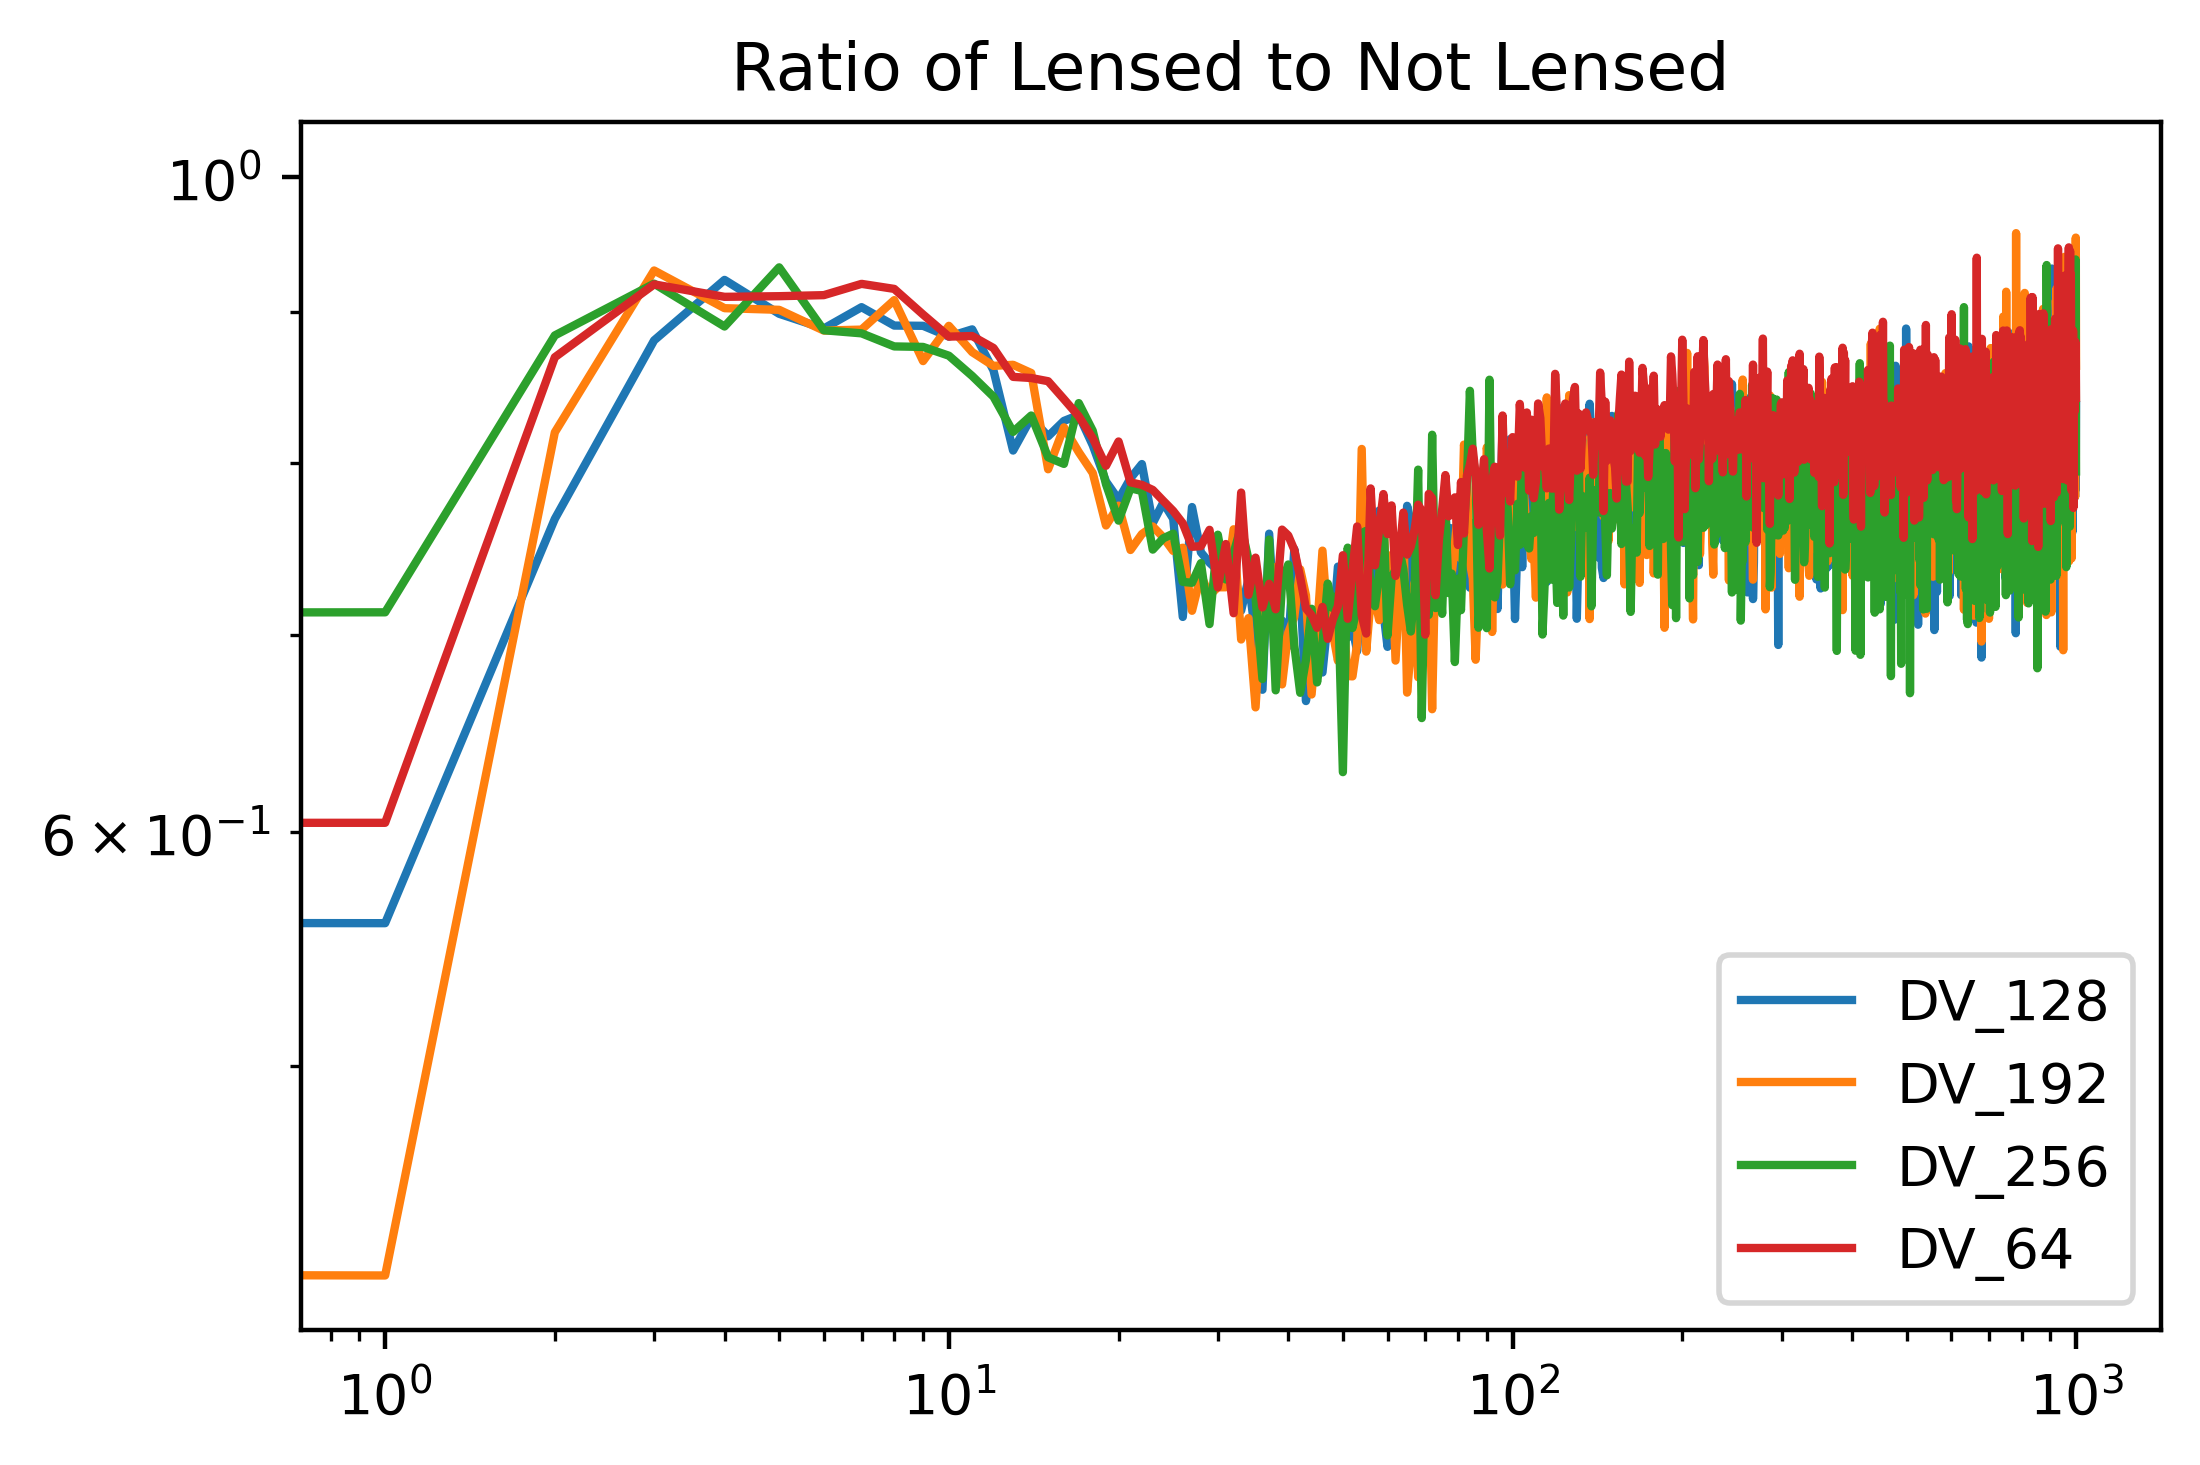

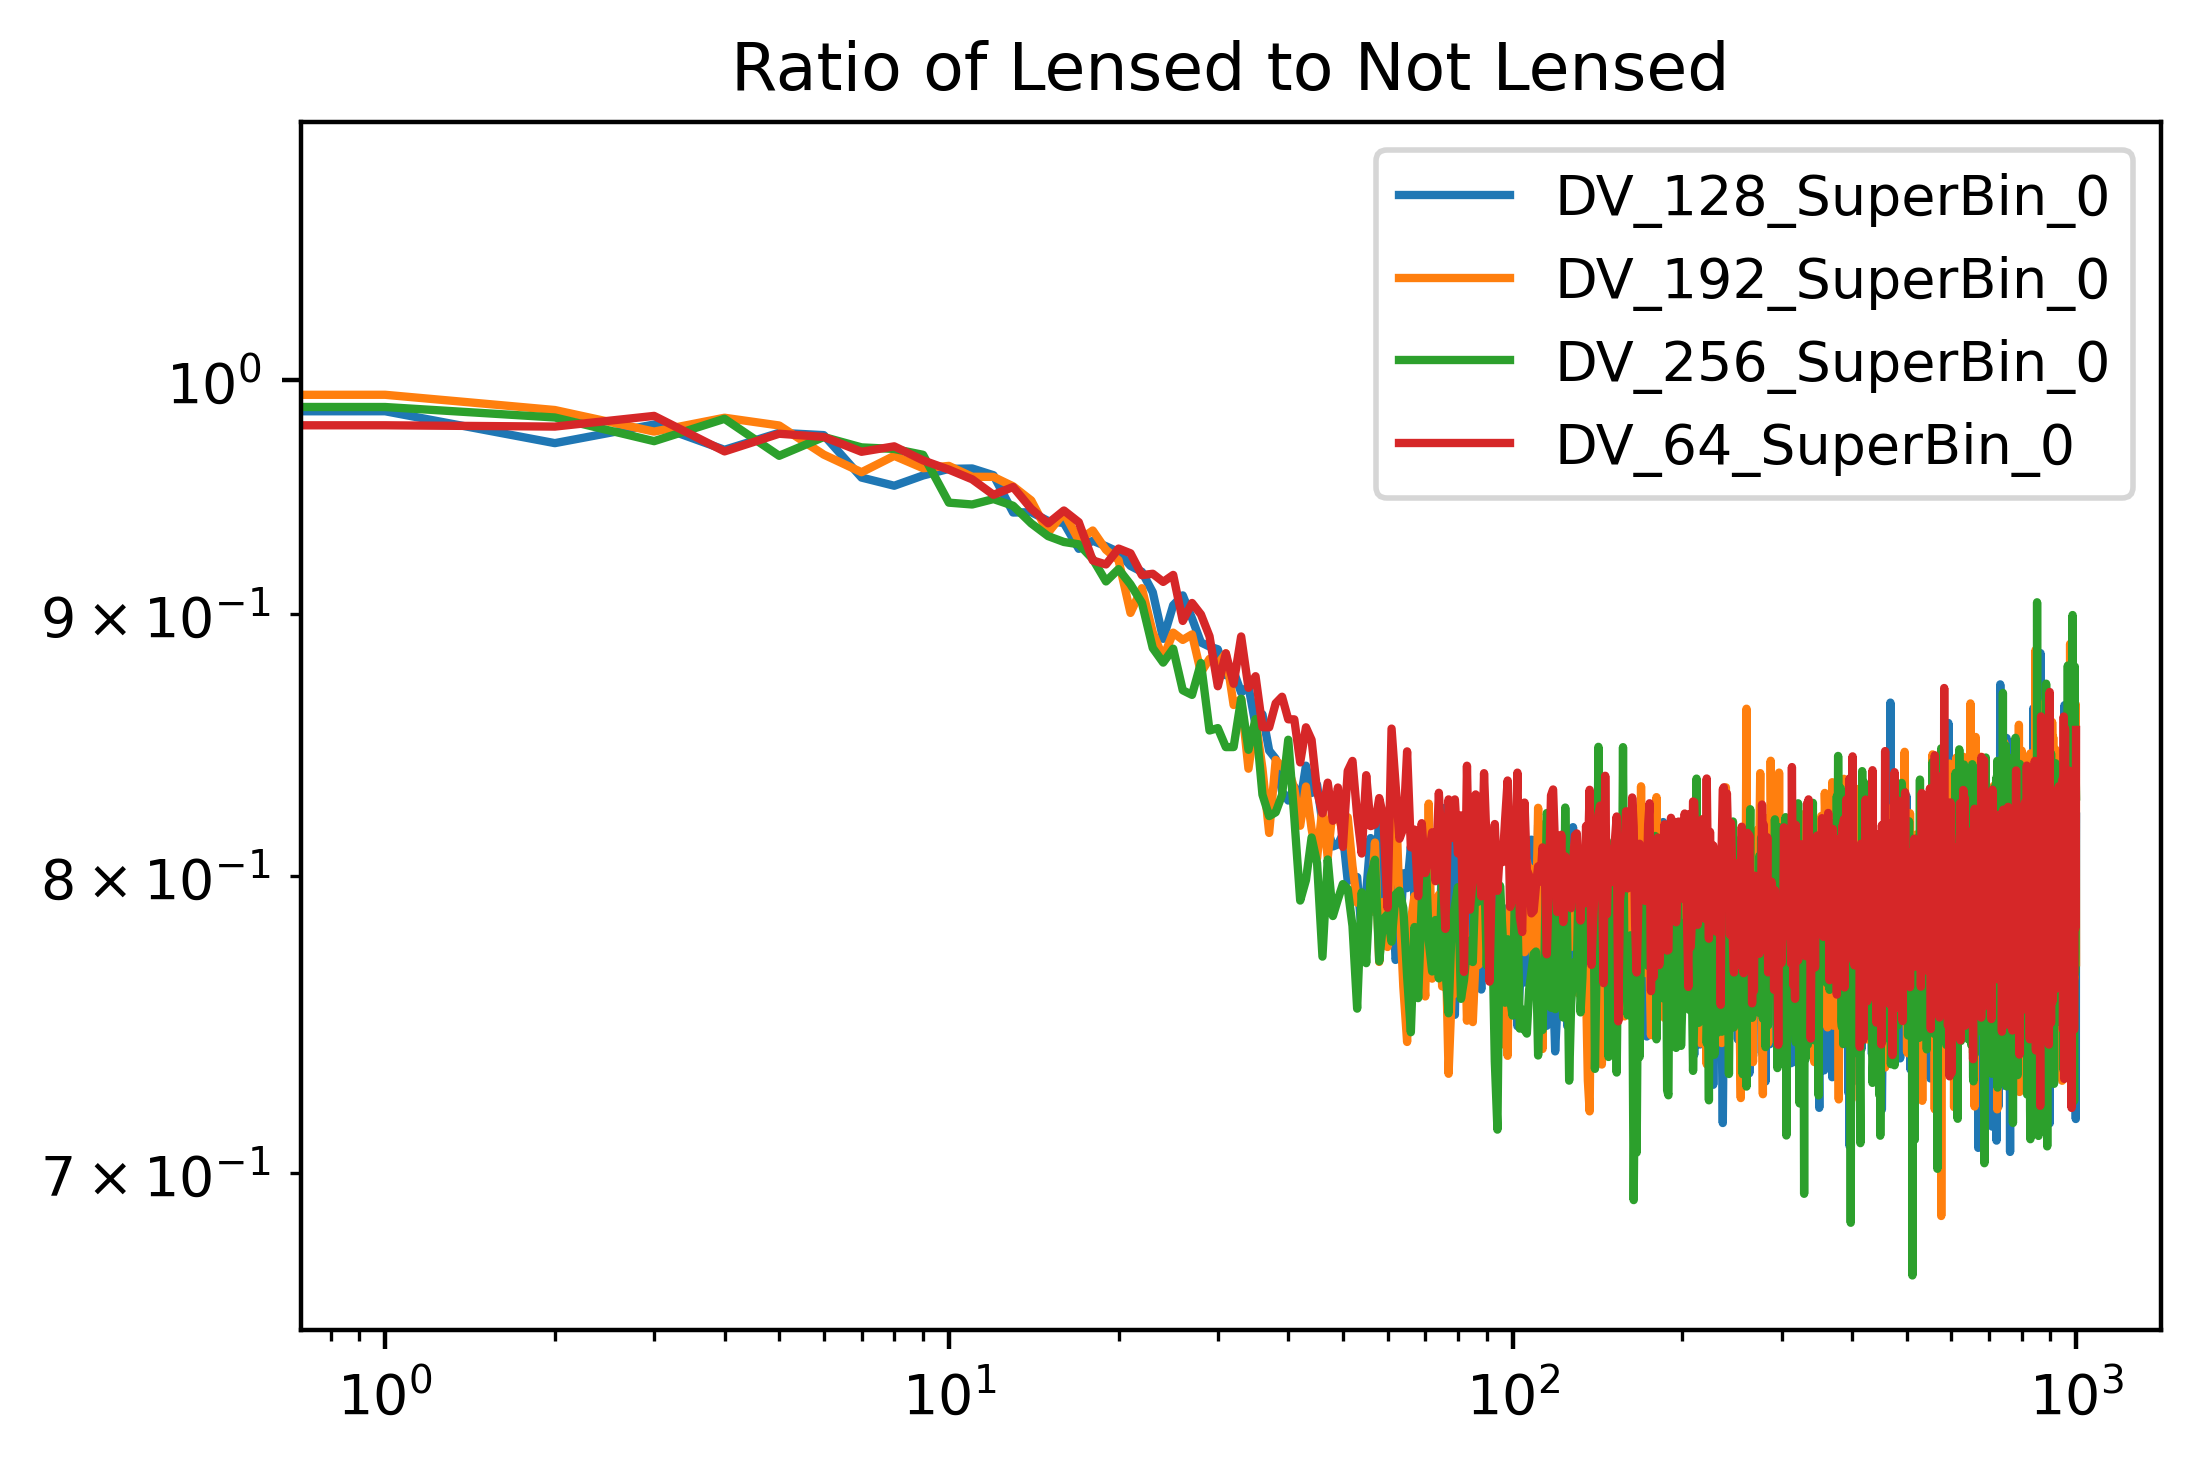

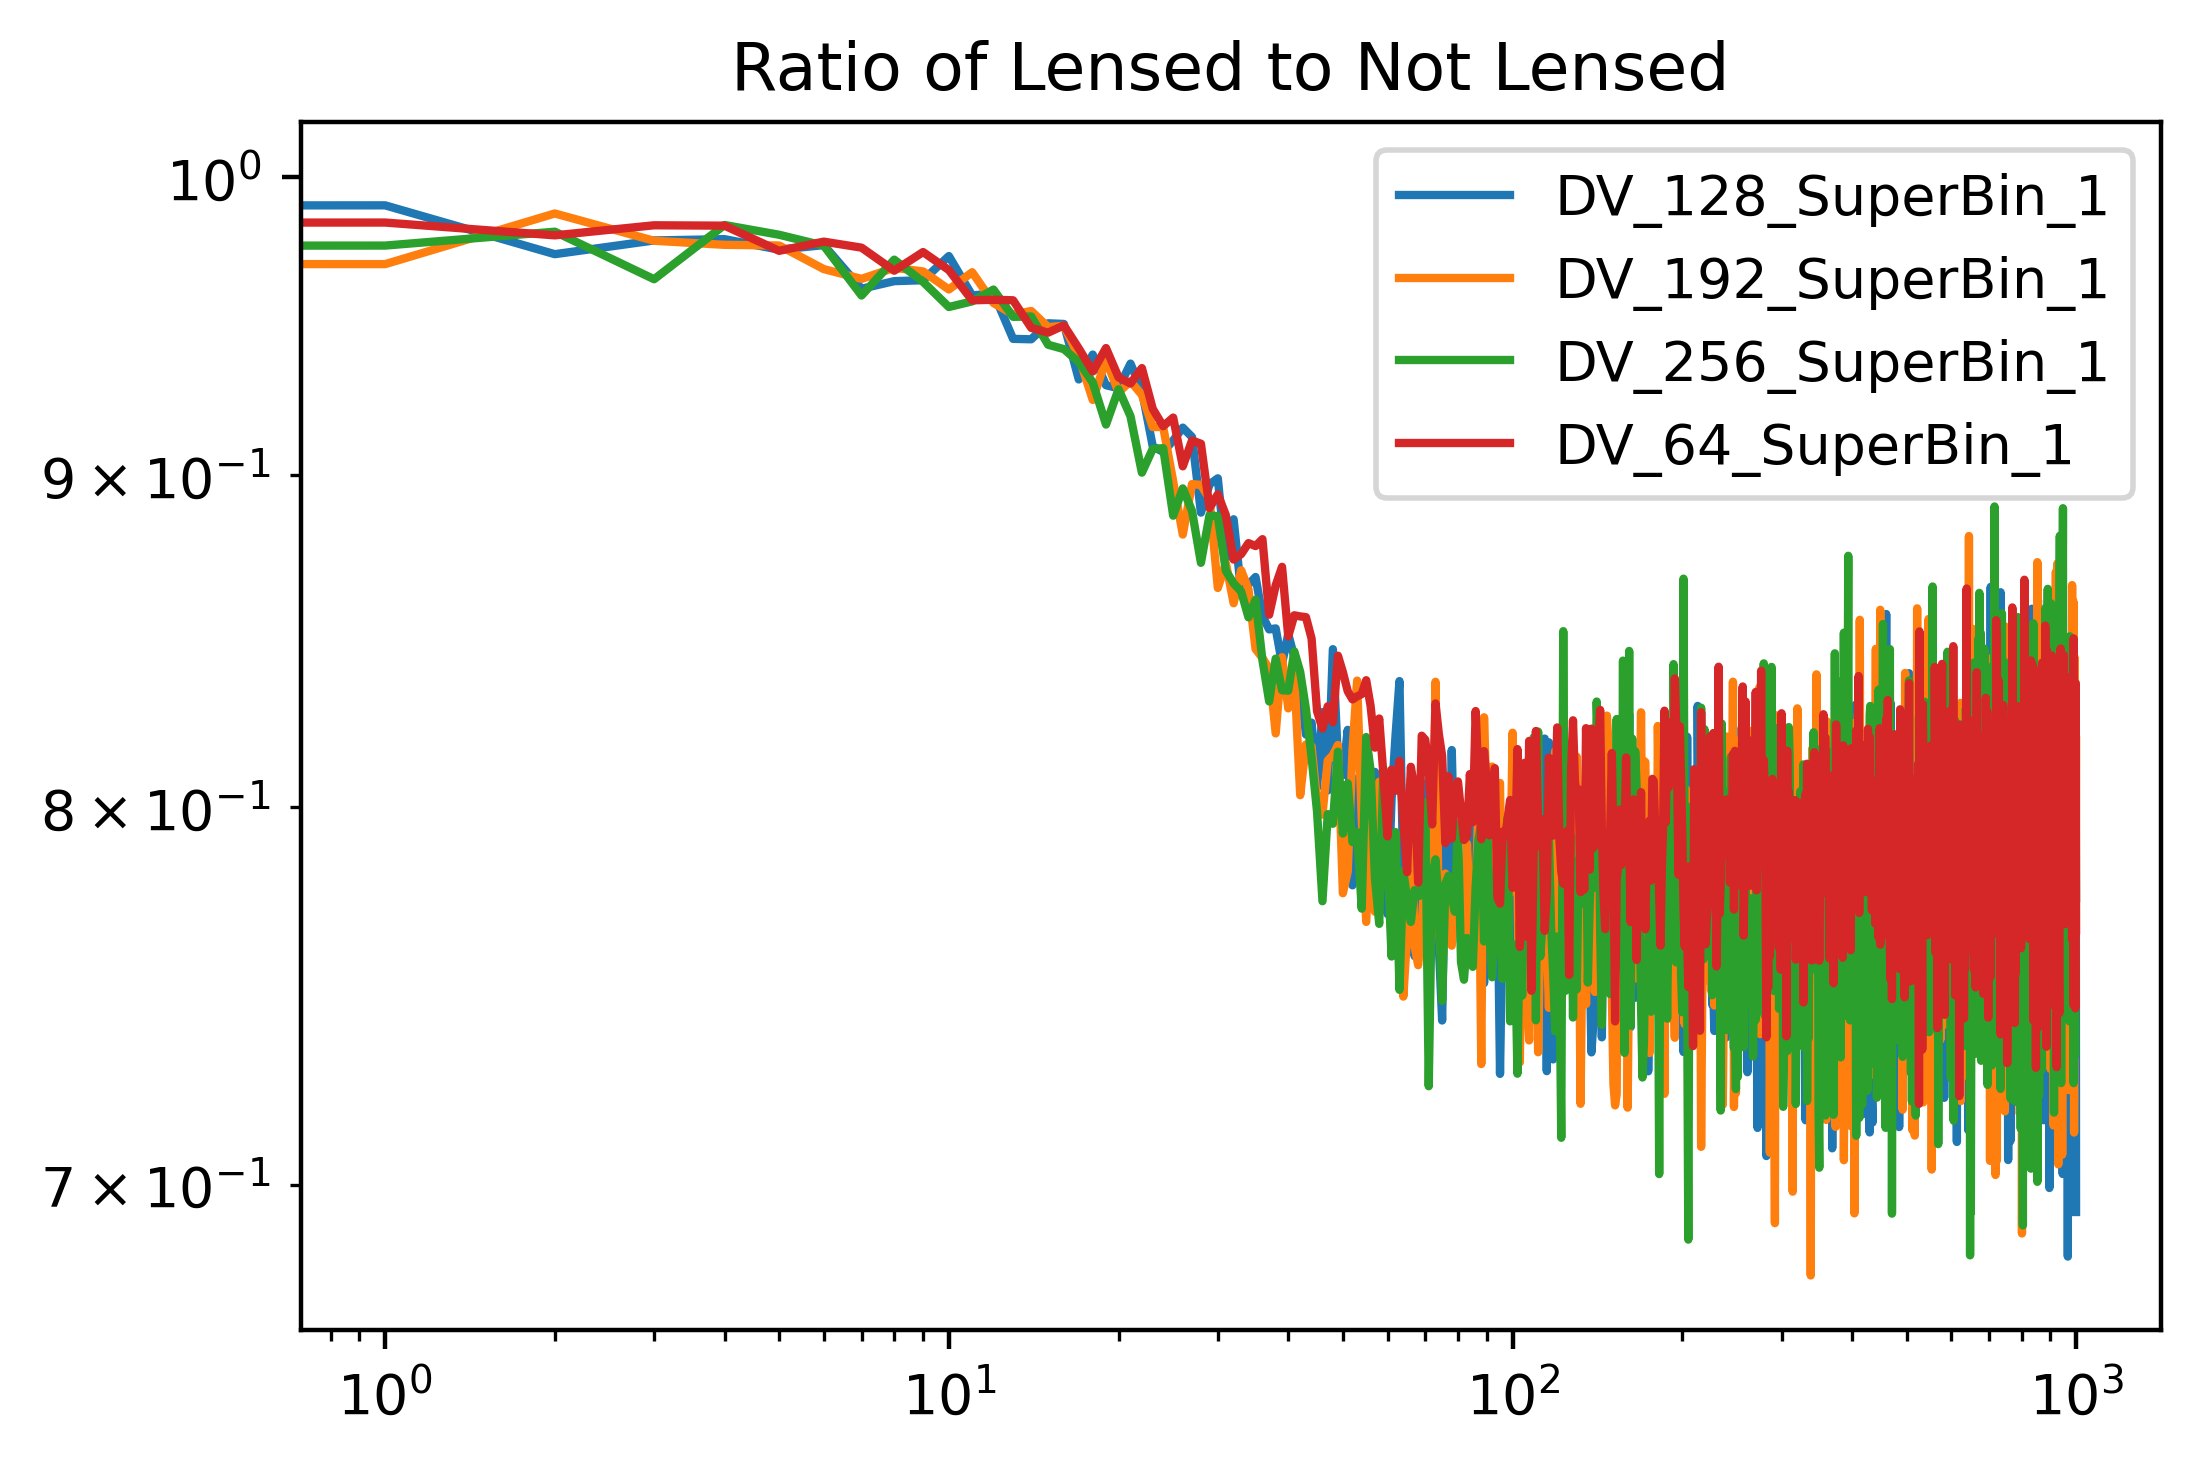

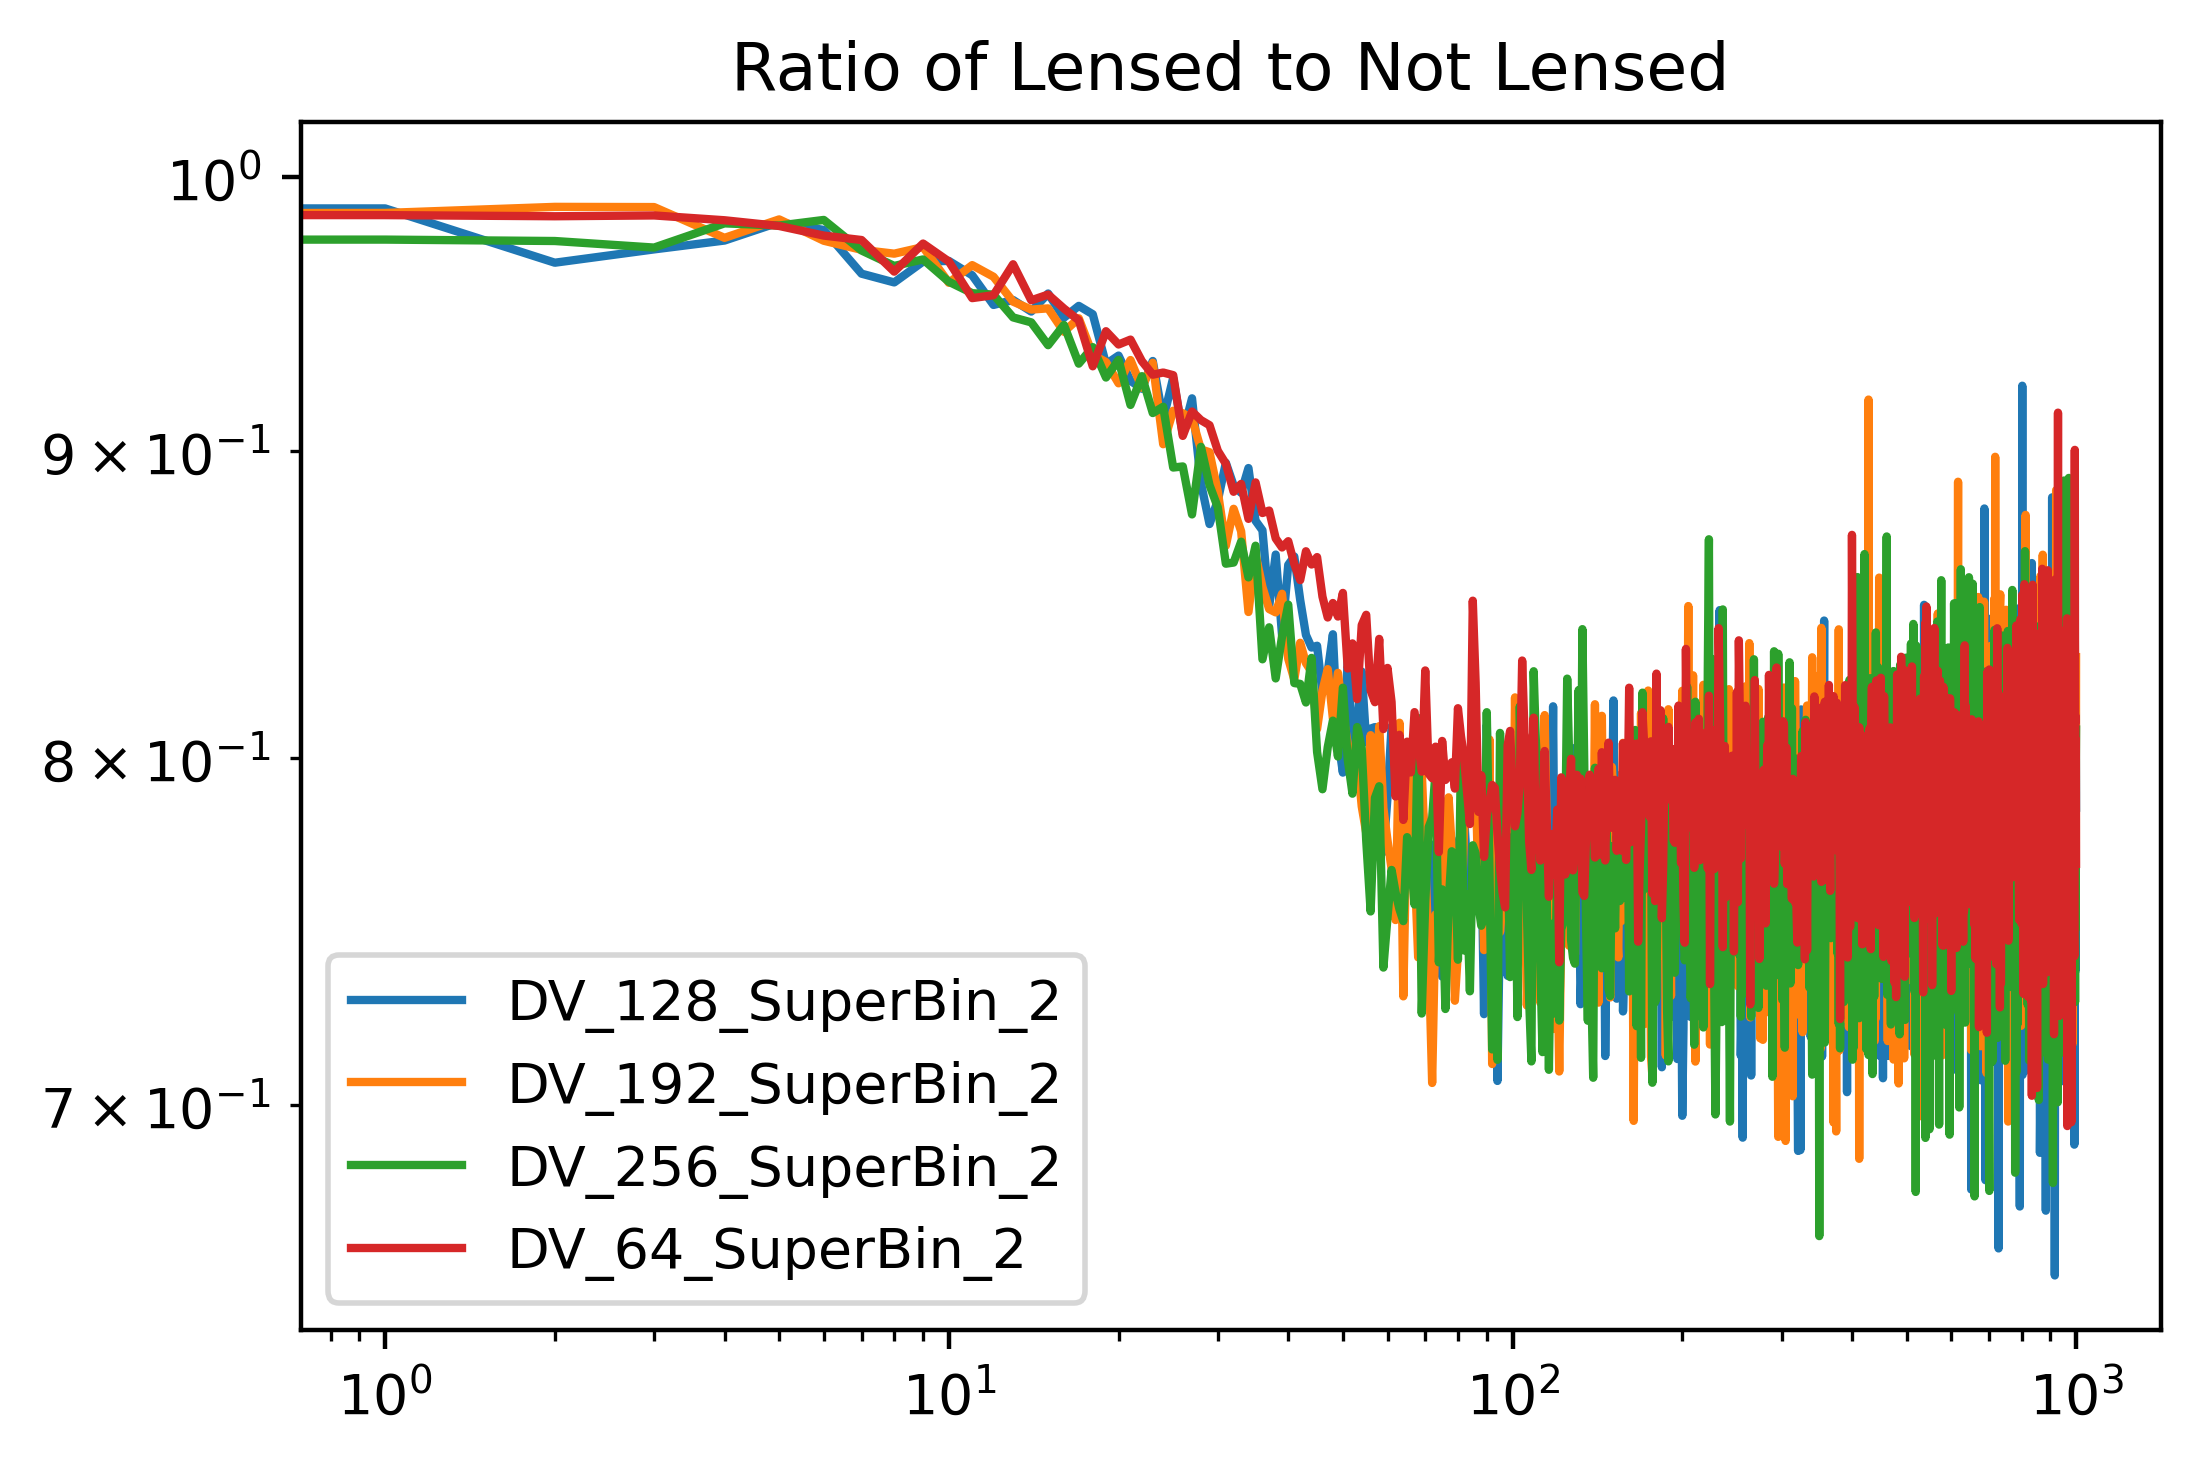

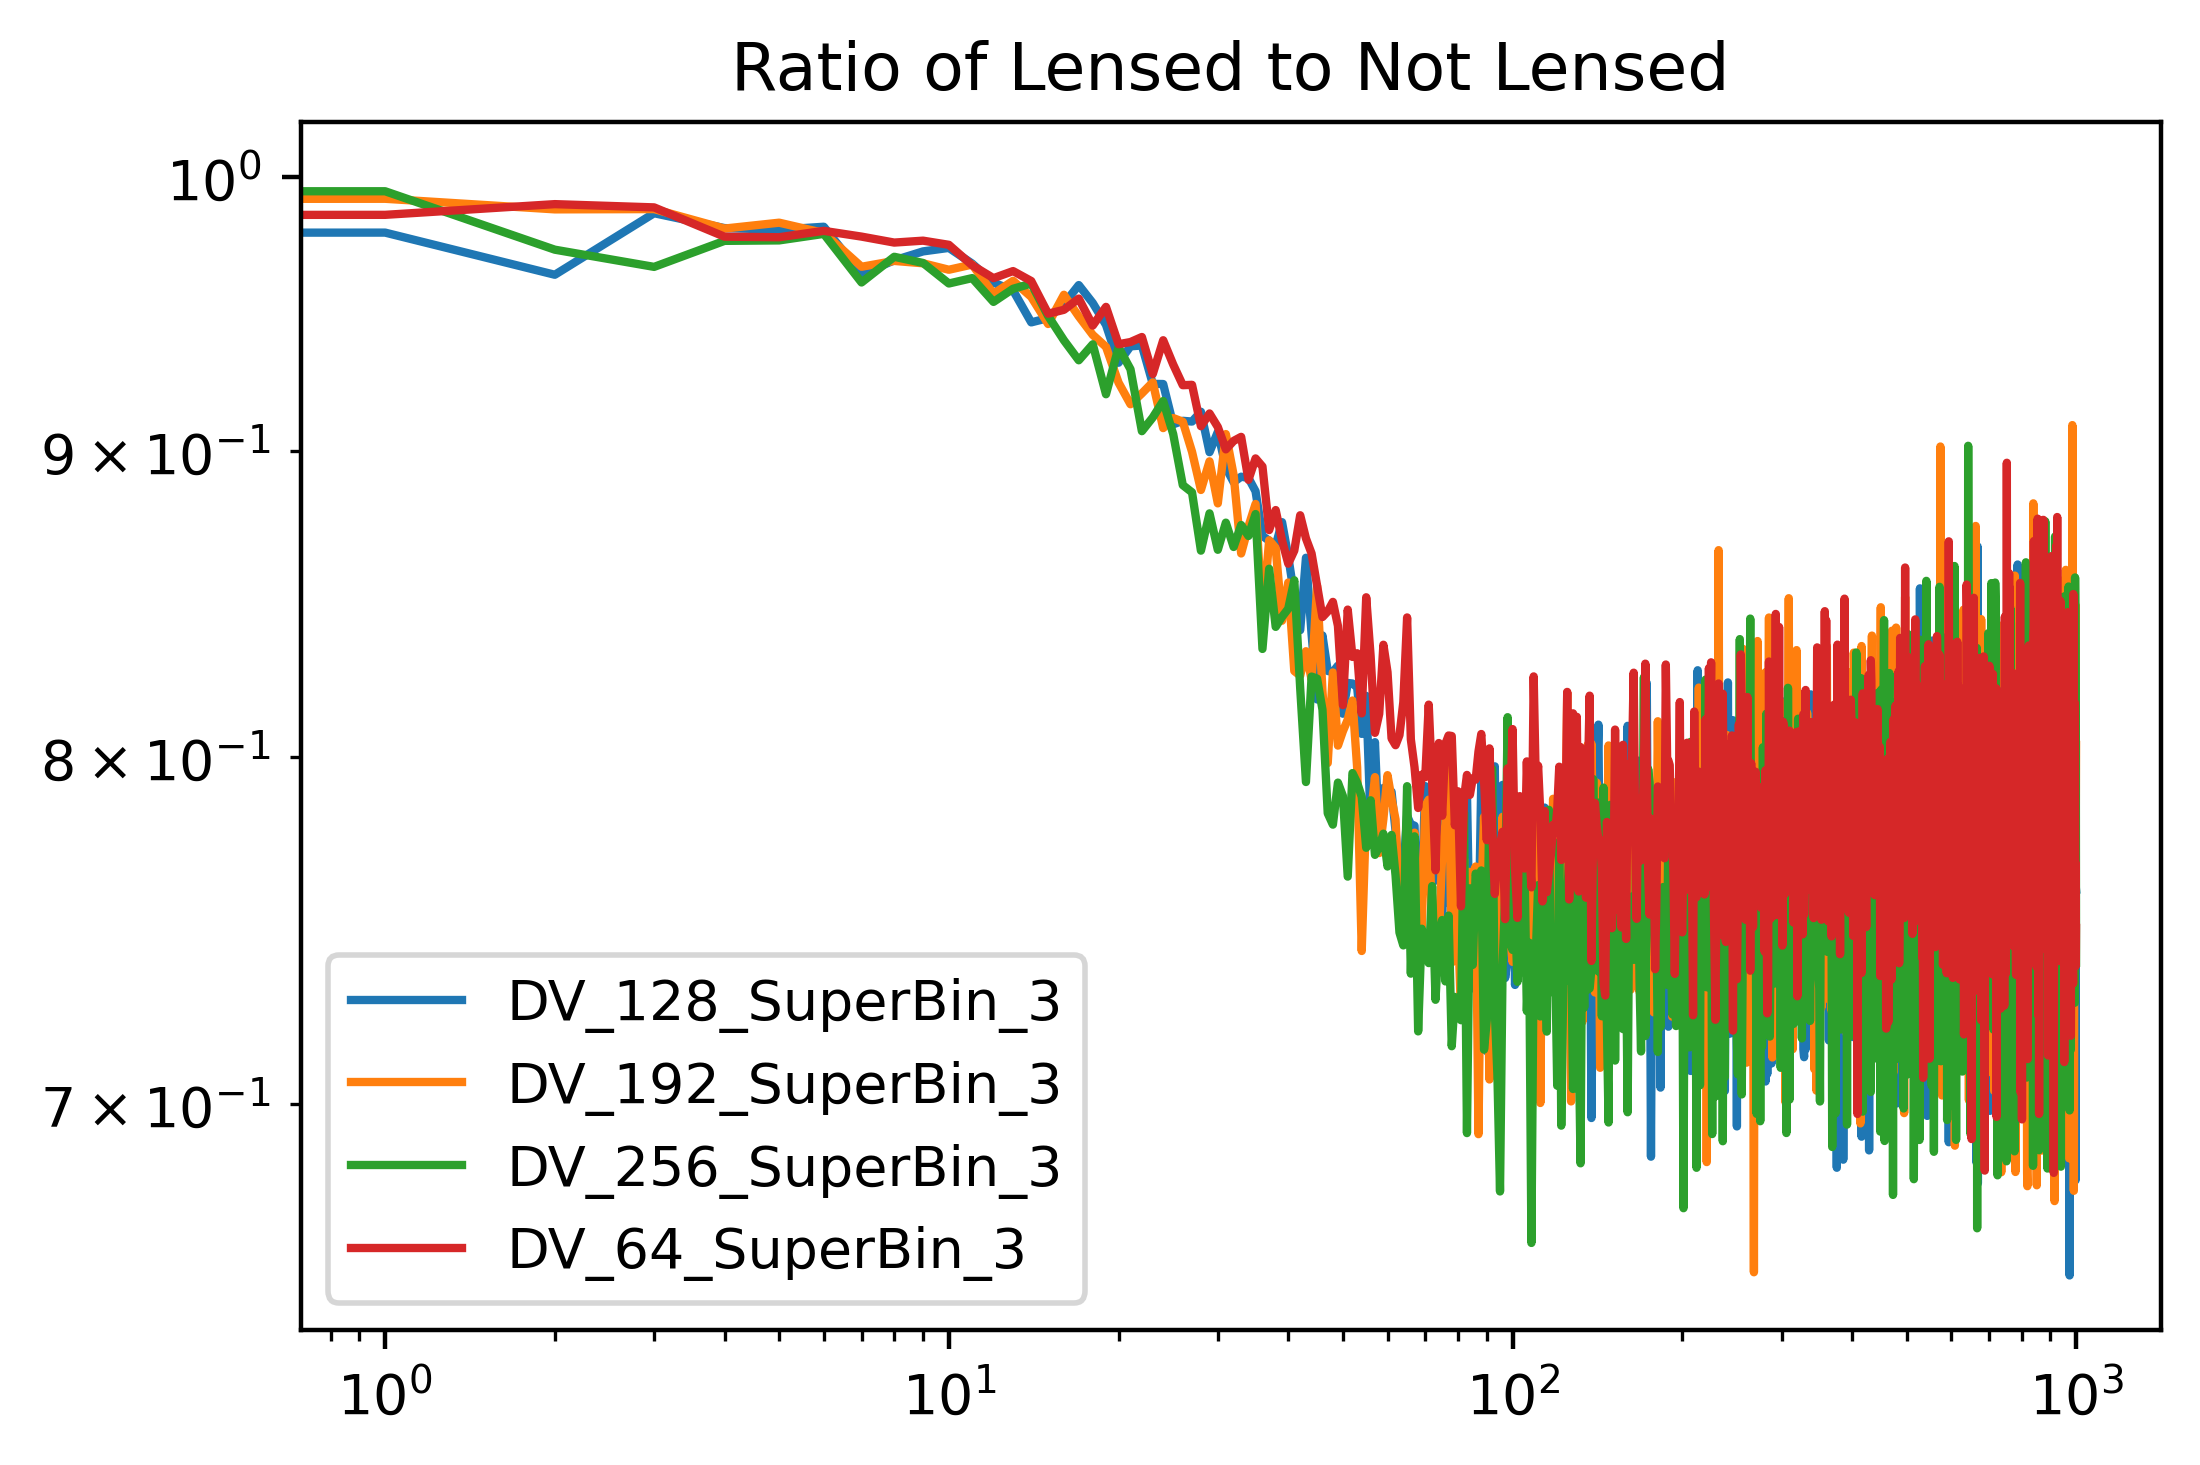

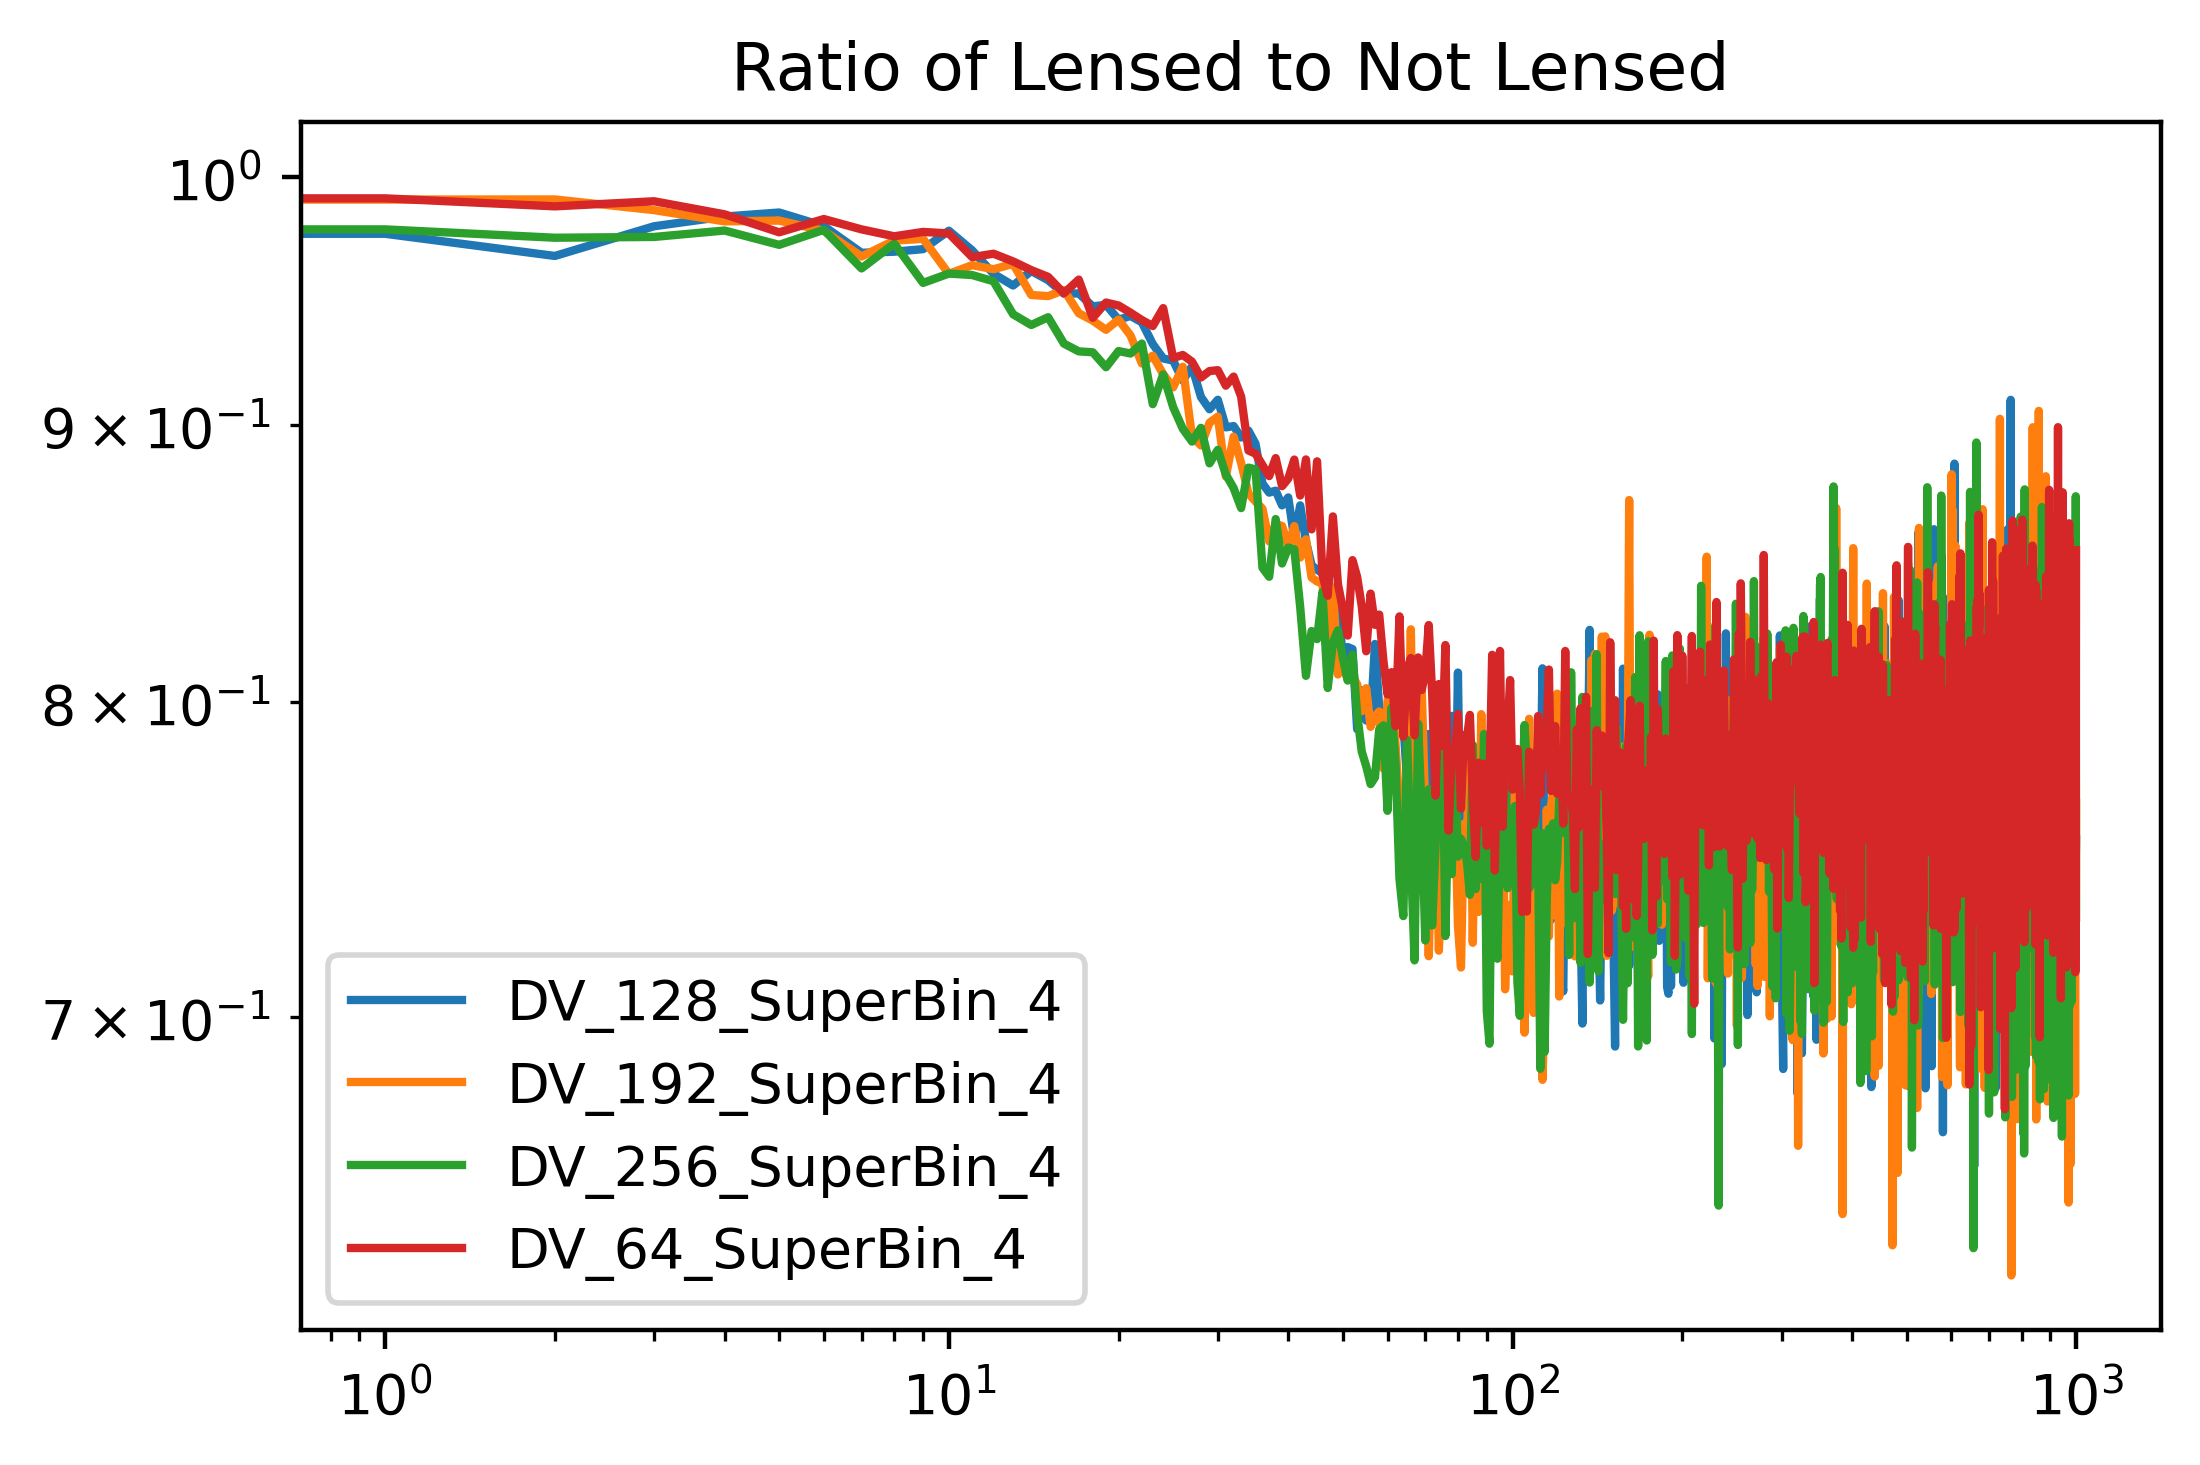

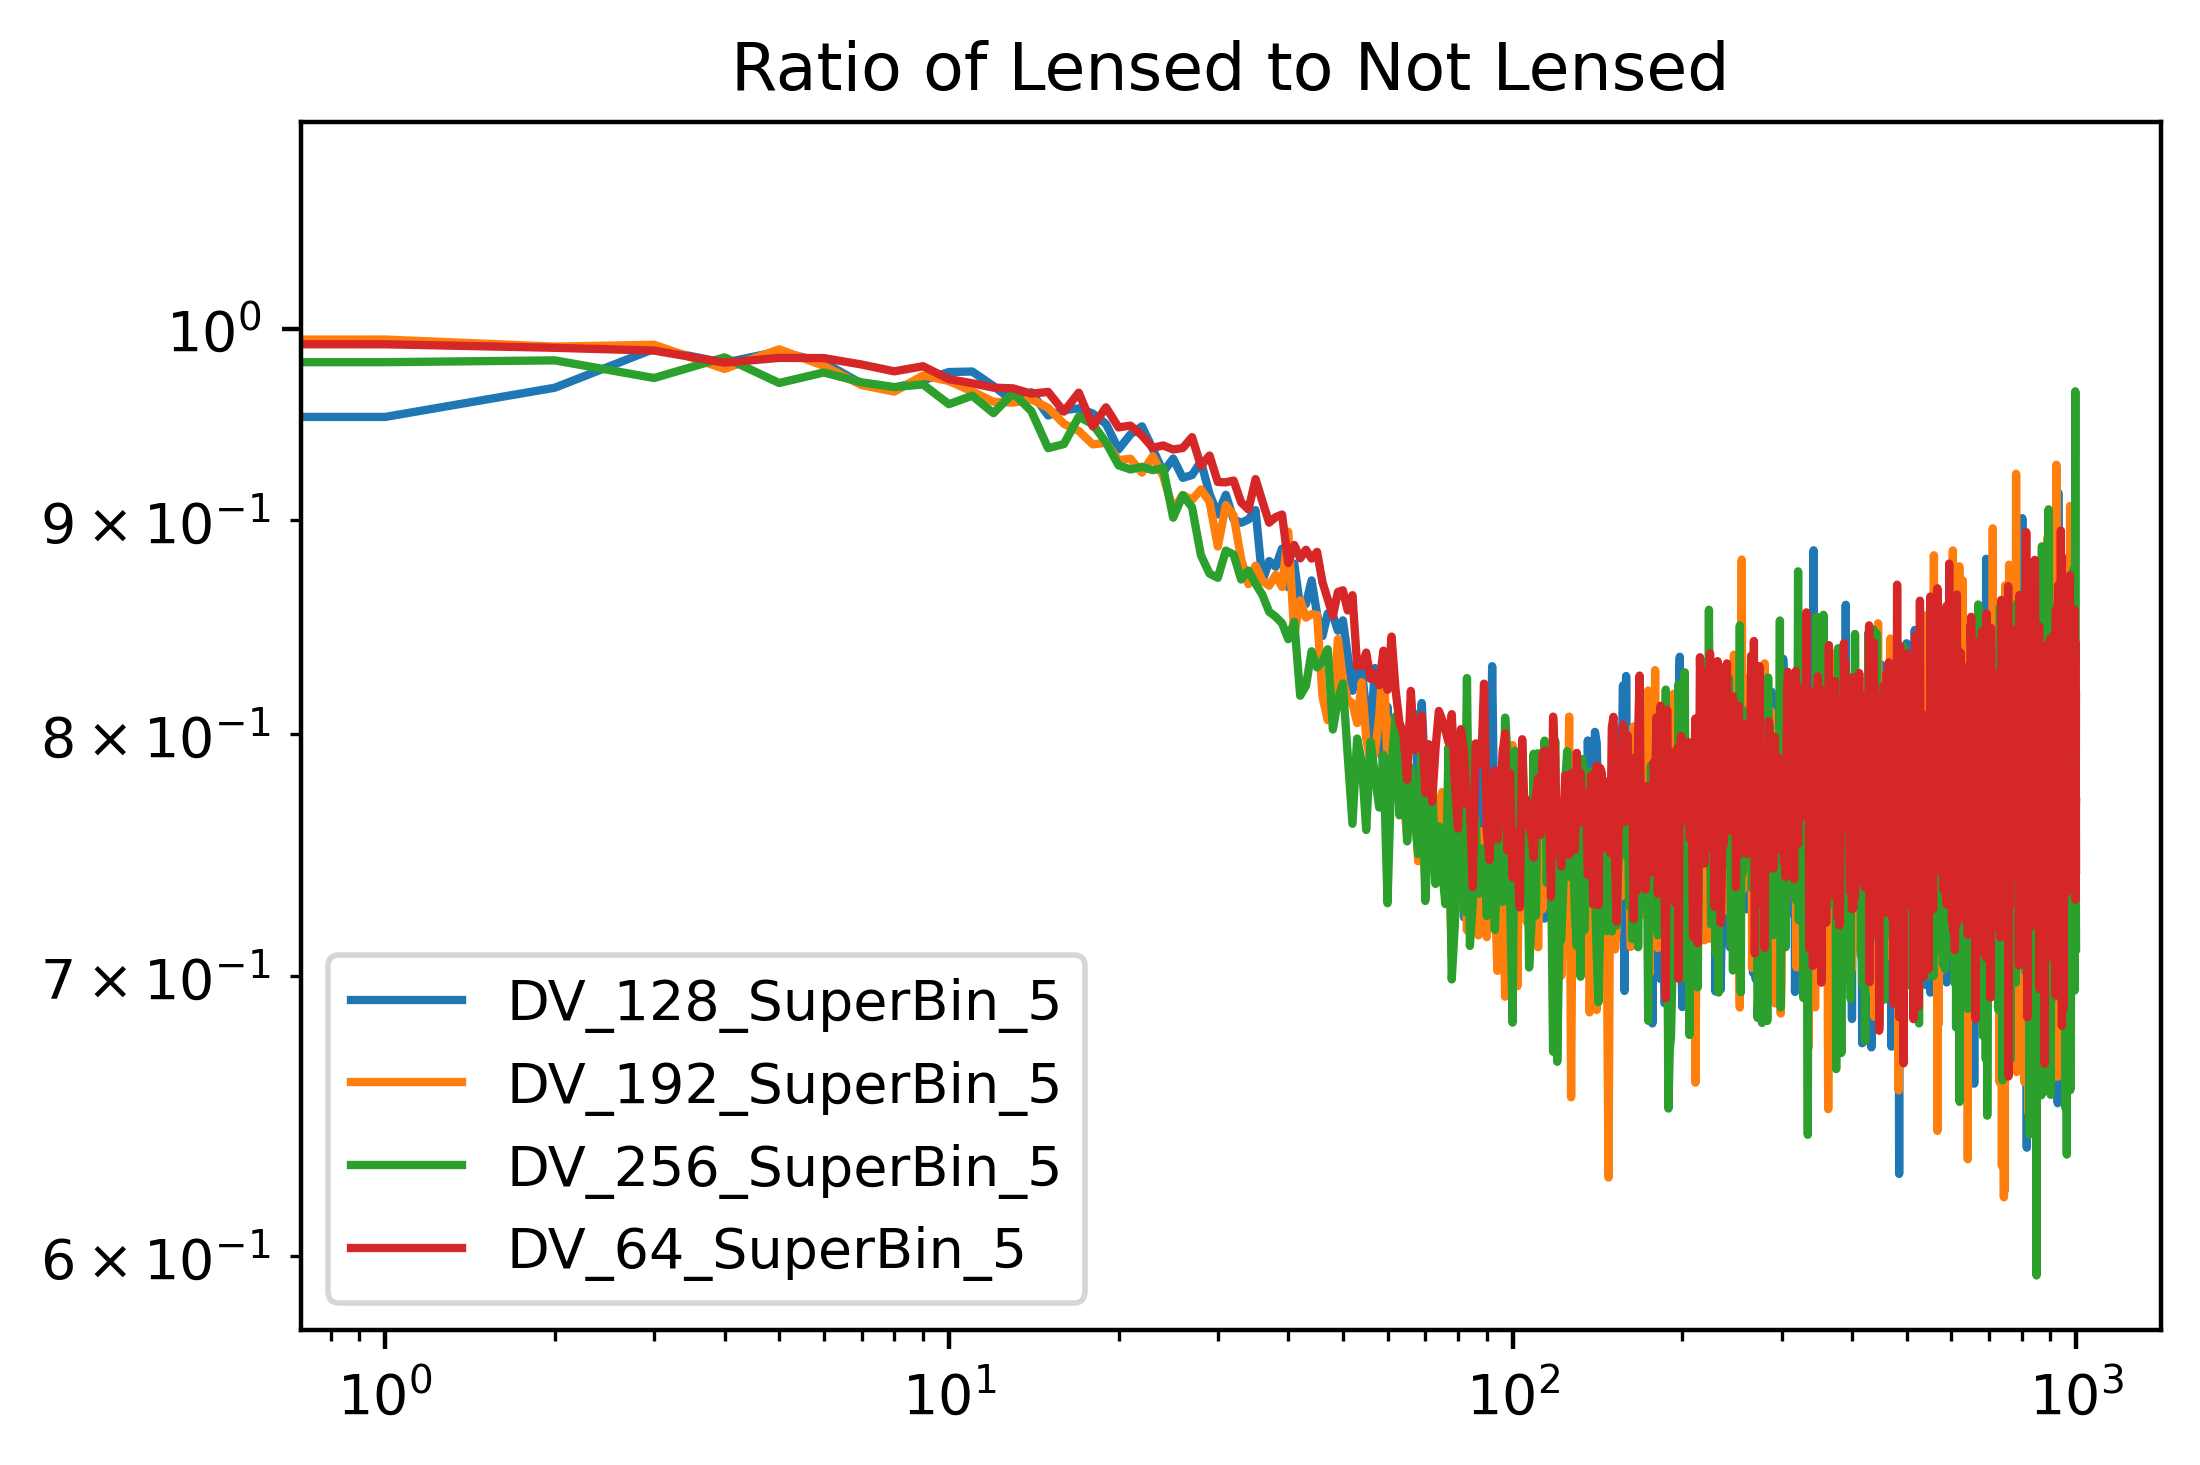

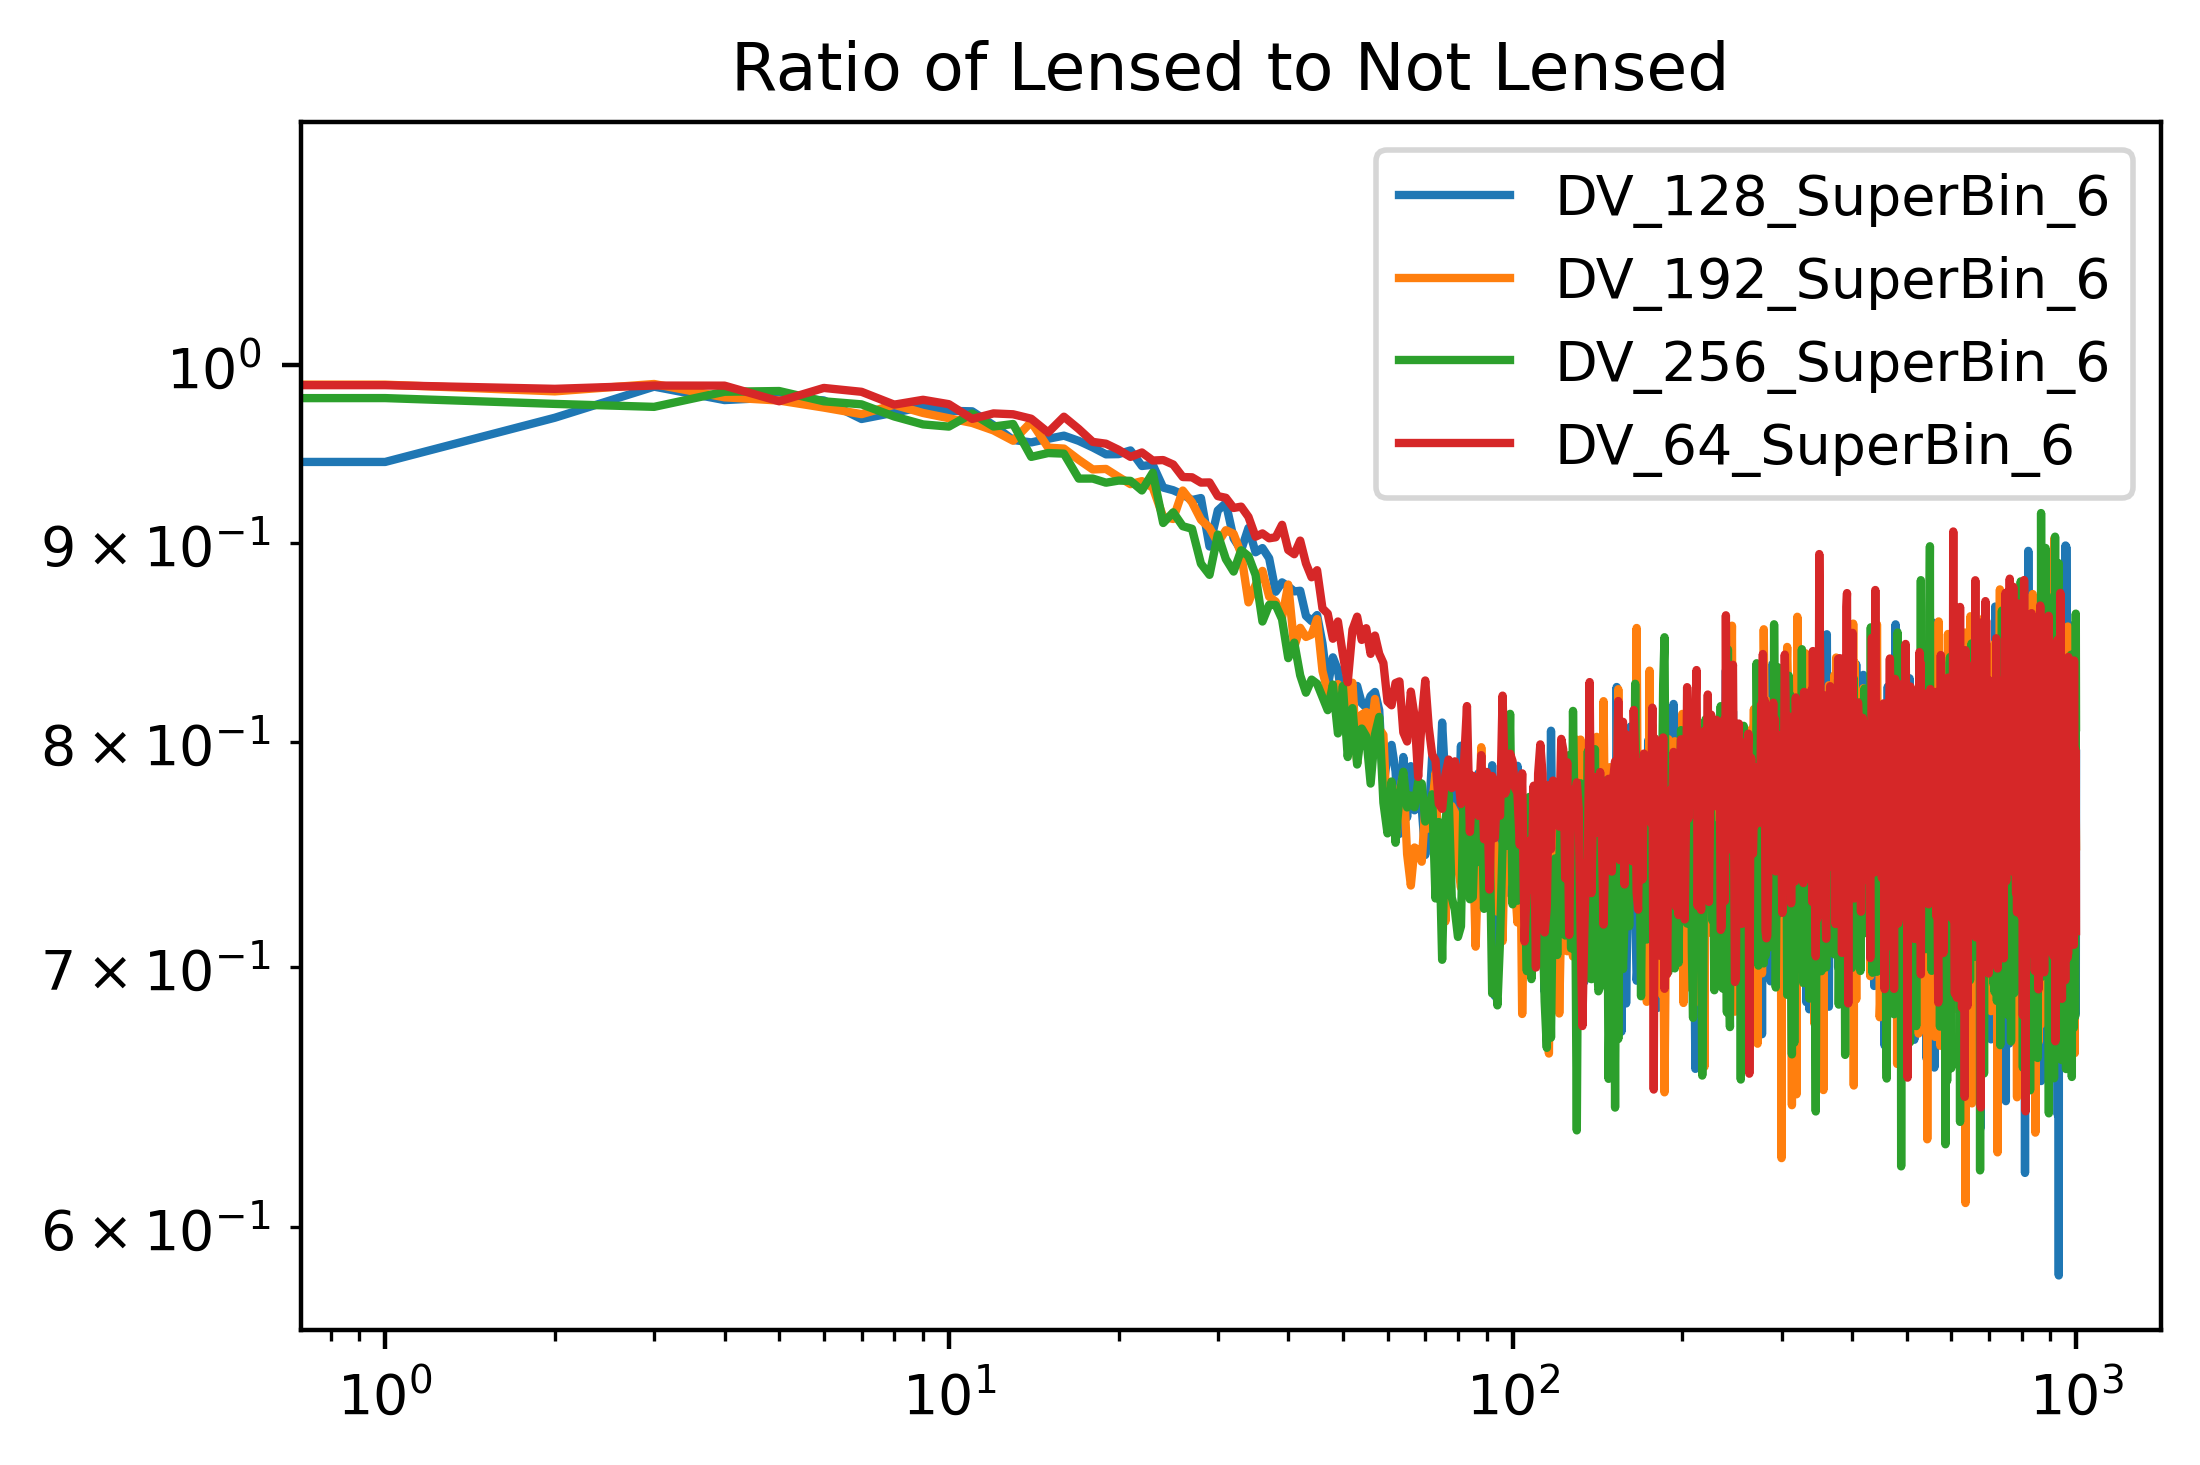

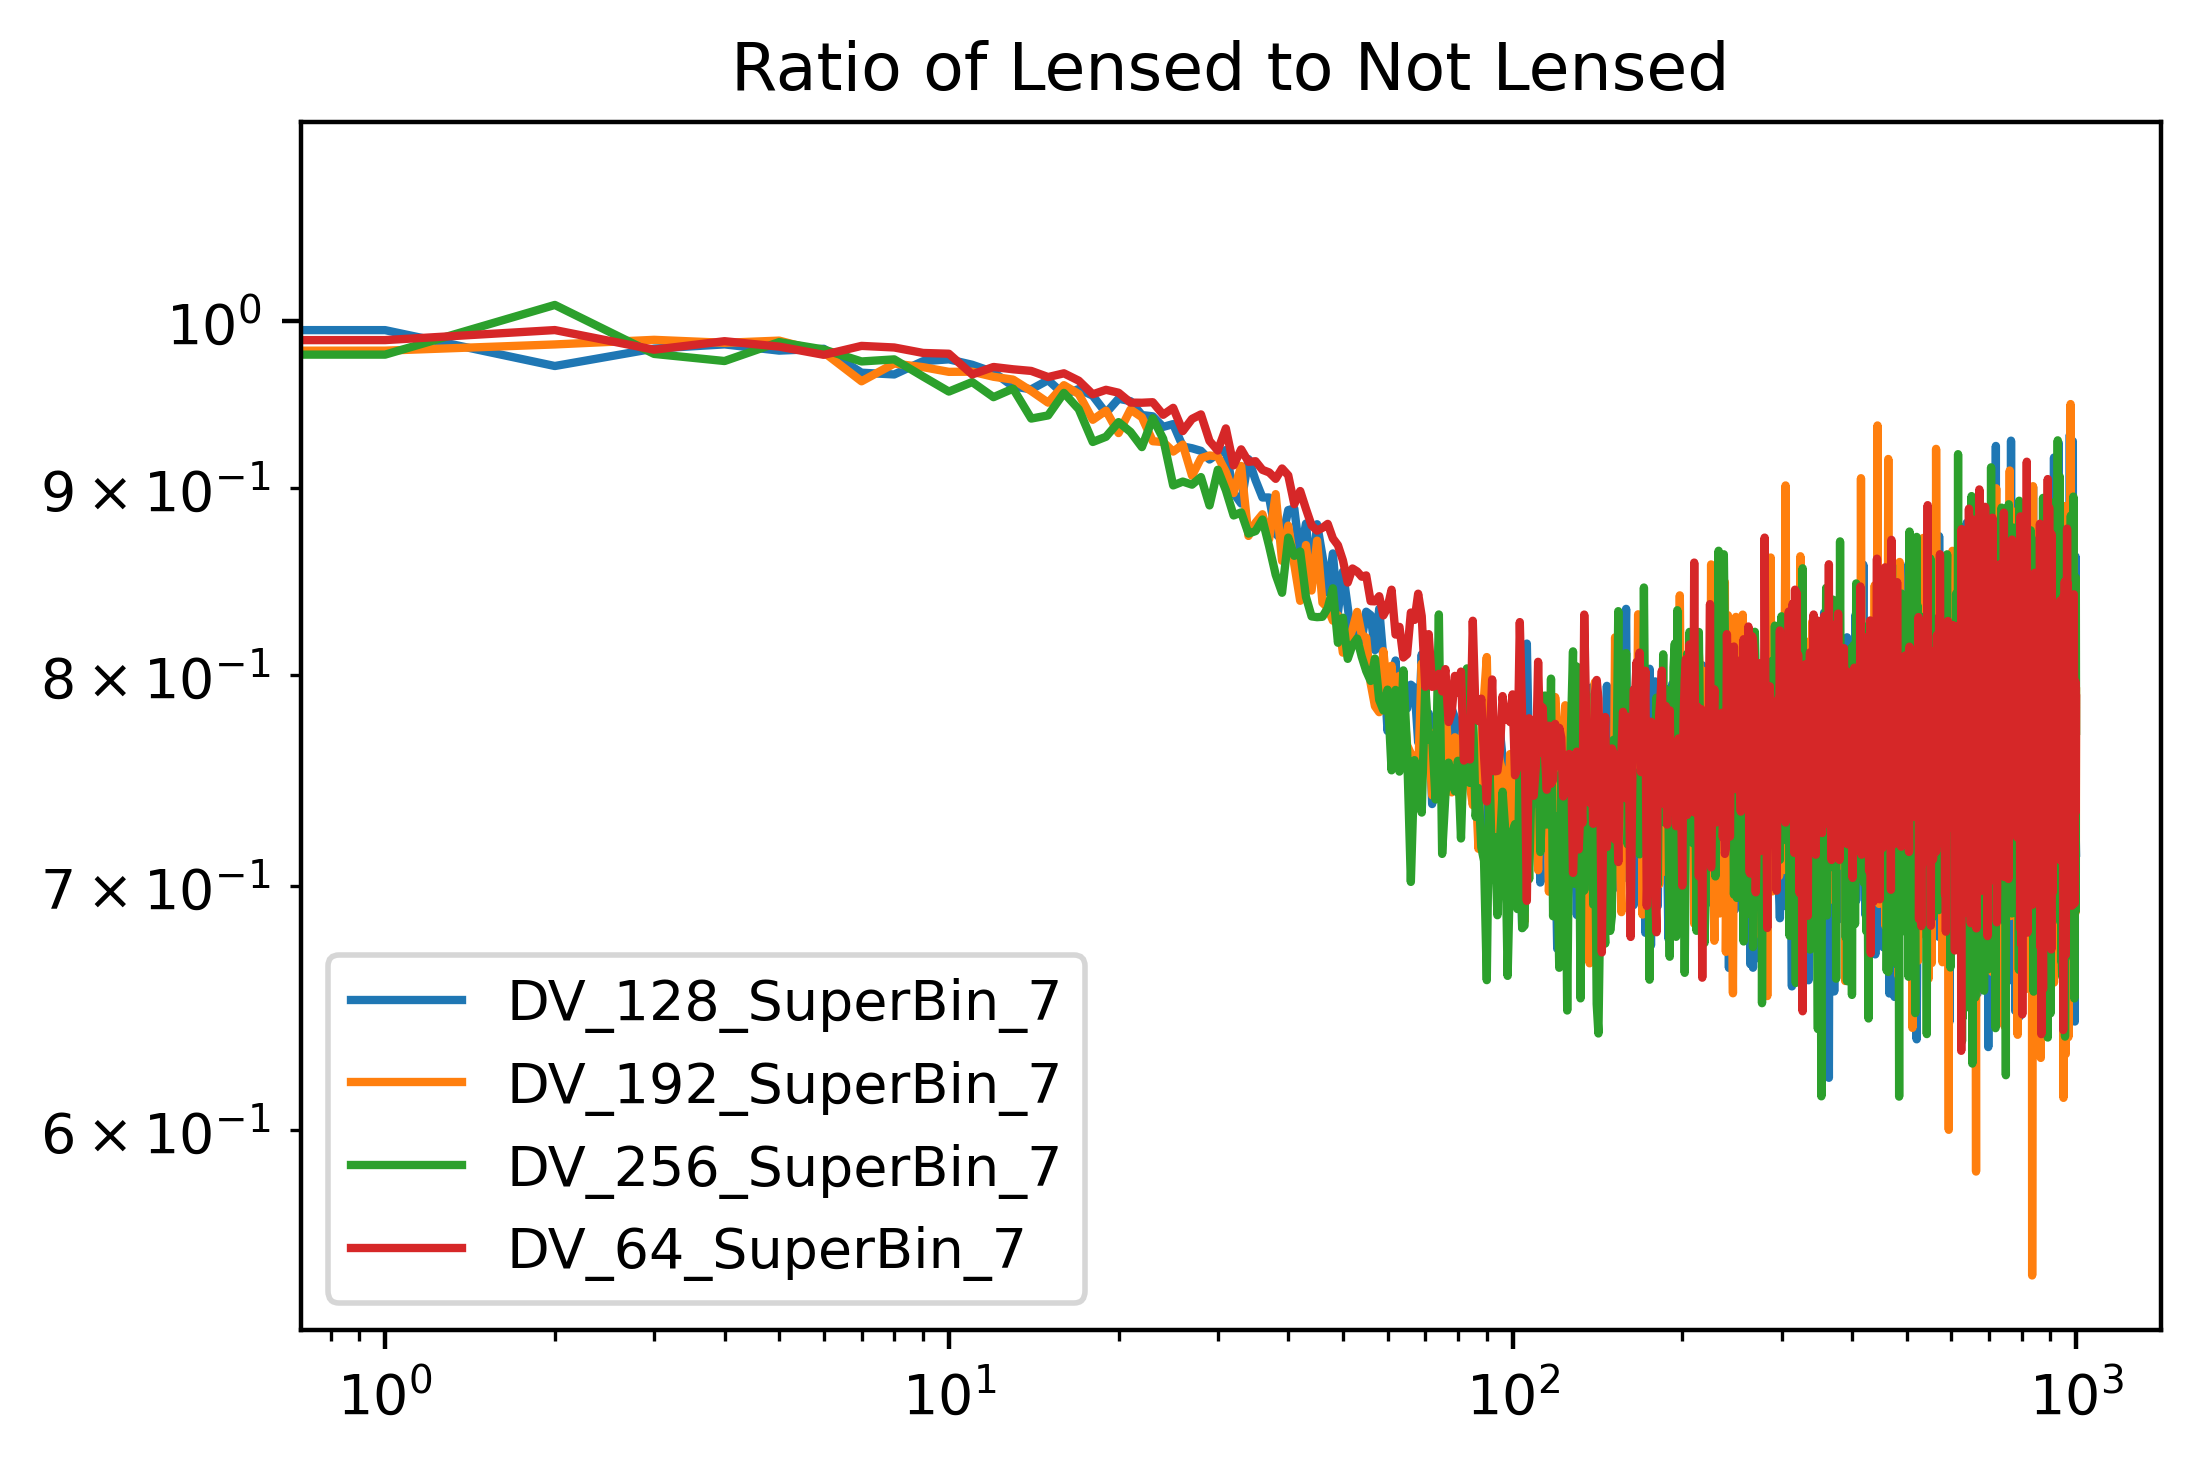

In [39]:
for i in range(9):
    plt.figure(dpi=400)
    plt.loglog(np.transpose(ratioLensToNotLensed[i:36:9,:1000]));
    plt.legend(titles[i:36:9]);
    plt.title('Ratio of Lensed to Not Lensed')

## Smooth Plots

In [50]:
smoothRatio = signal.savgol_filter(ratioLensToNotLensed, 49, 3, axis=1)

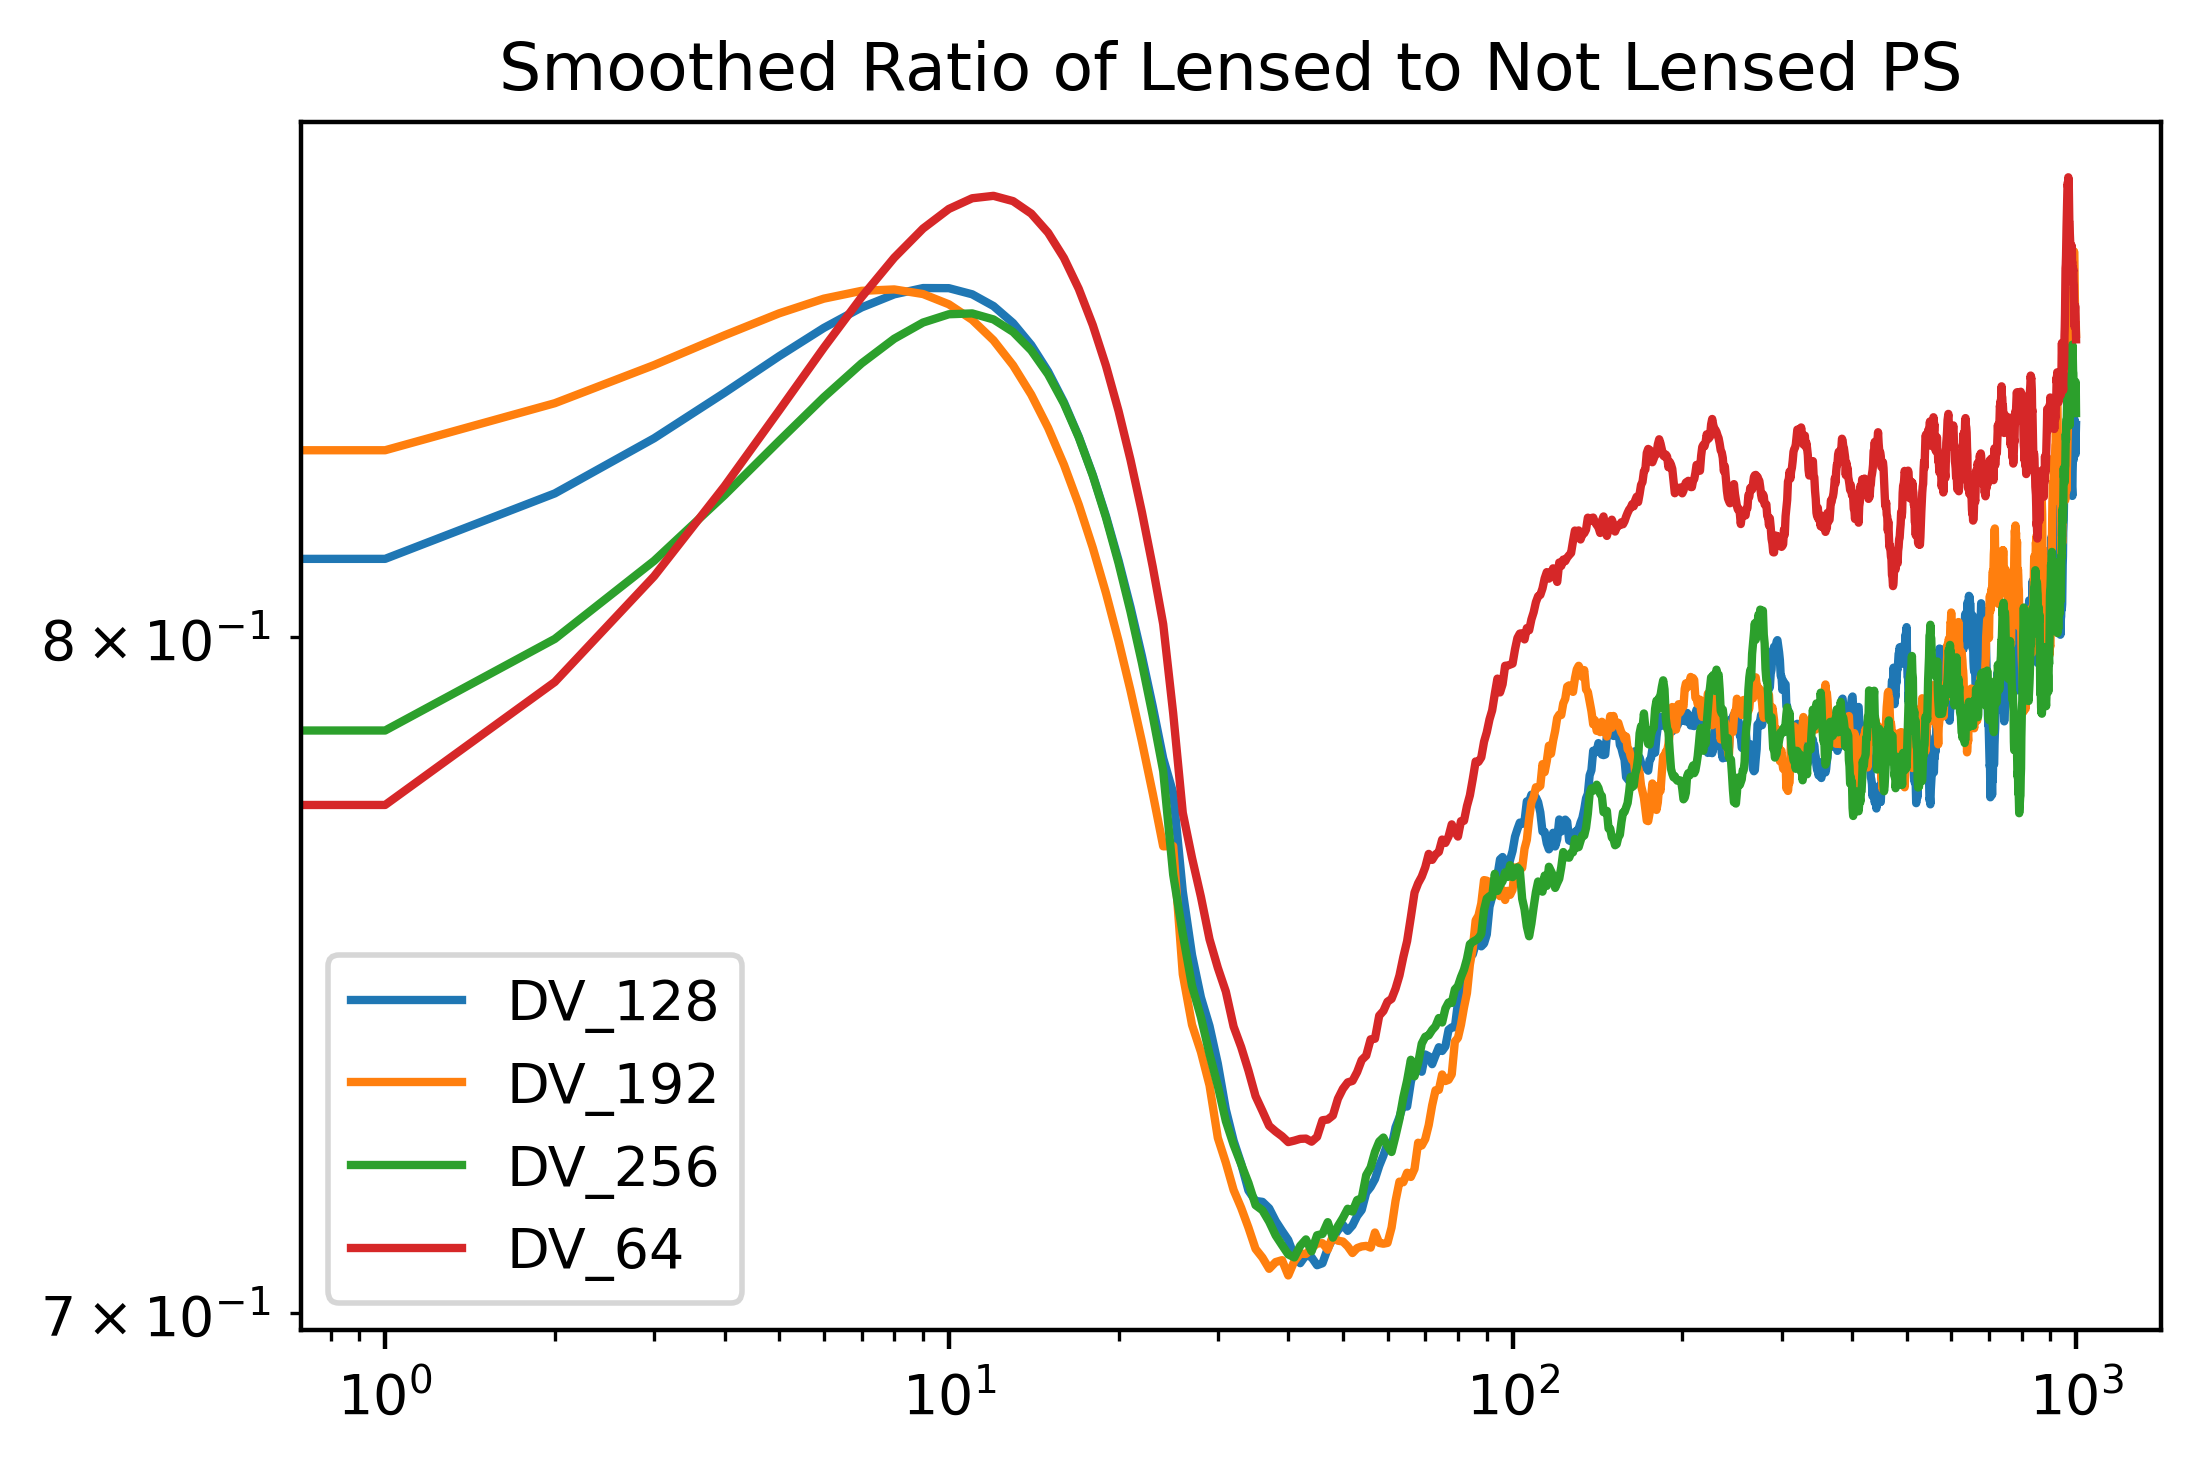

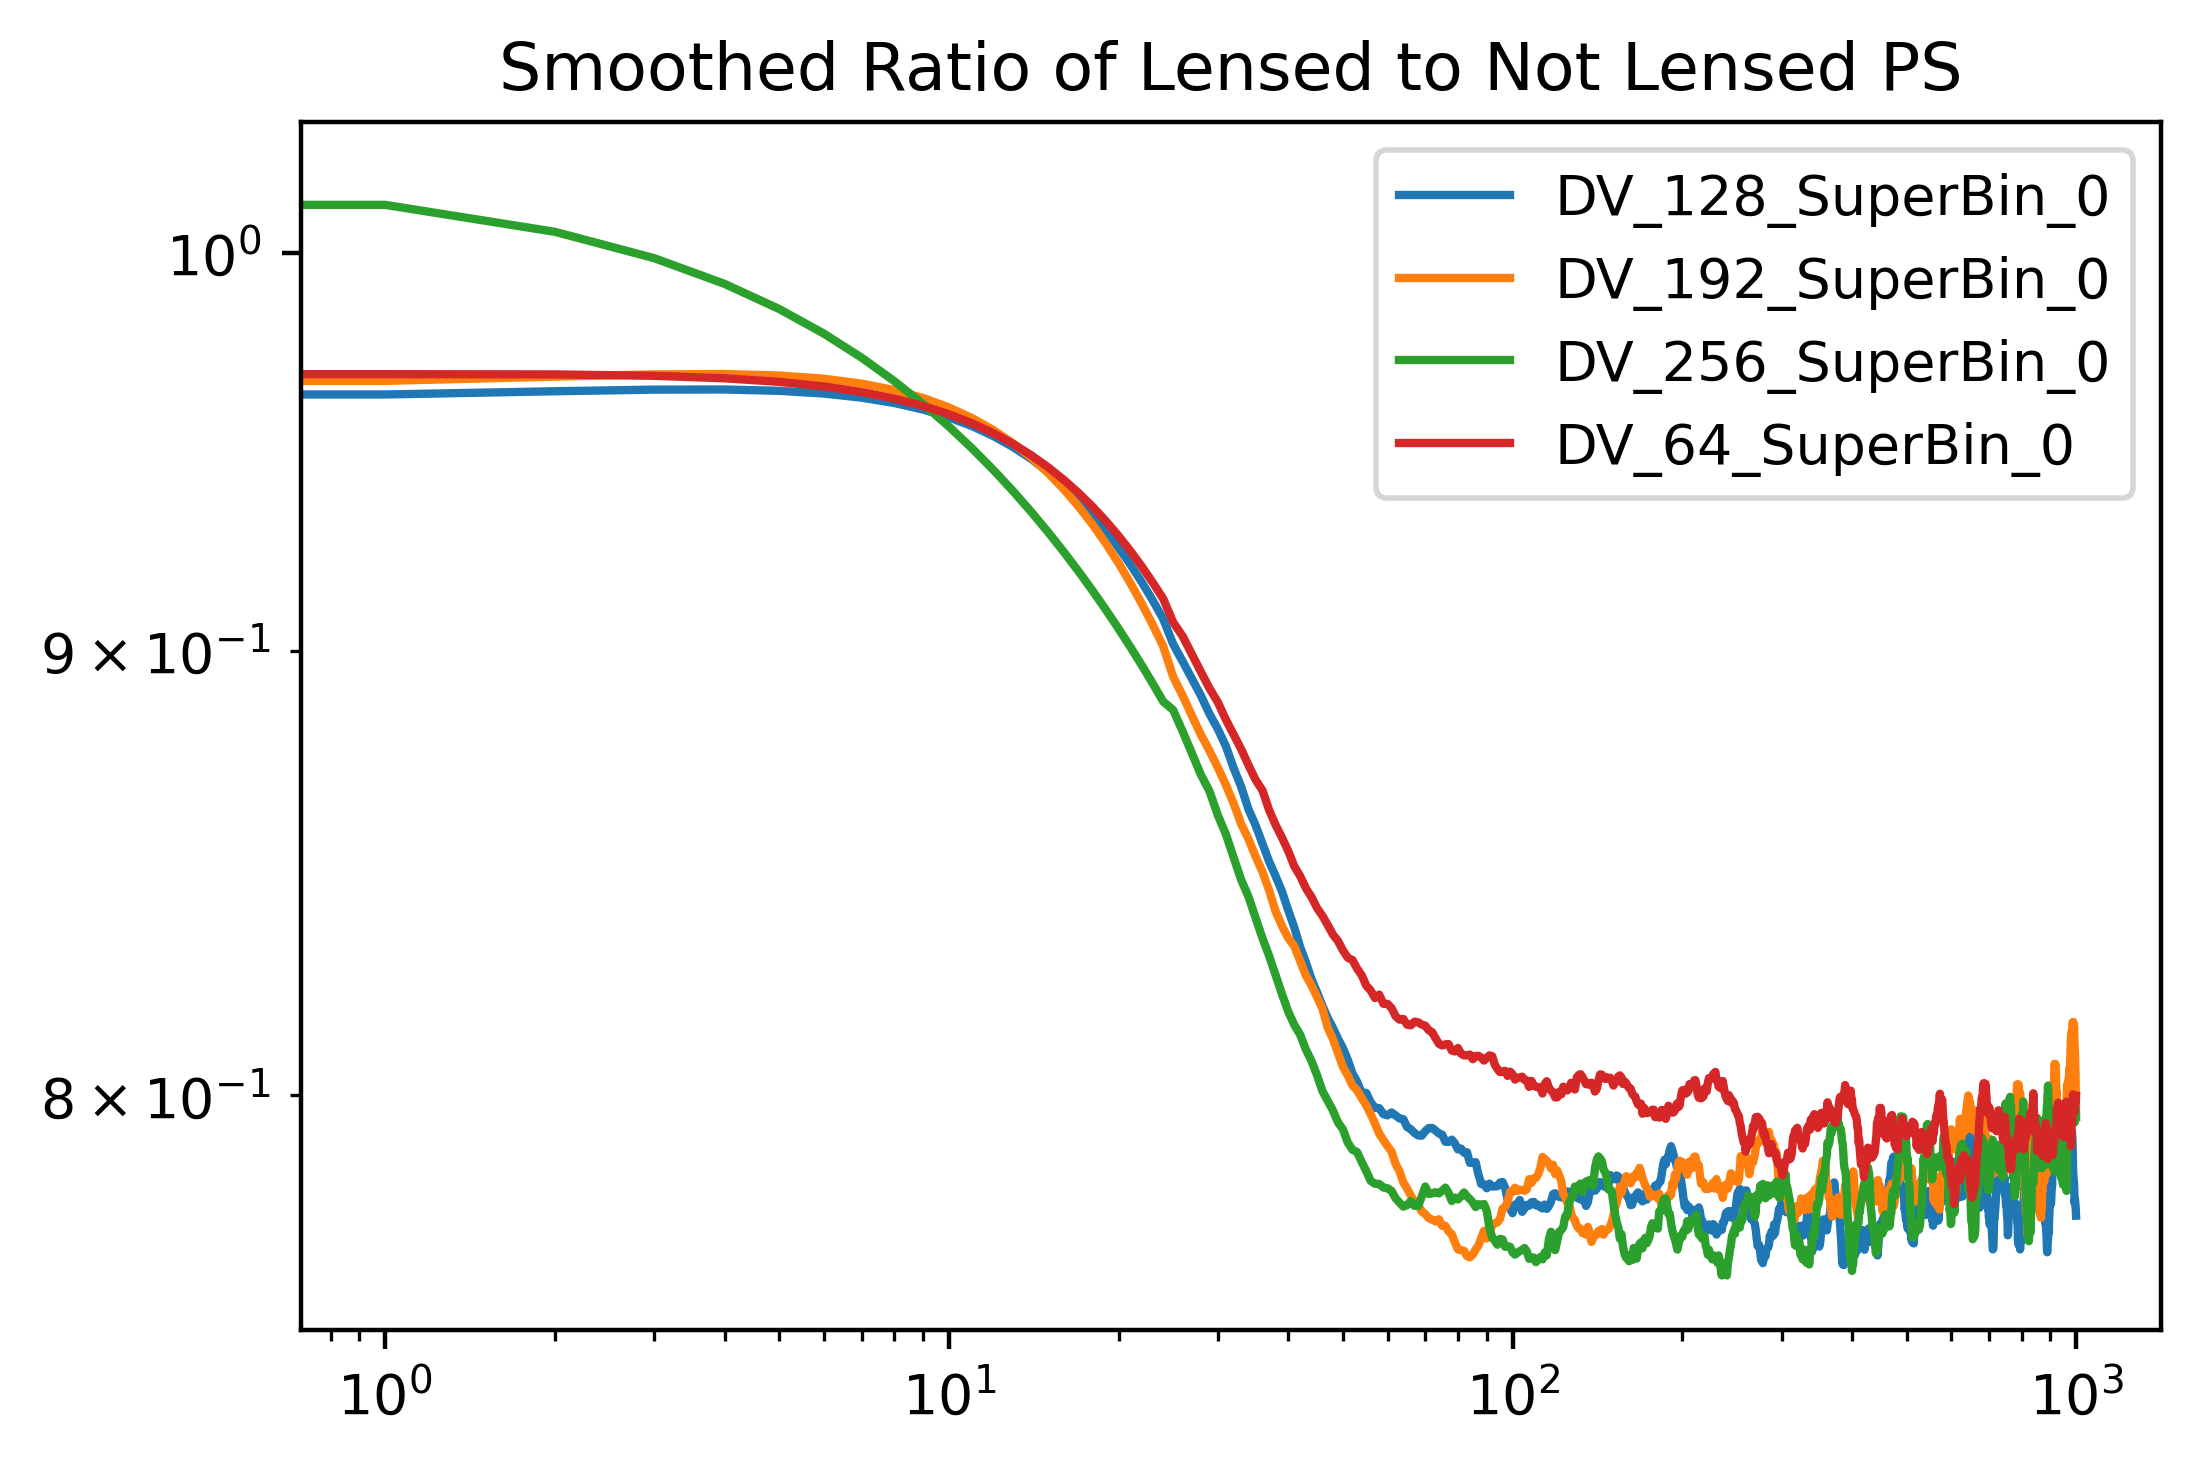

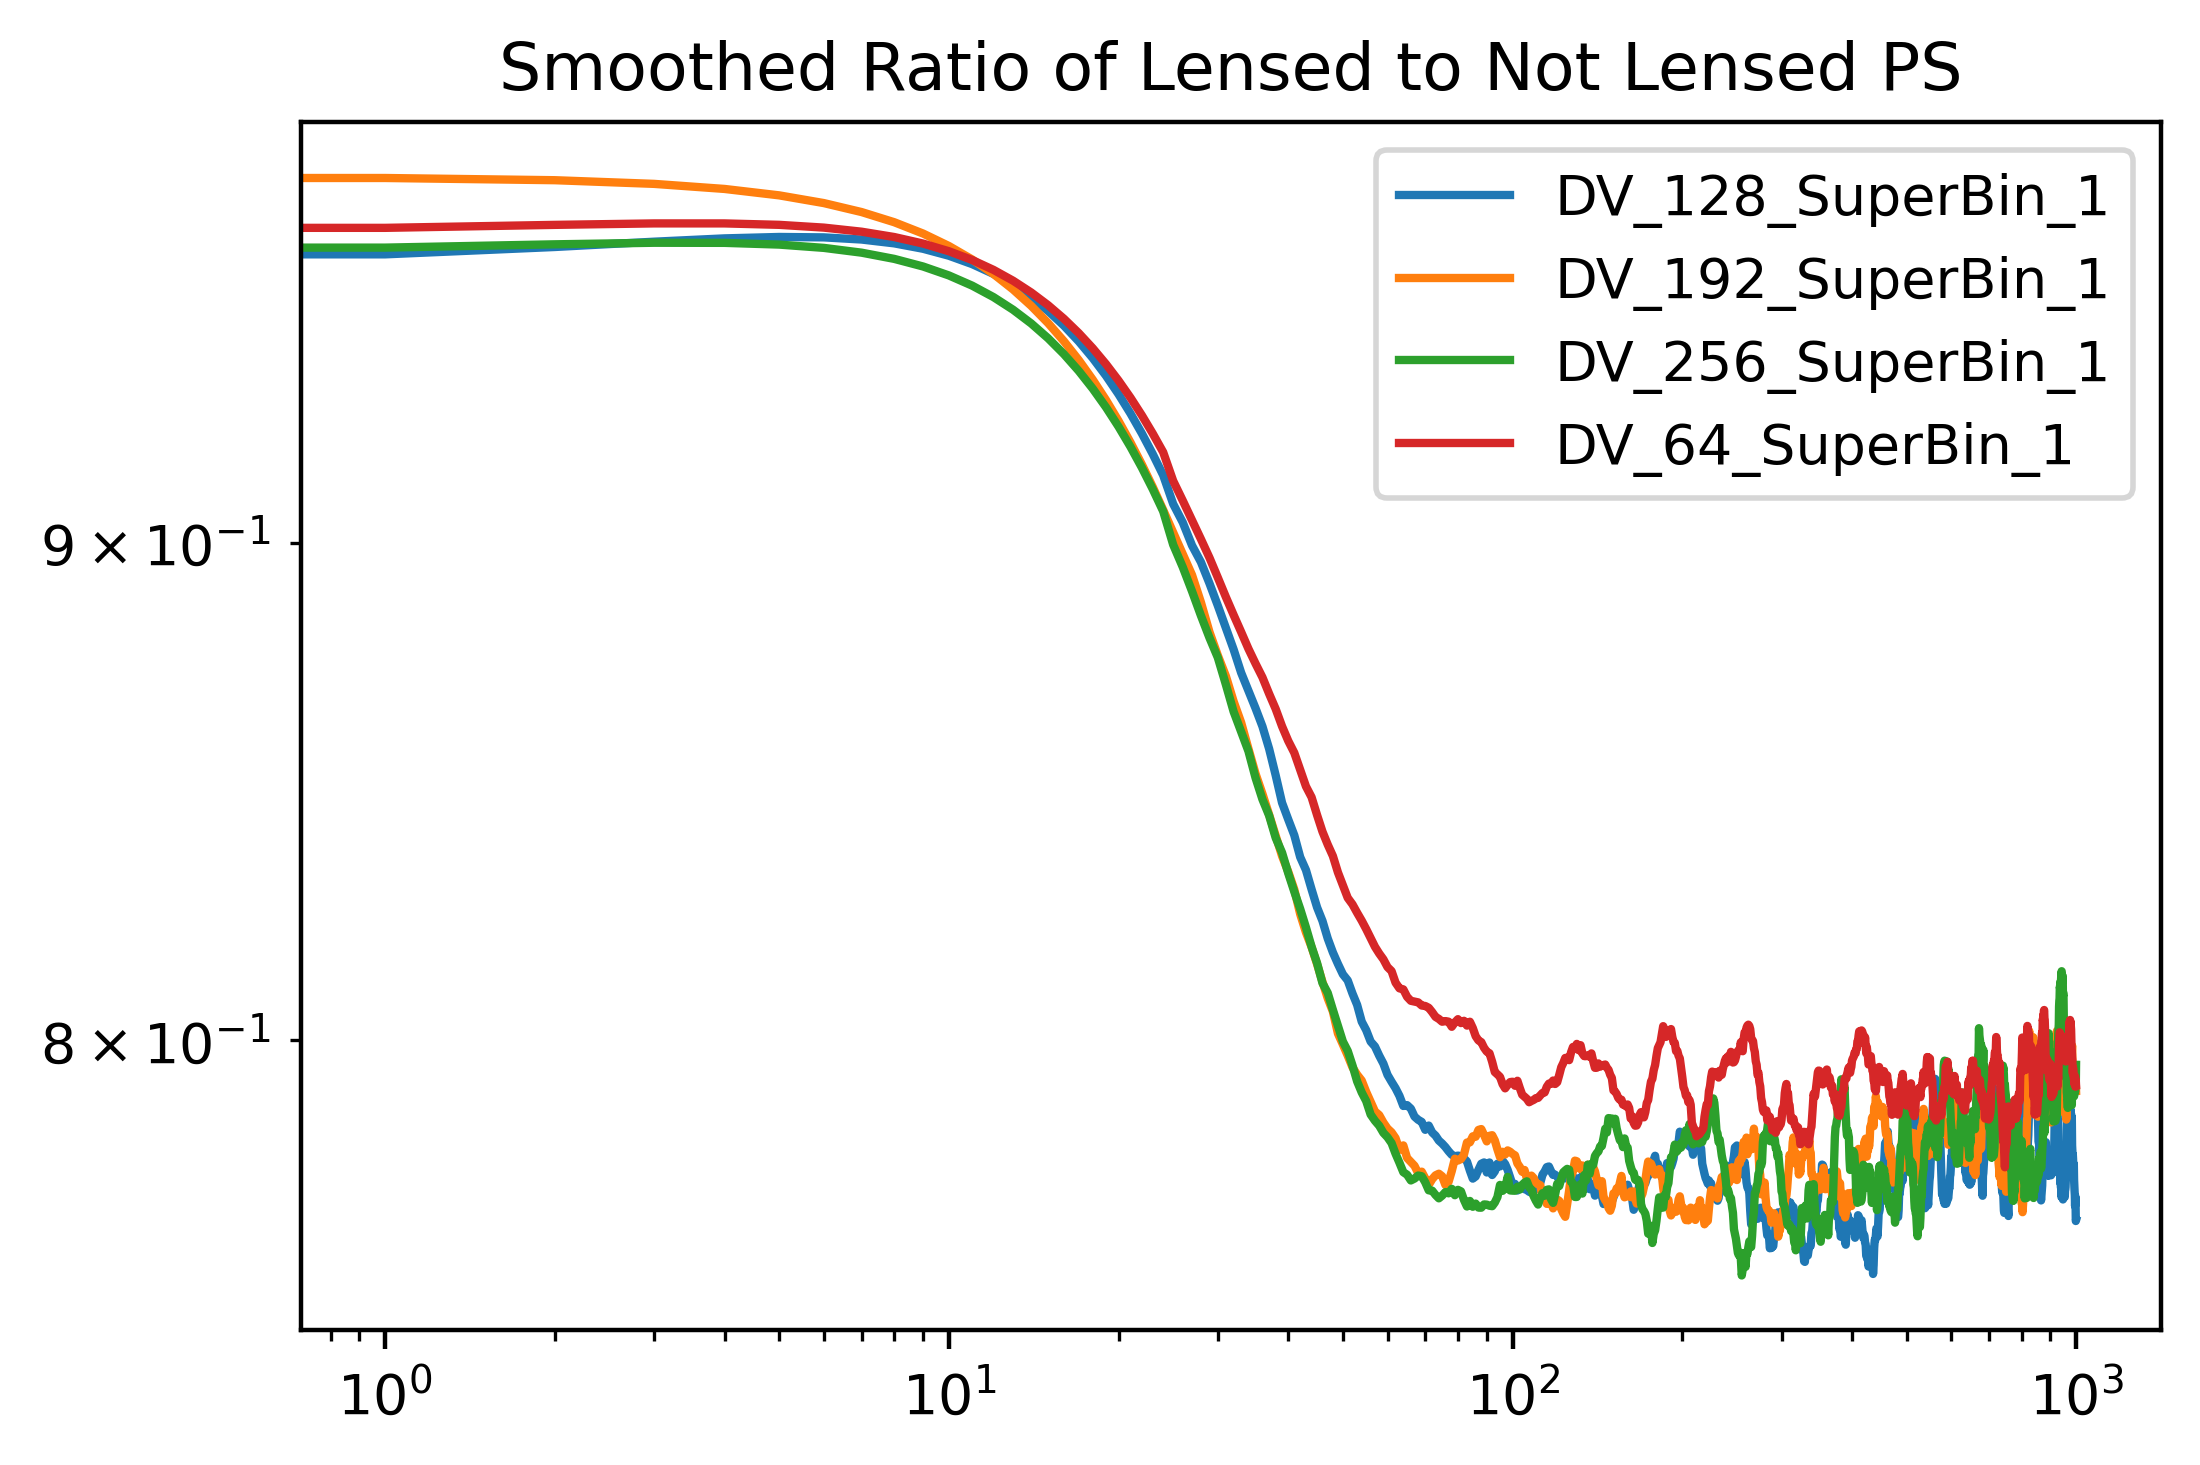

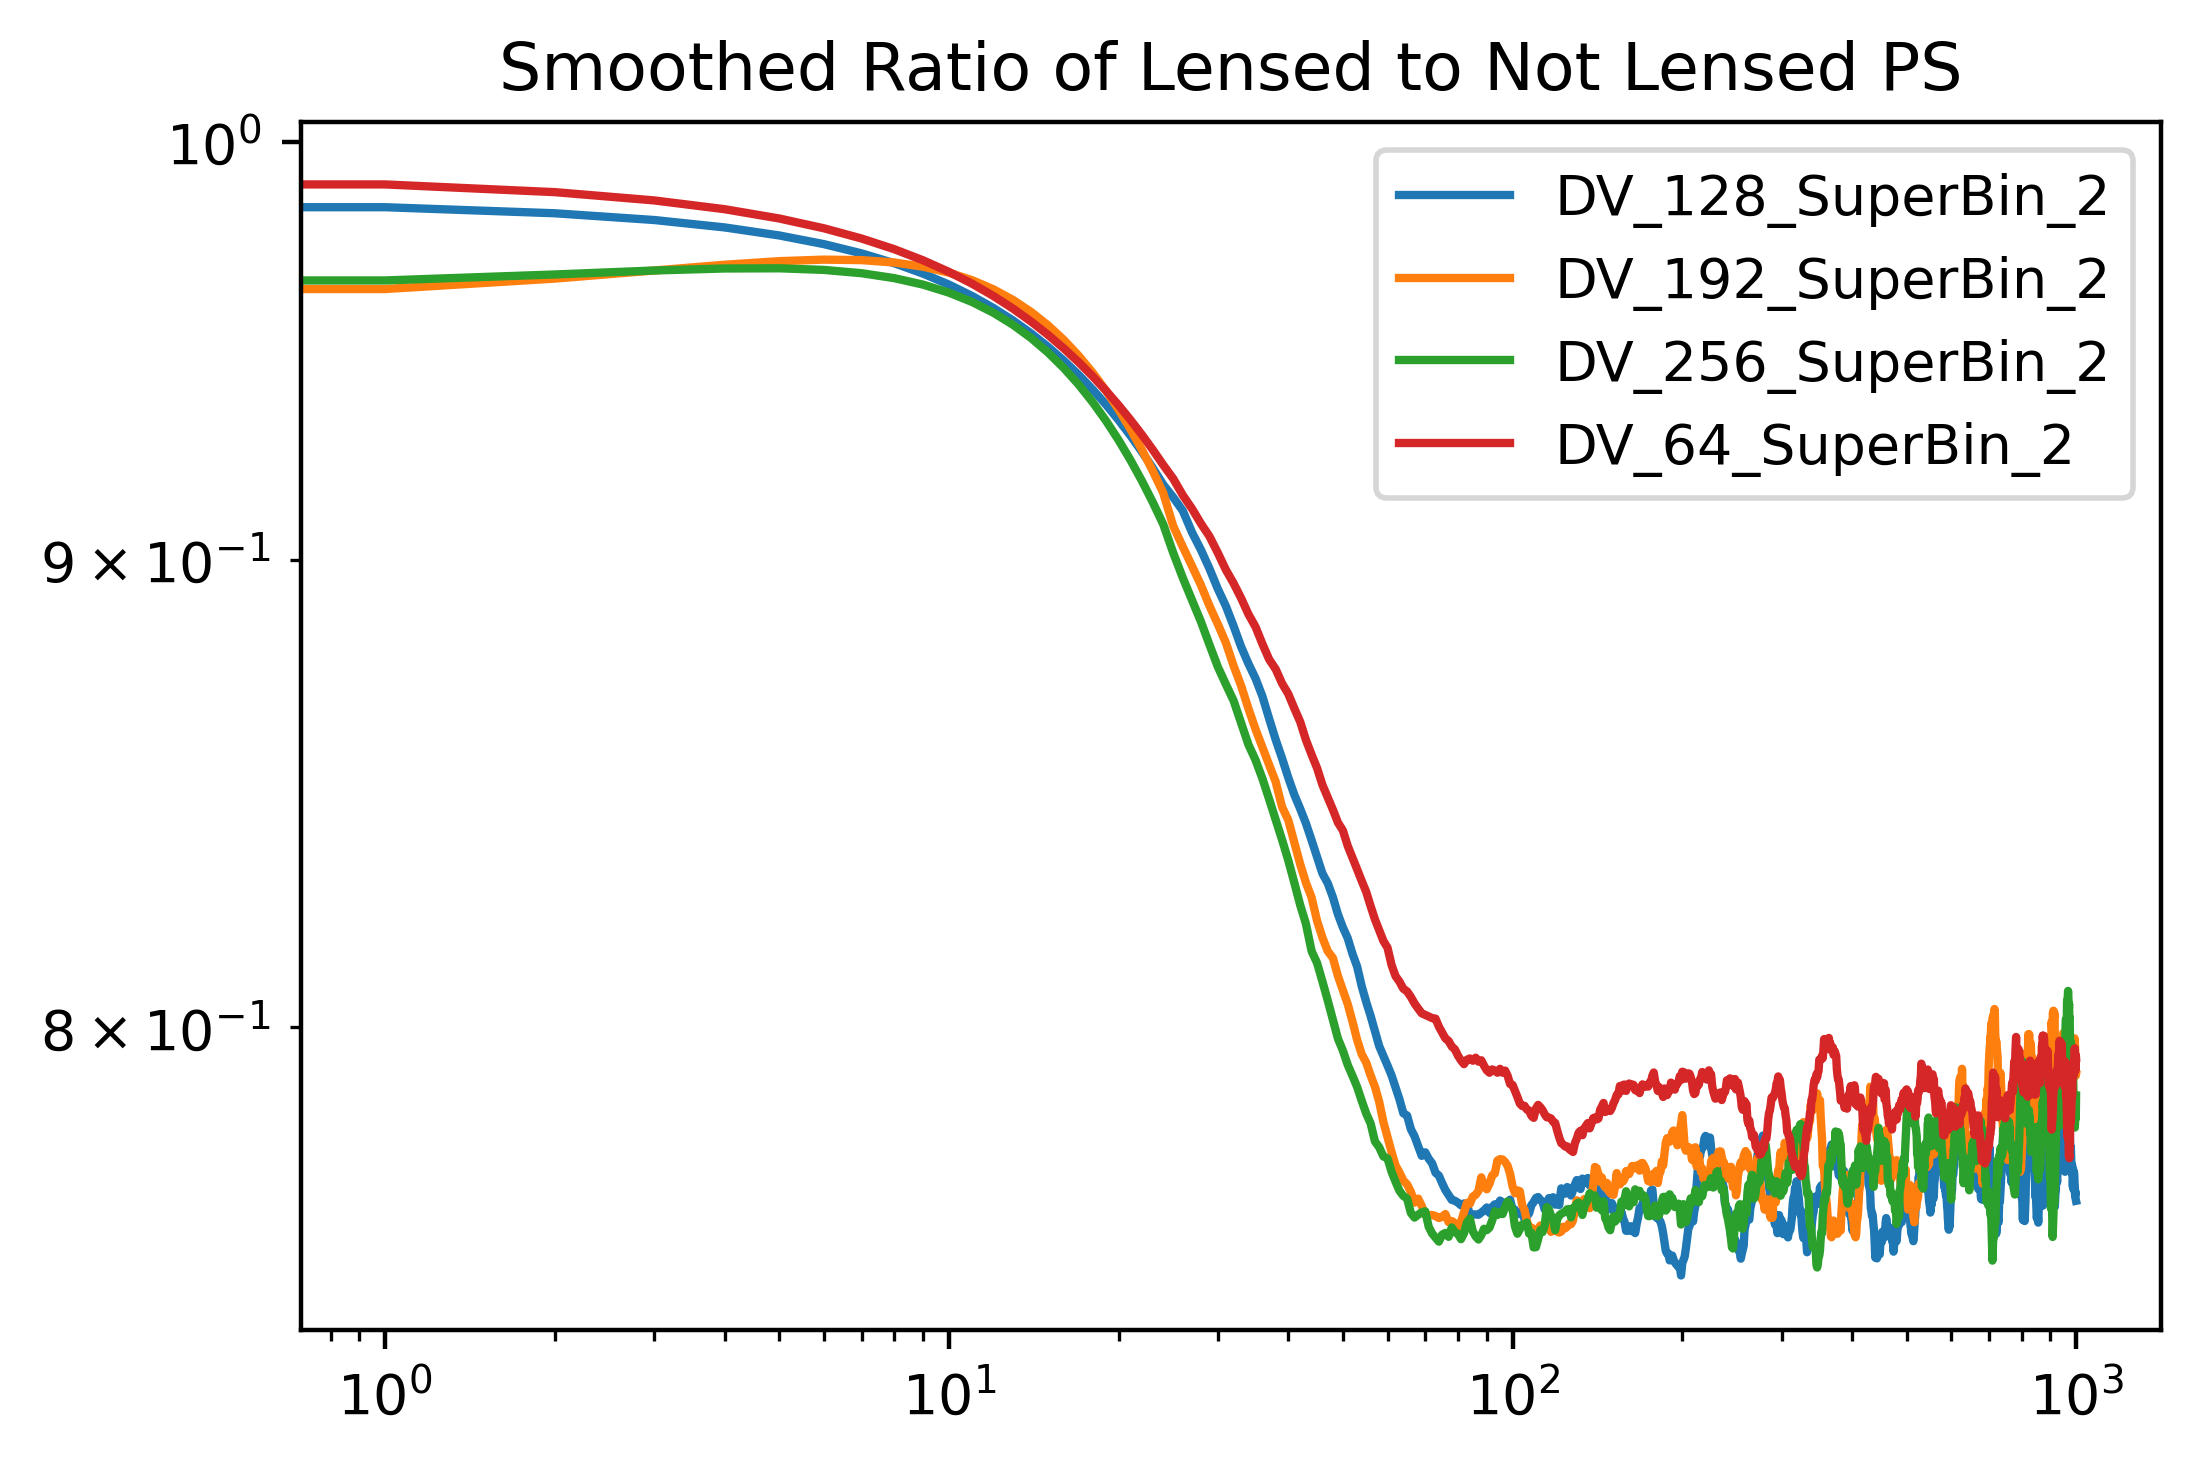

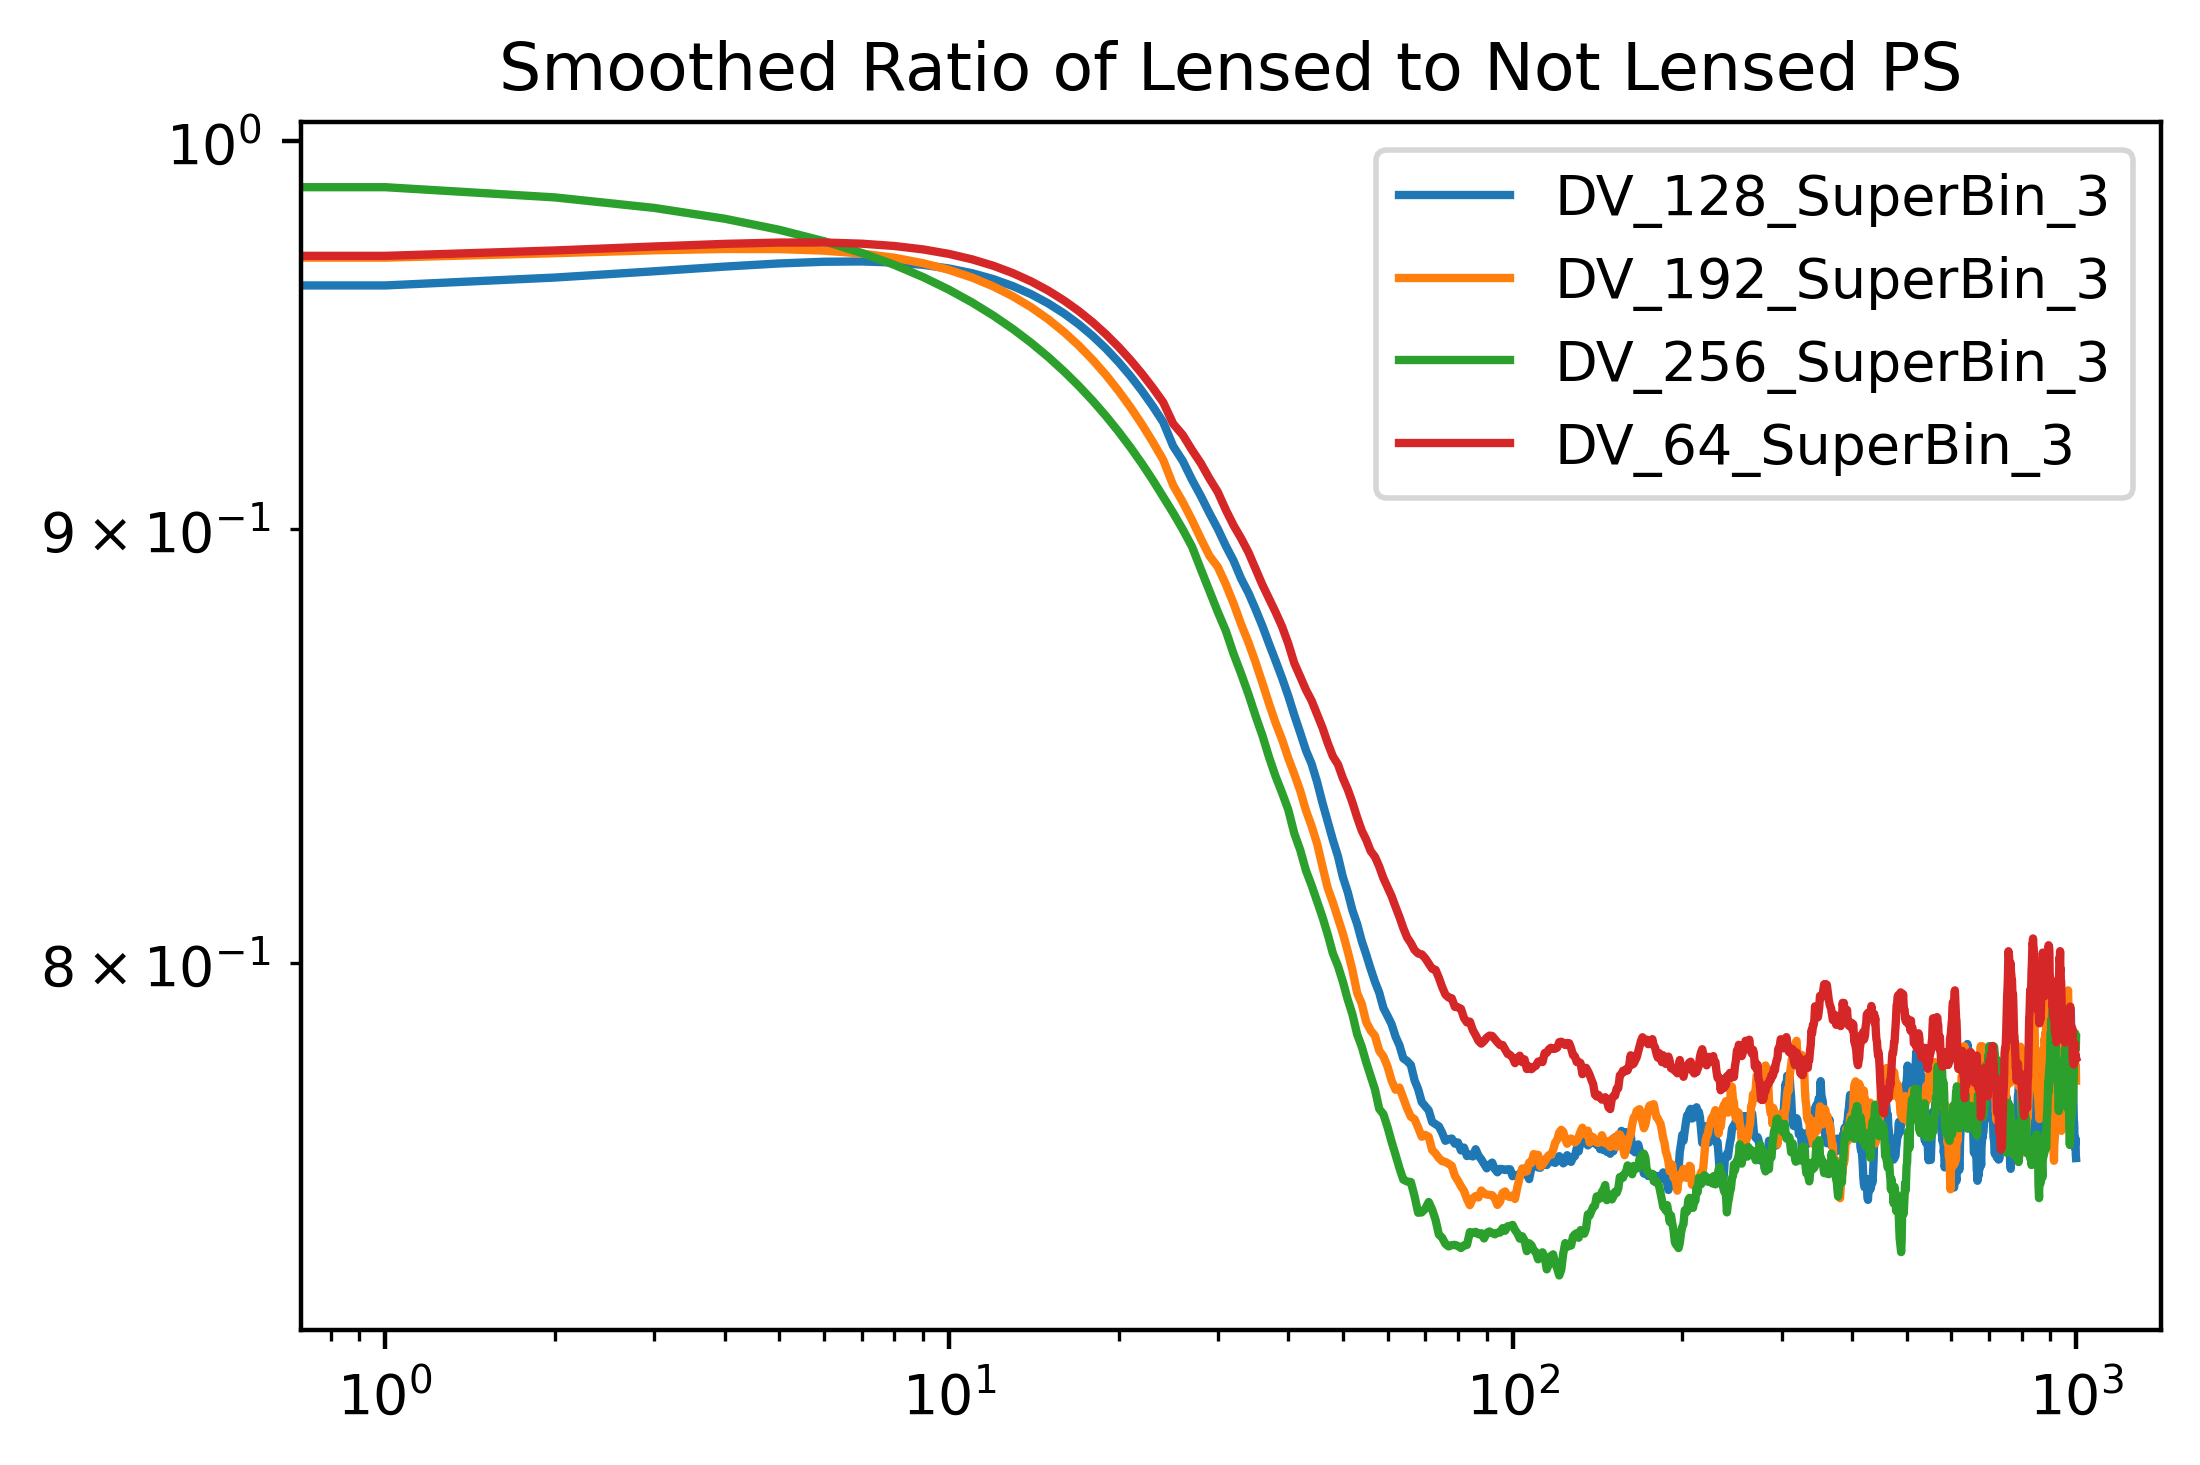

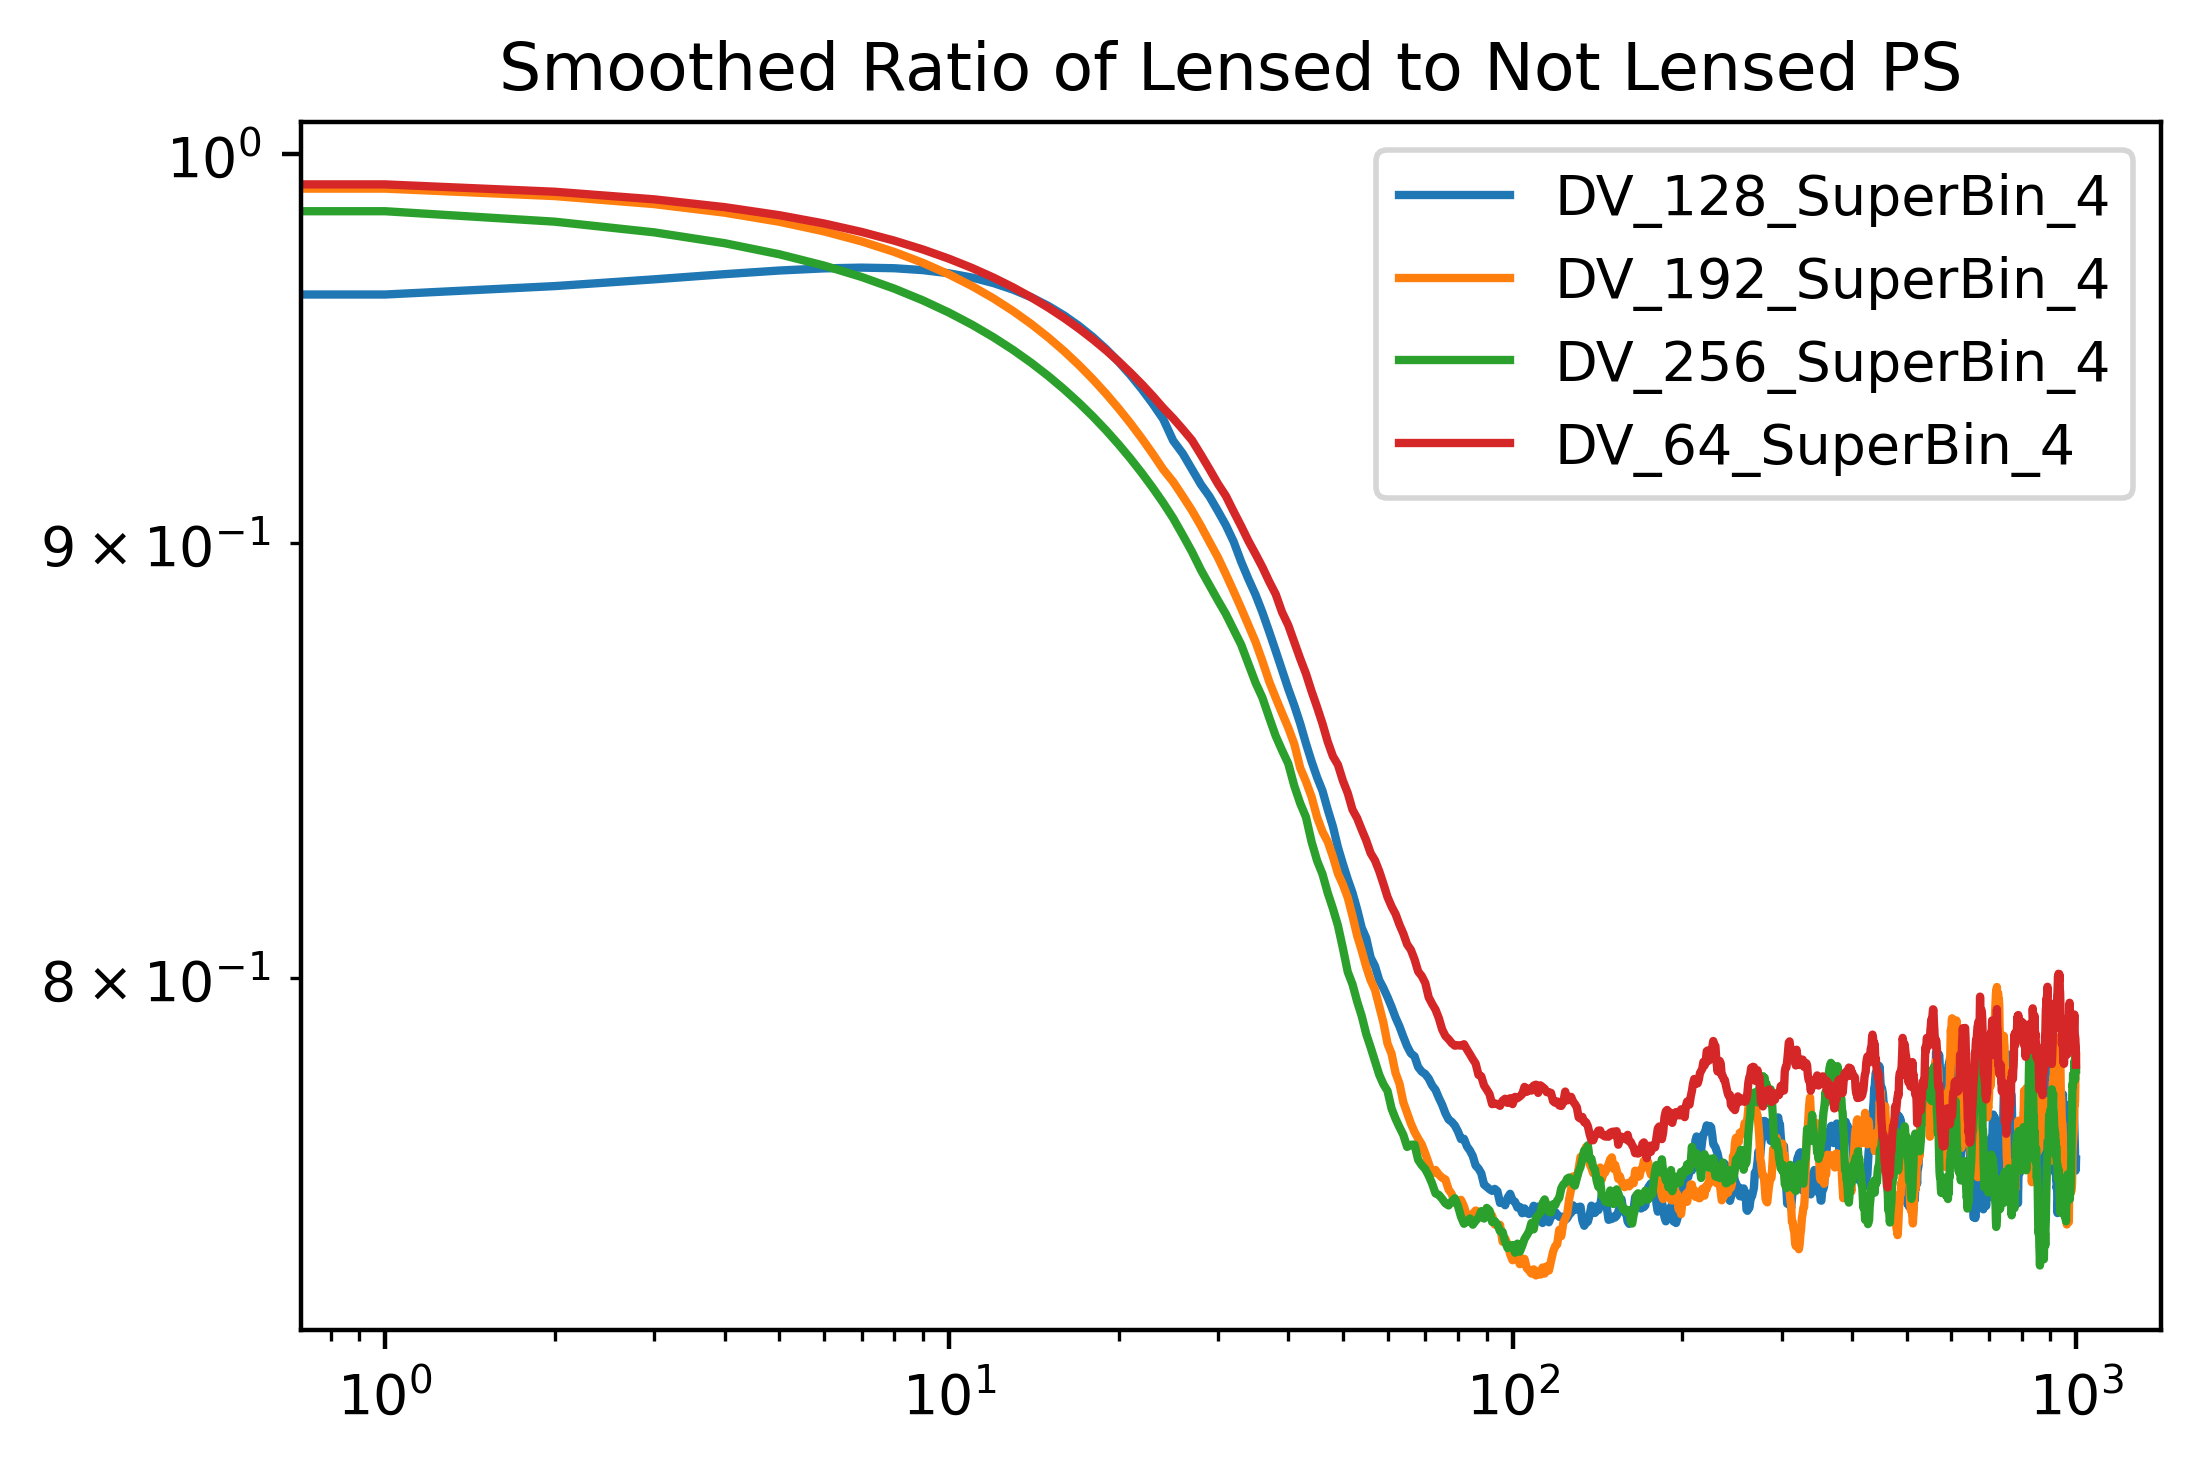

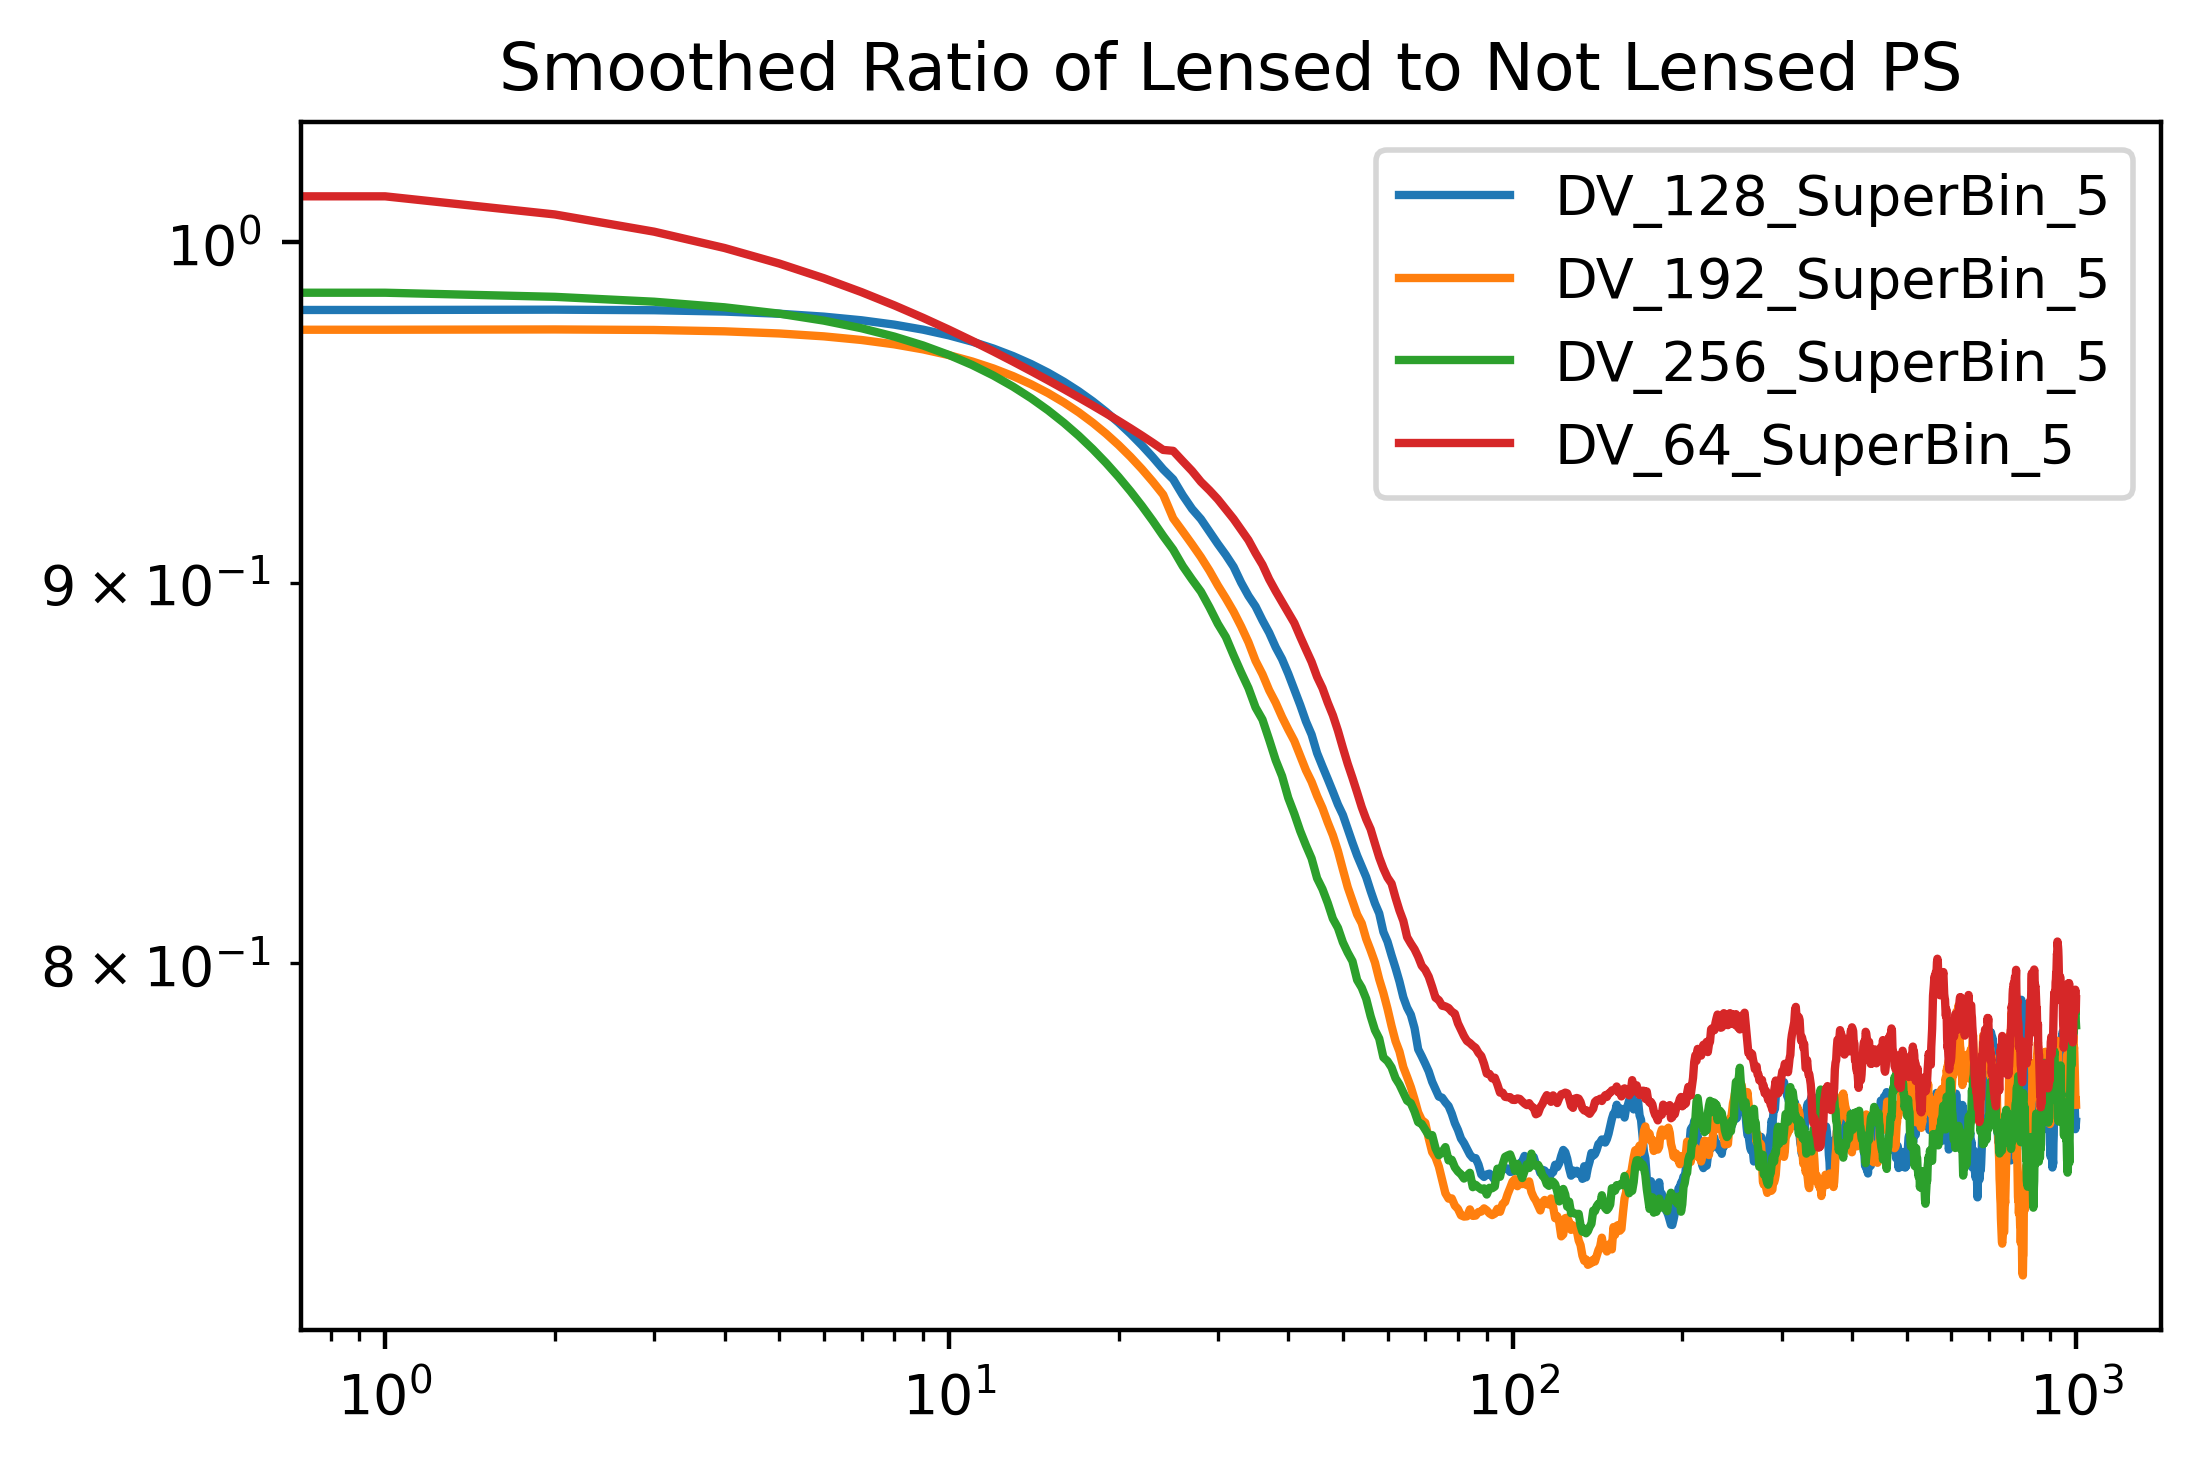

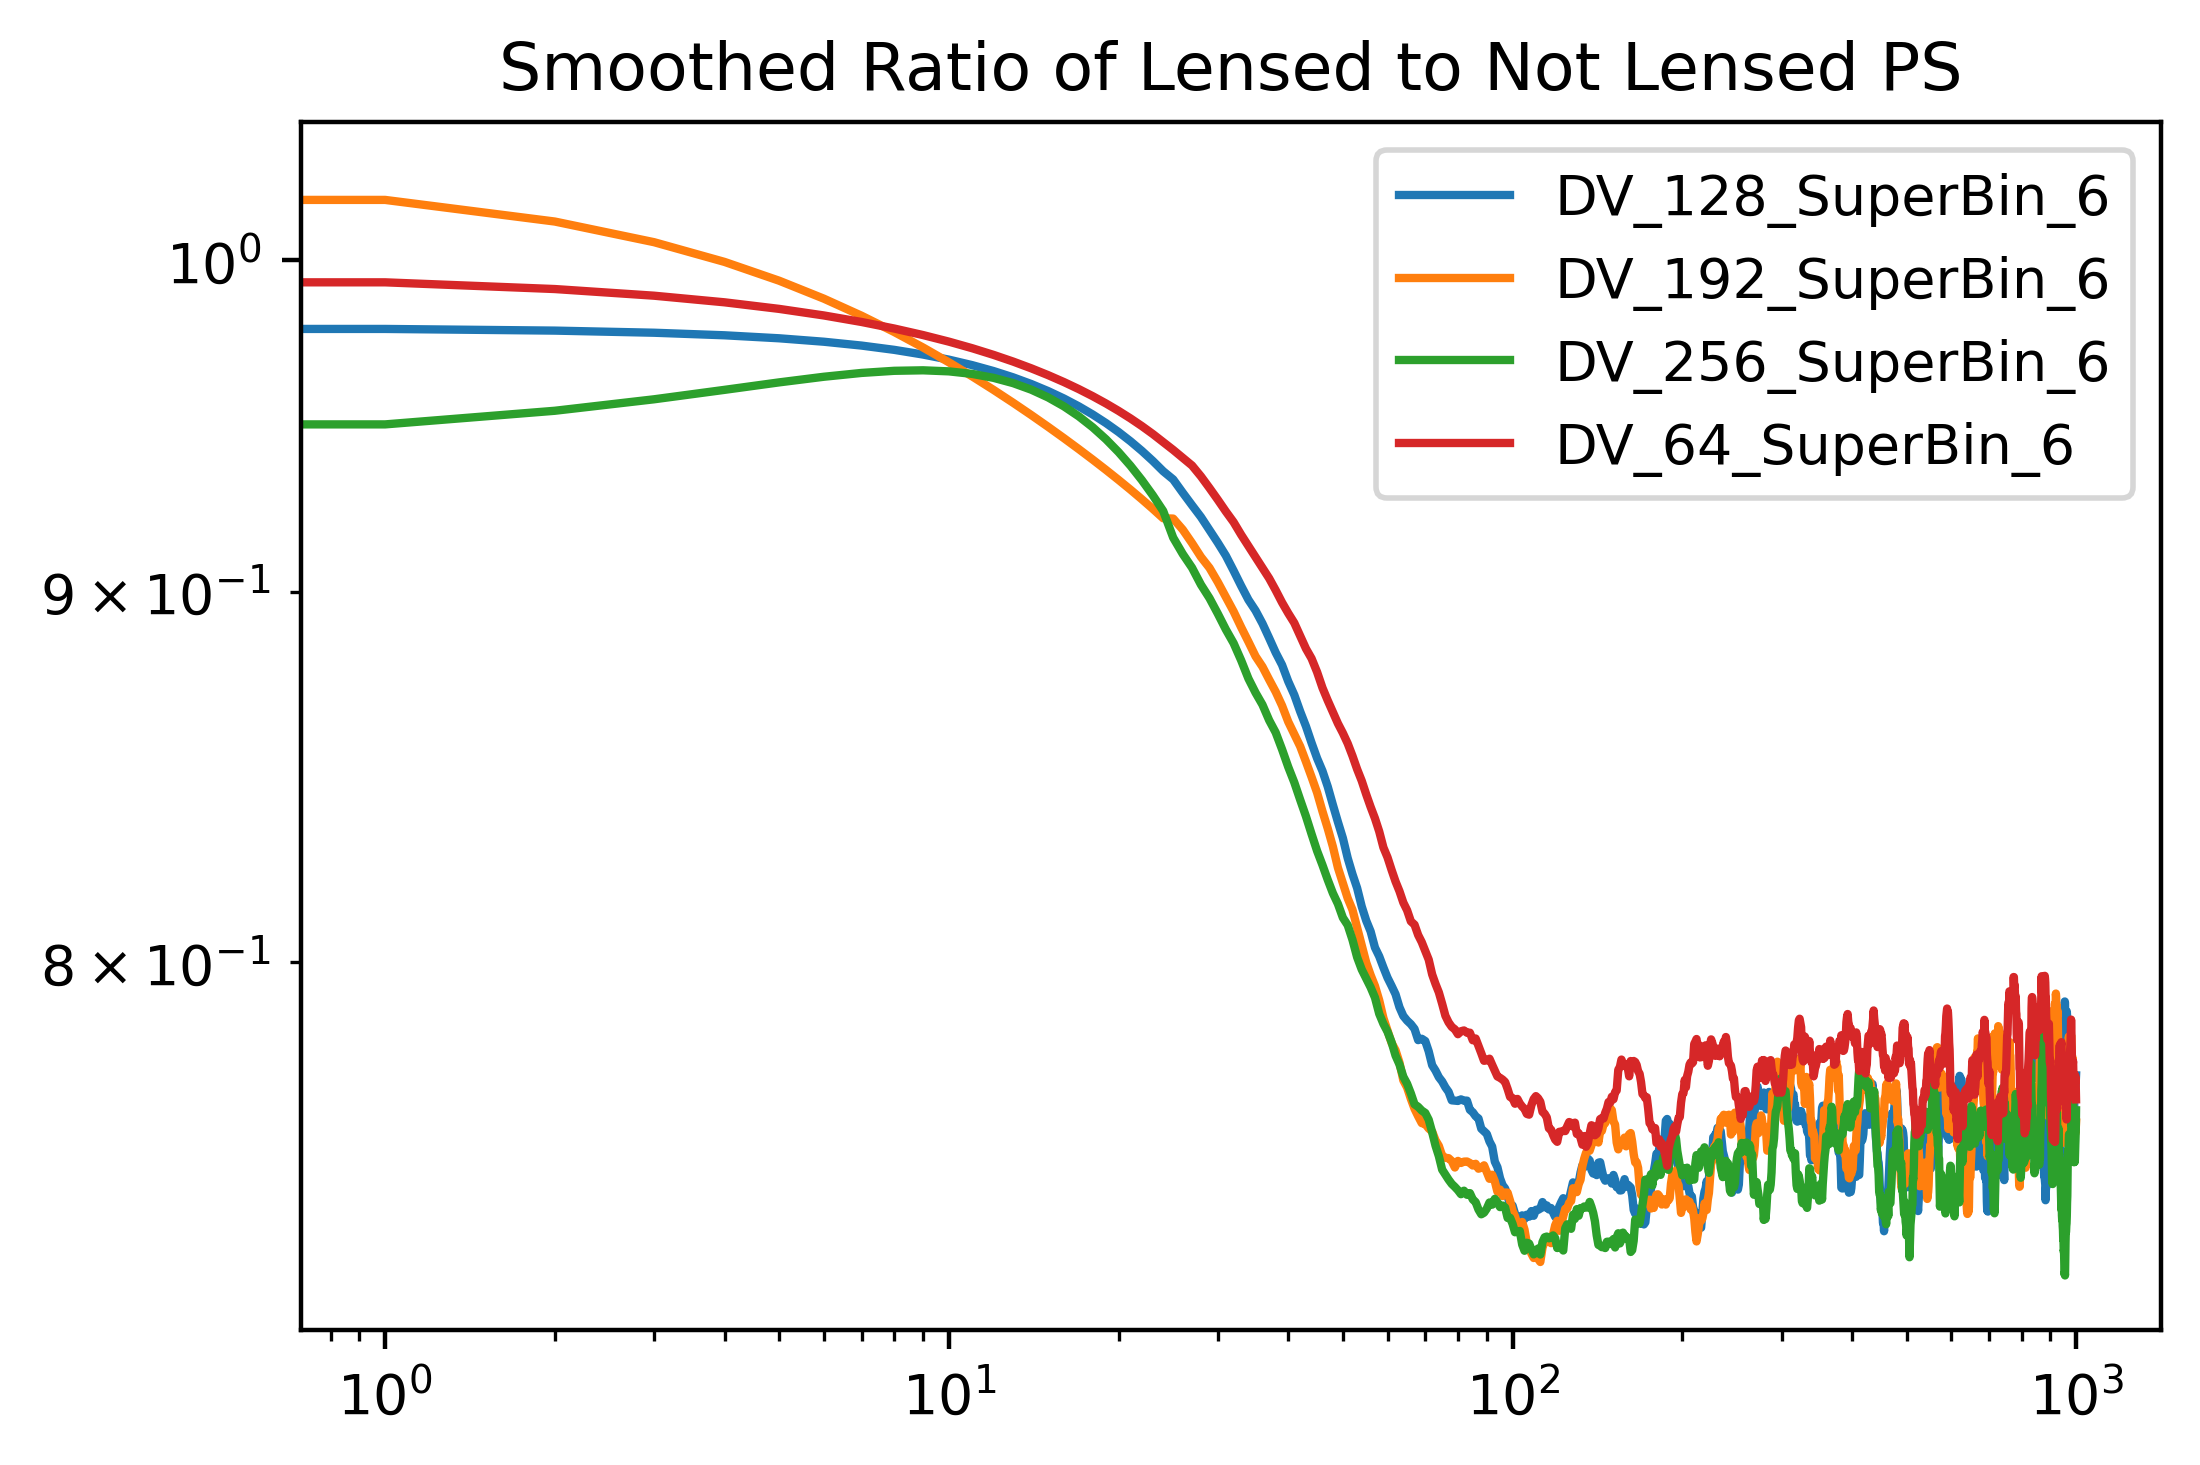

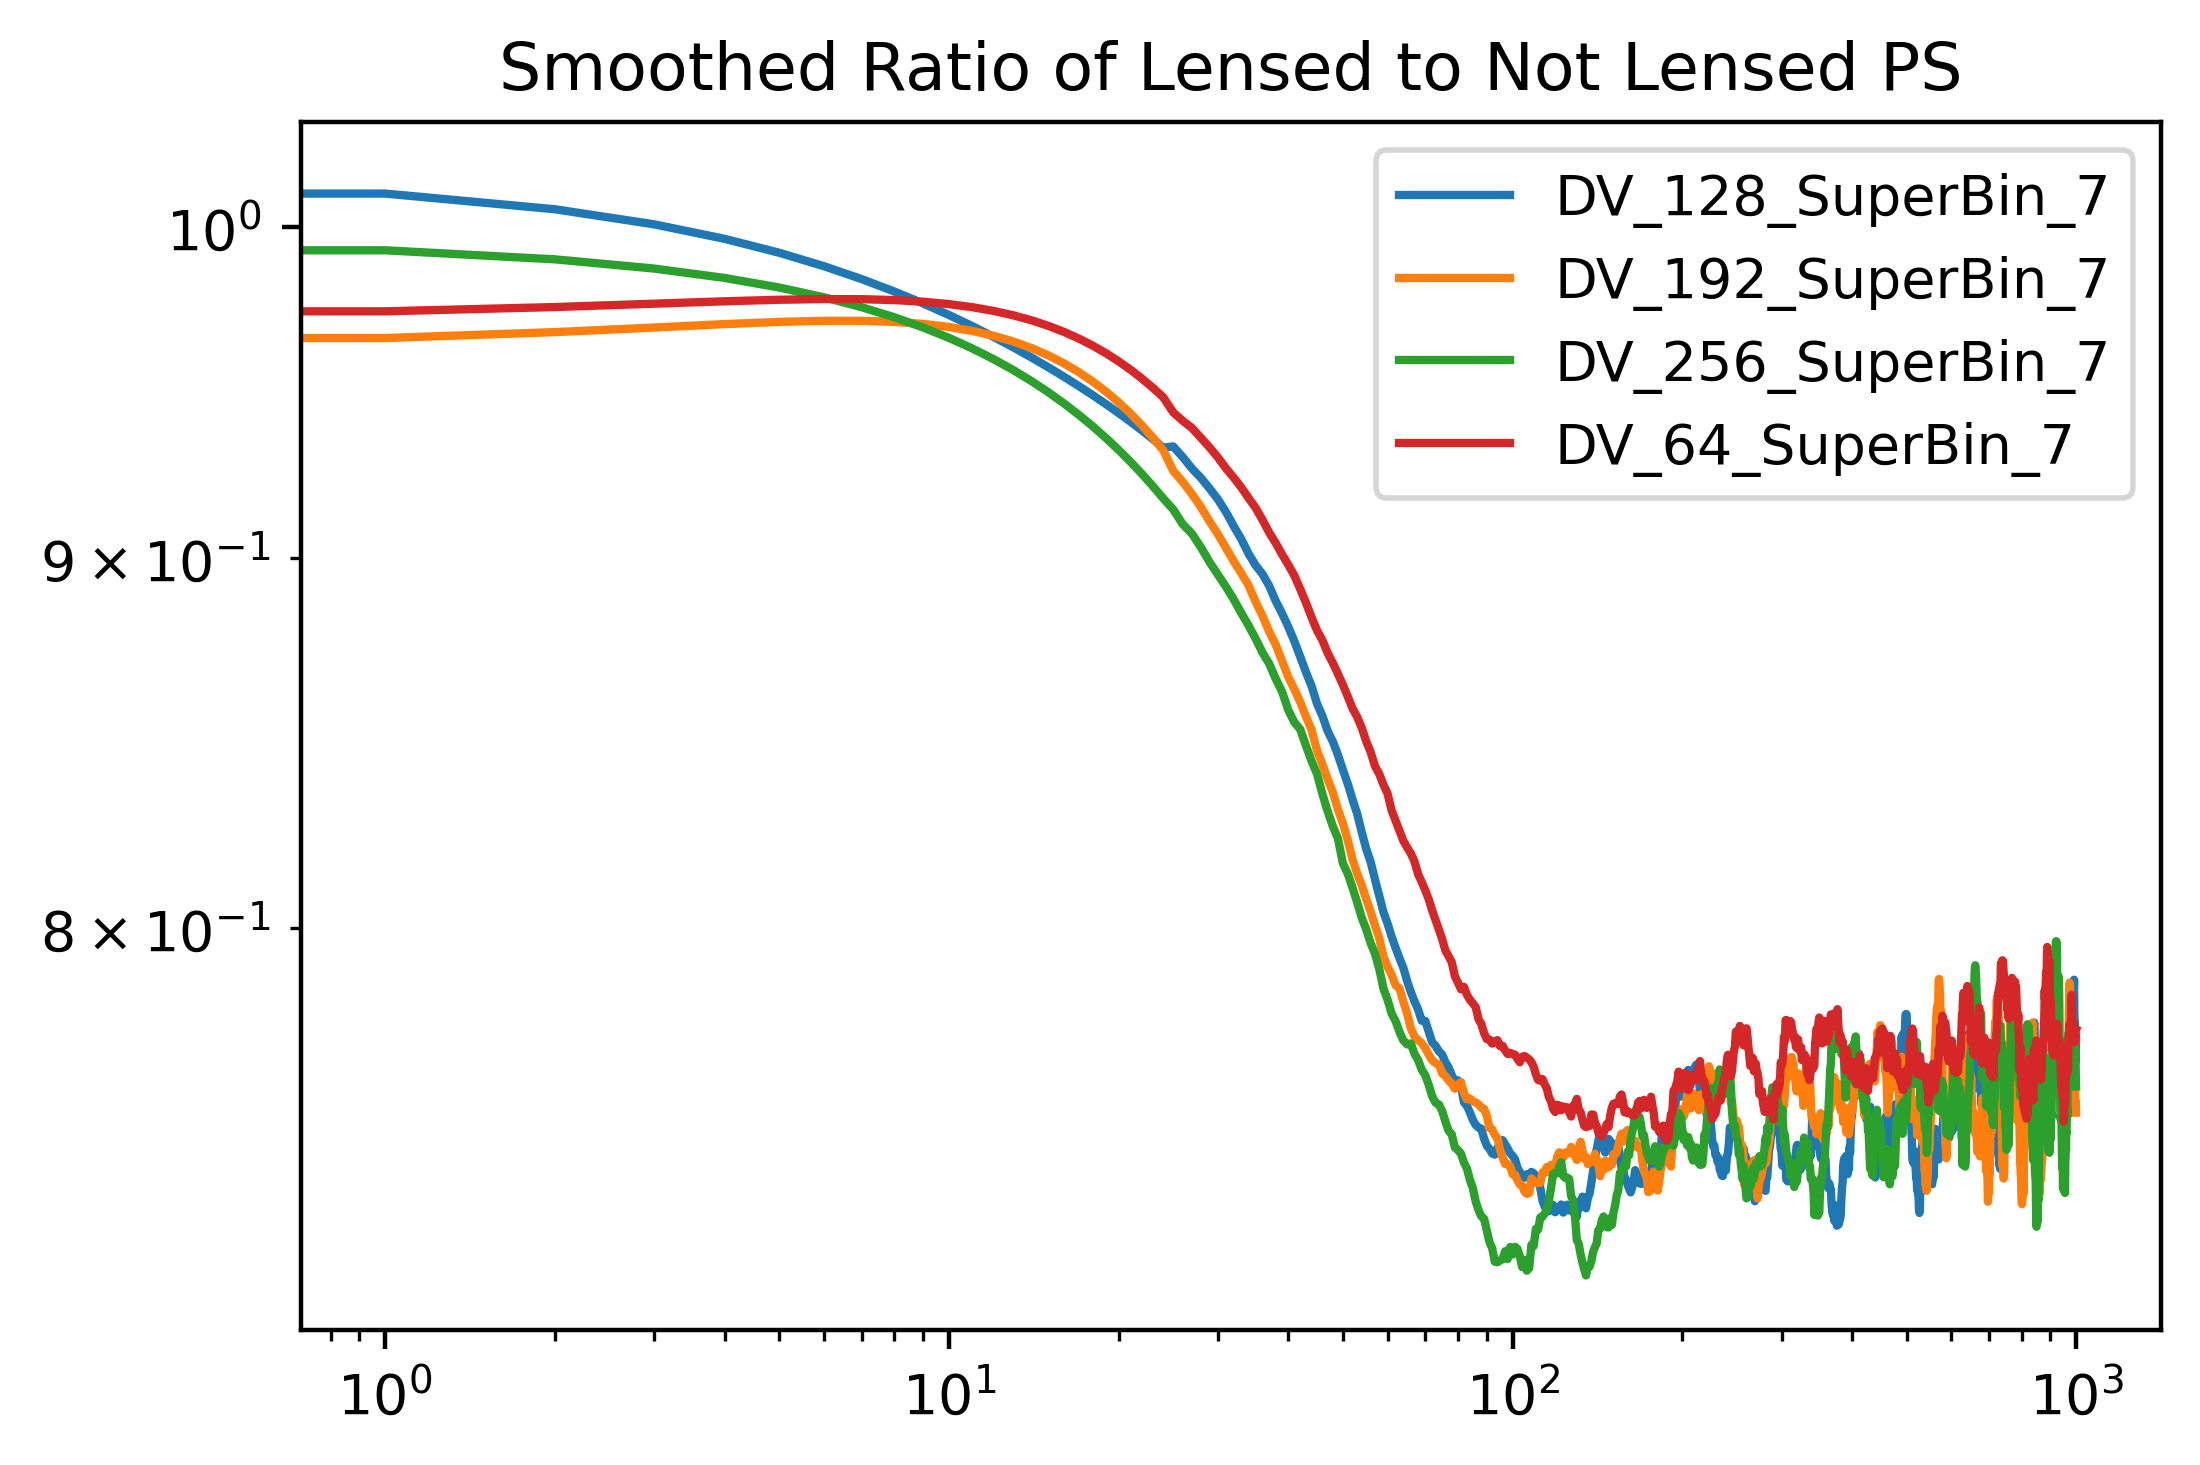

In [51]:
for i in range(9):
    plt.figure(dpi=400)
    plt.loglog(np.transpose(smoothRatio[i:36:9,:1000]));
    plt.legend(titles[i:36:9]);
    plt.title("Smoothed Ratio of Lensed to Not Lensed PS")

-0.17804450354486348
-52.622554895216034
1.980621416695059
11.947164465141231
0.025009416888042767
2.8433576471666884
2.465168125438896
2.6470790669656354
-0.36717456498842216


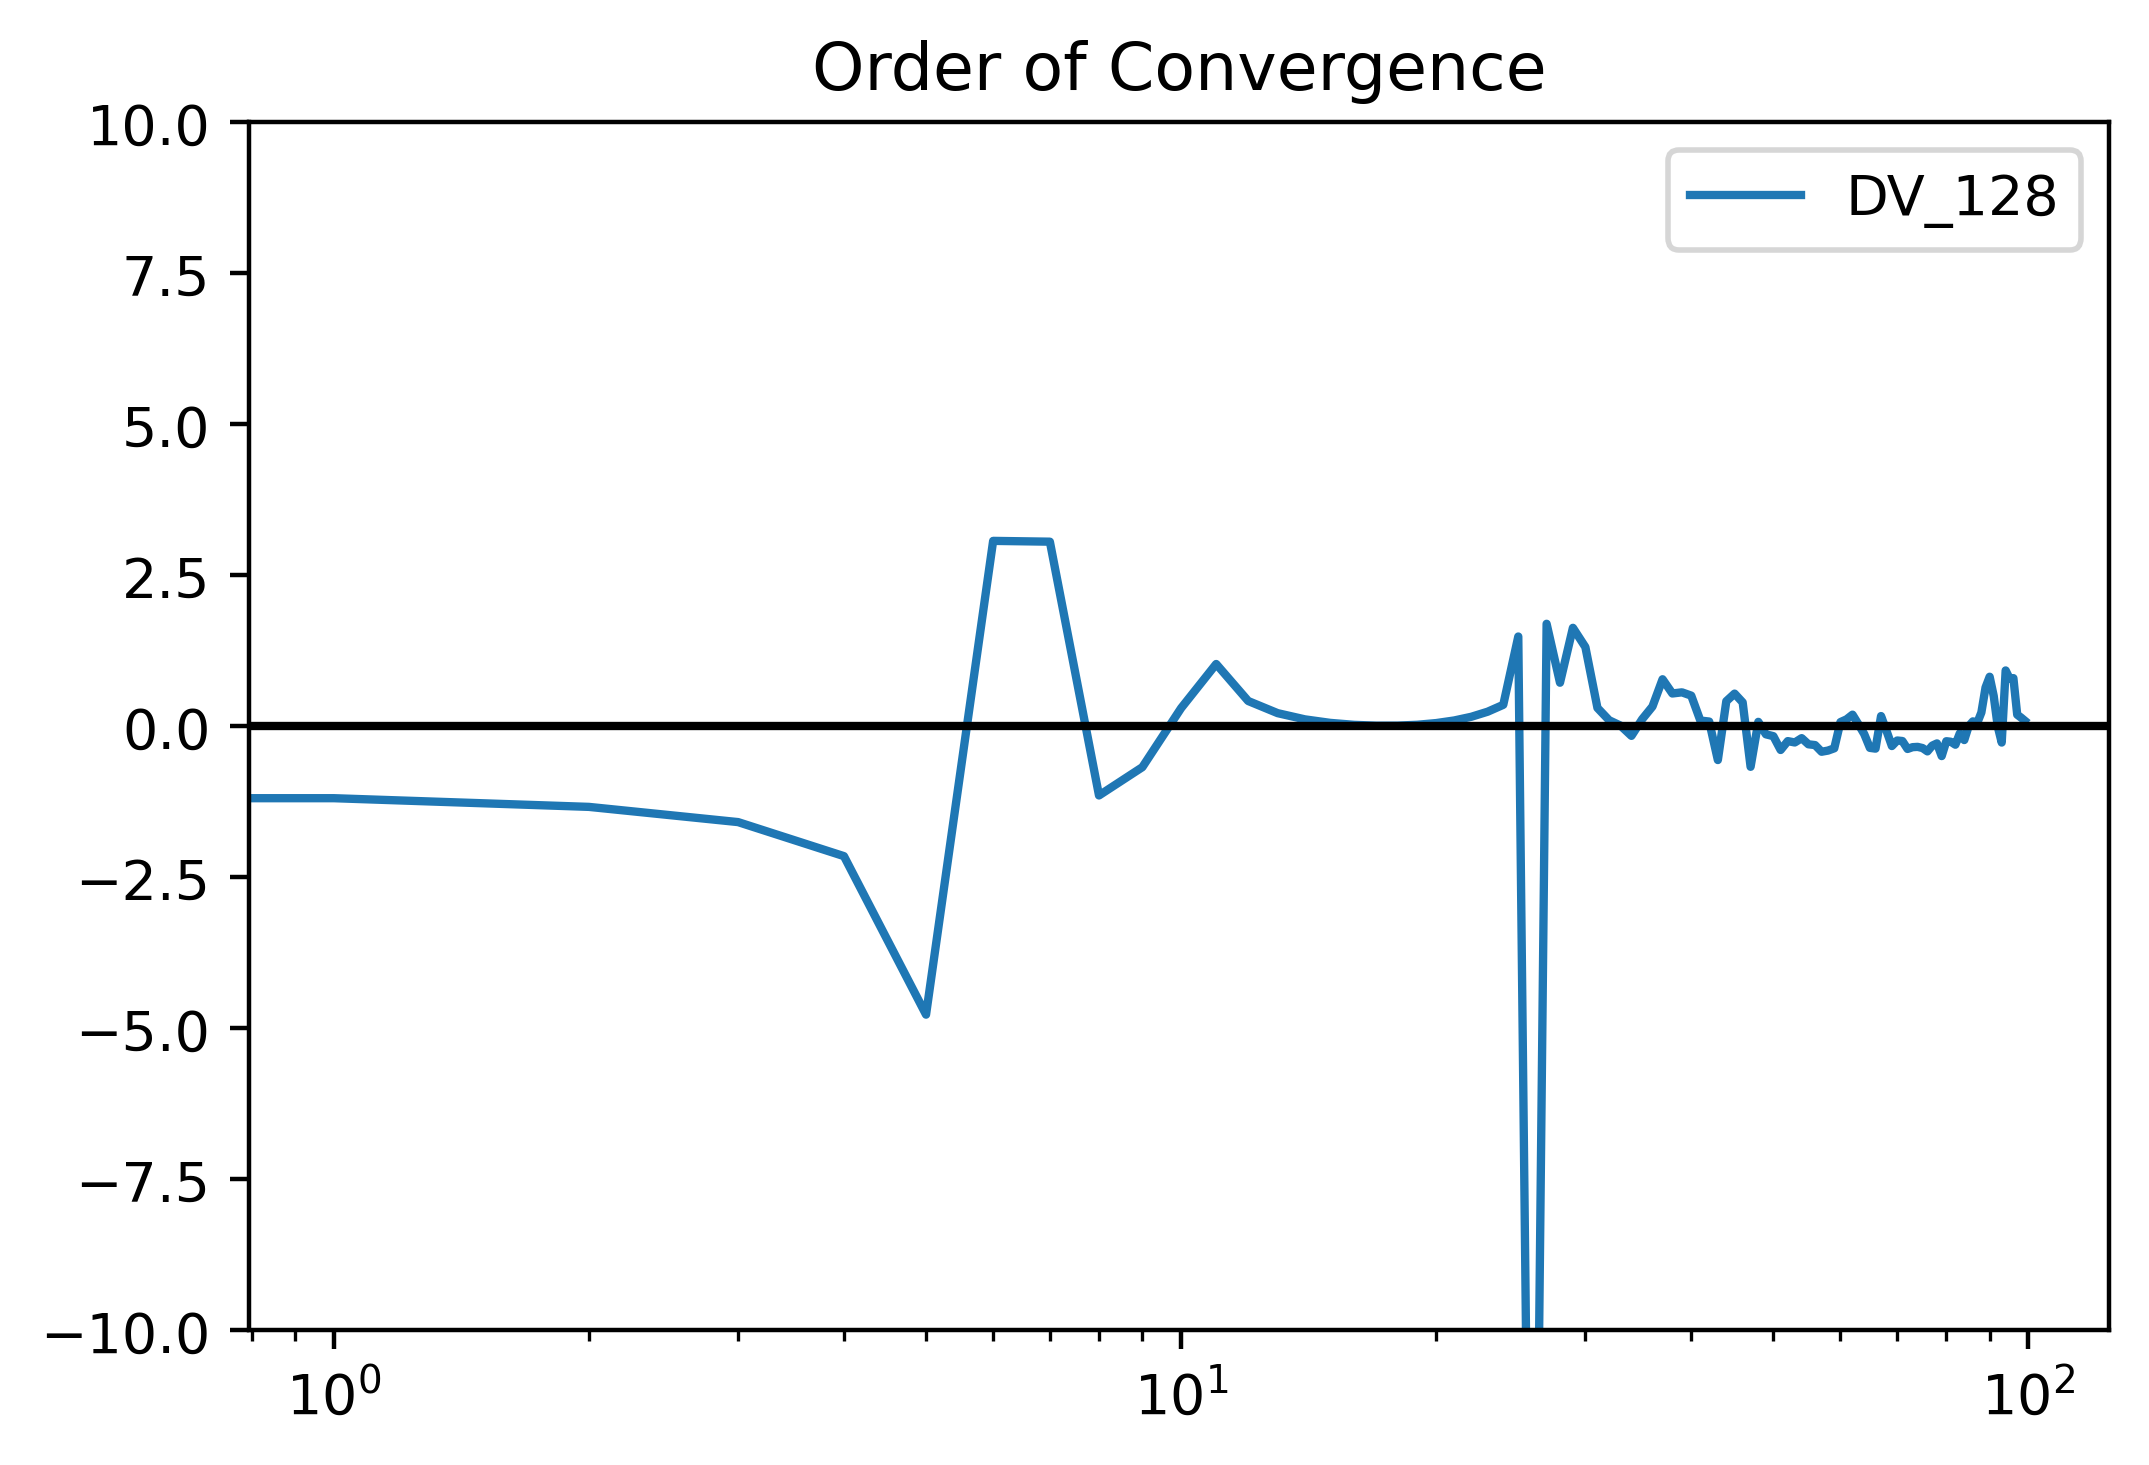

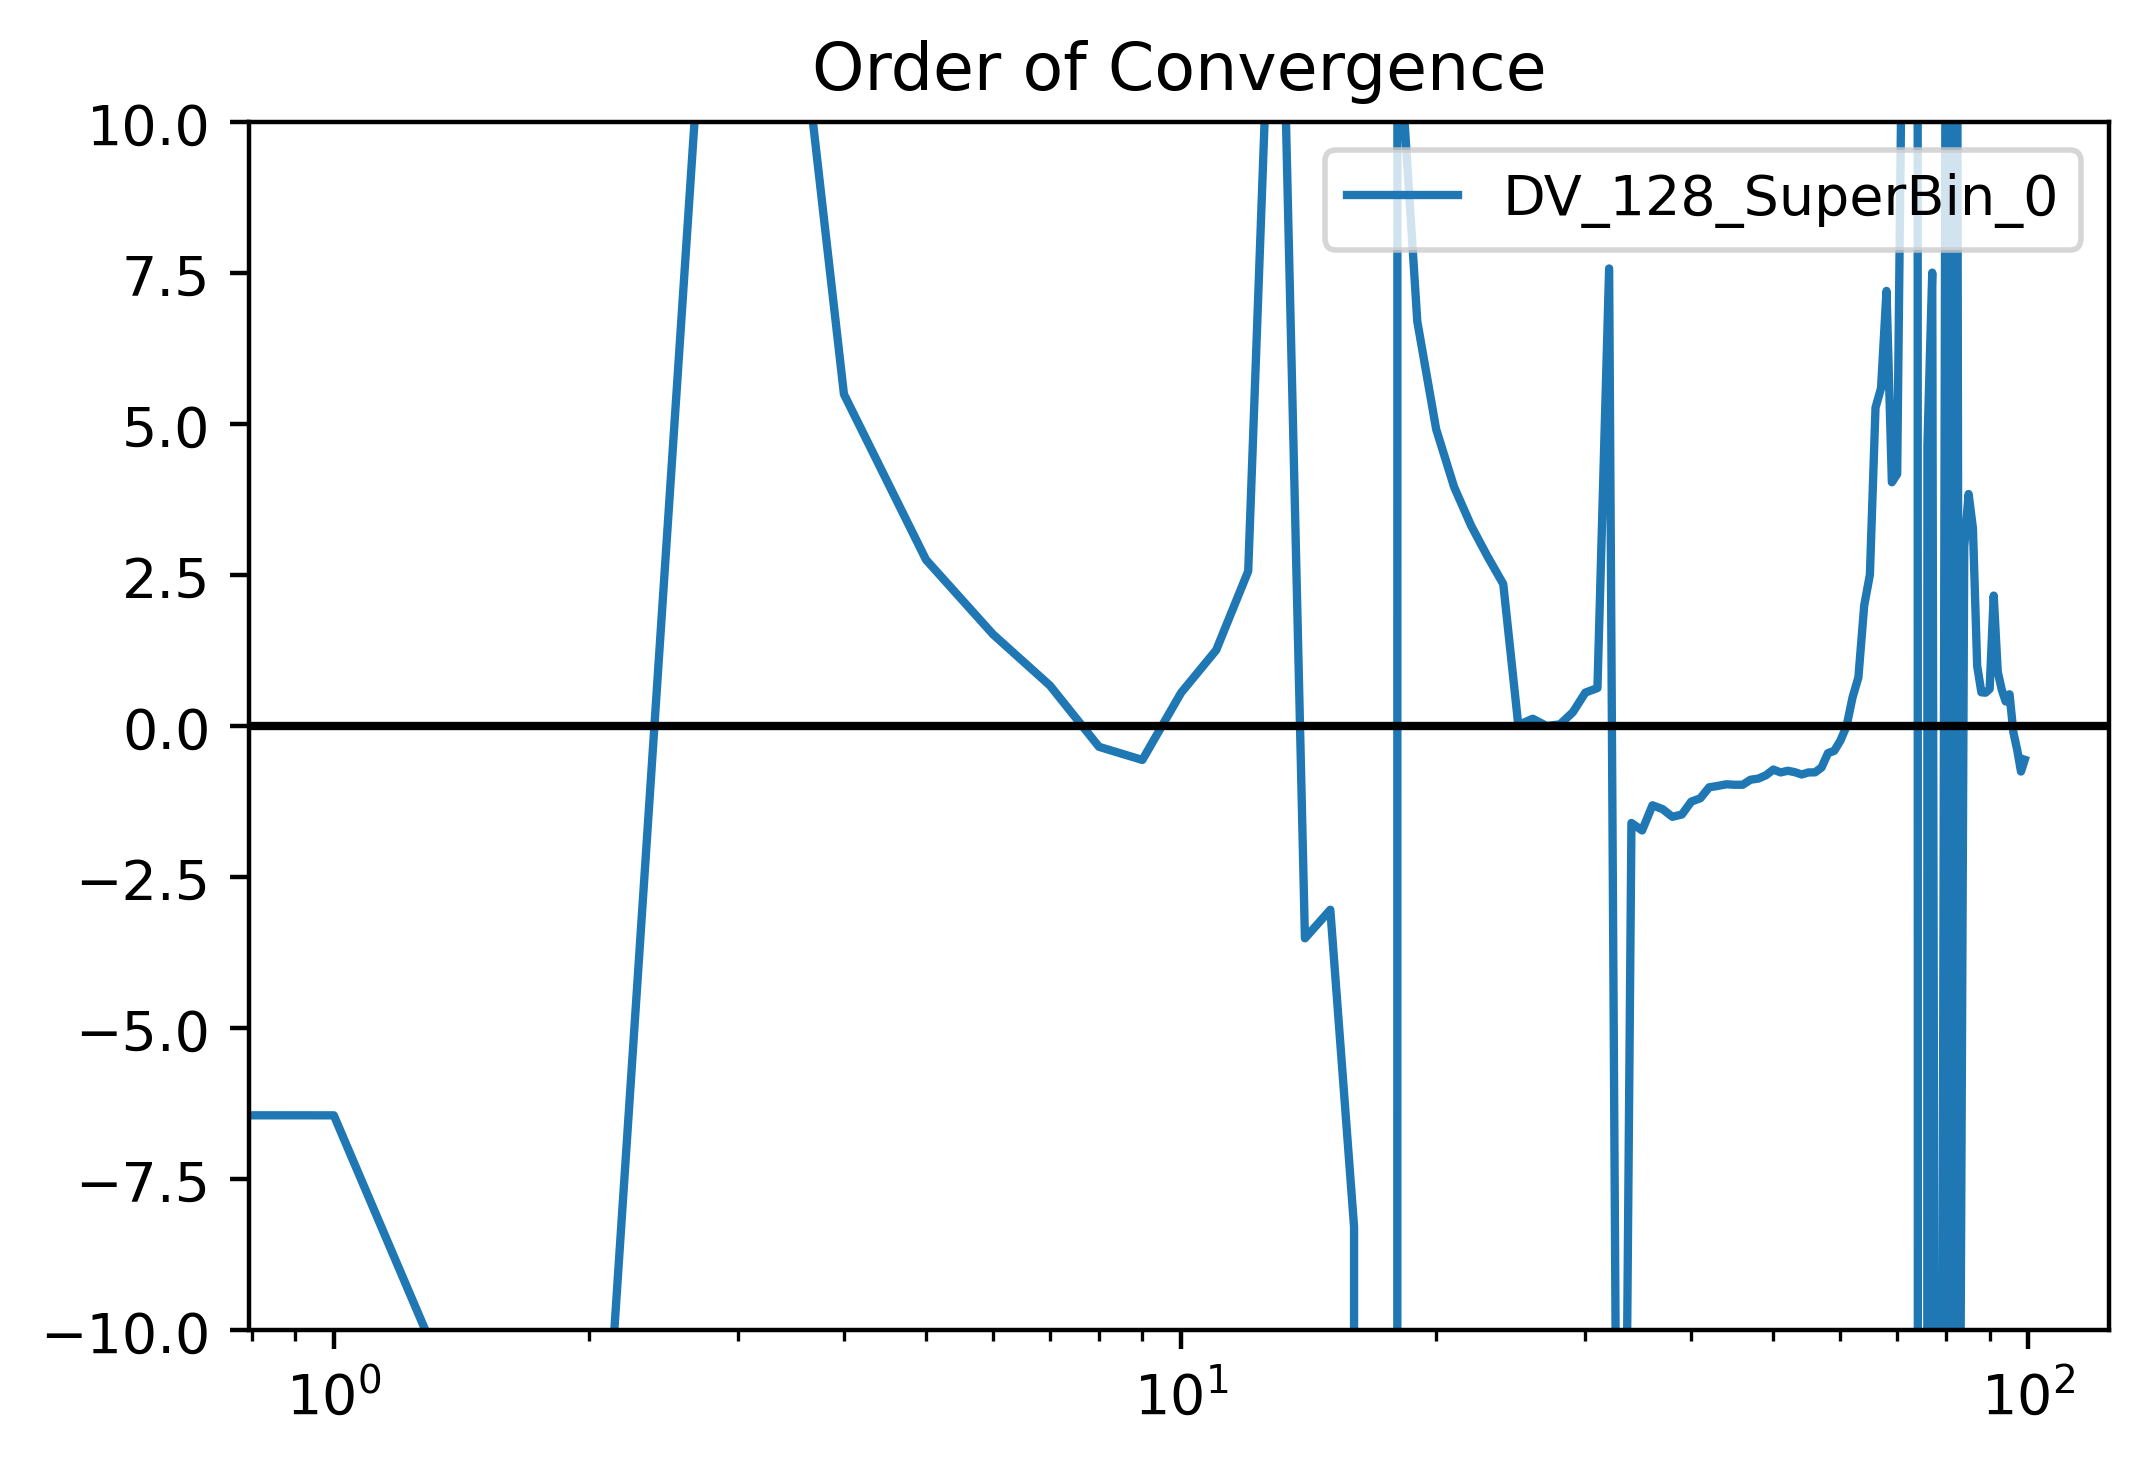

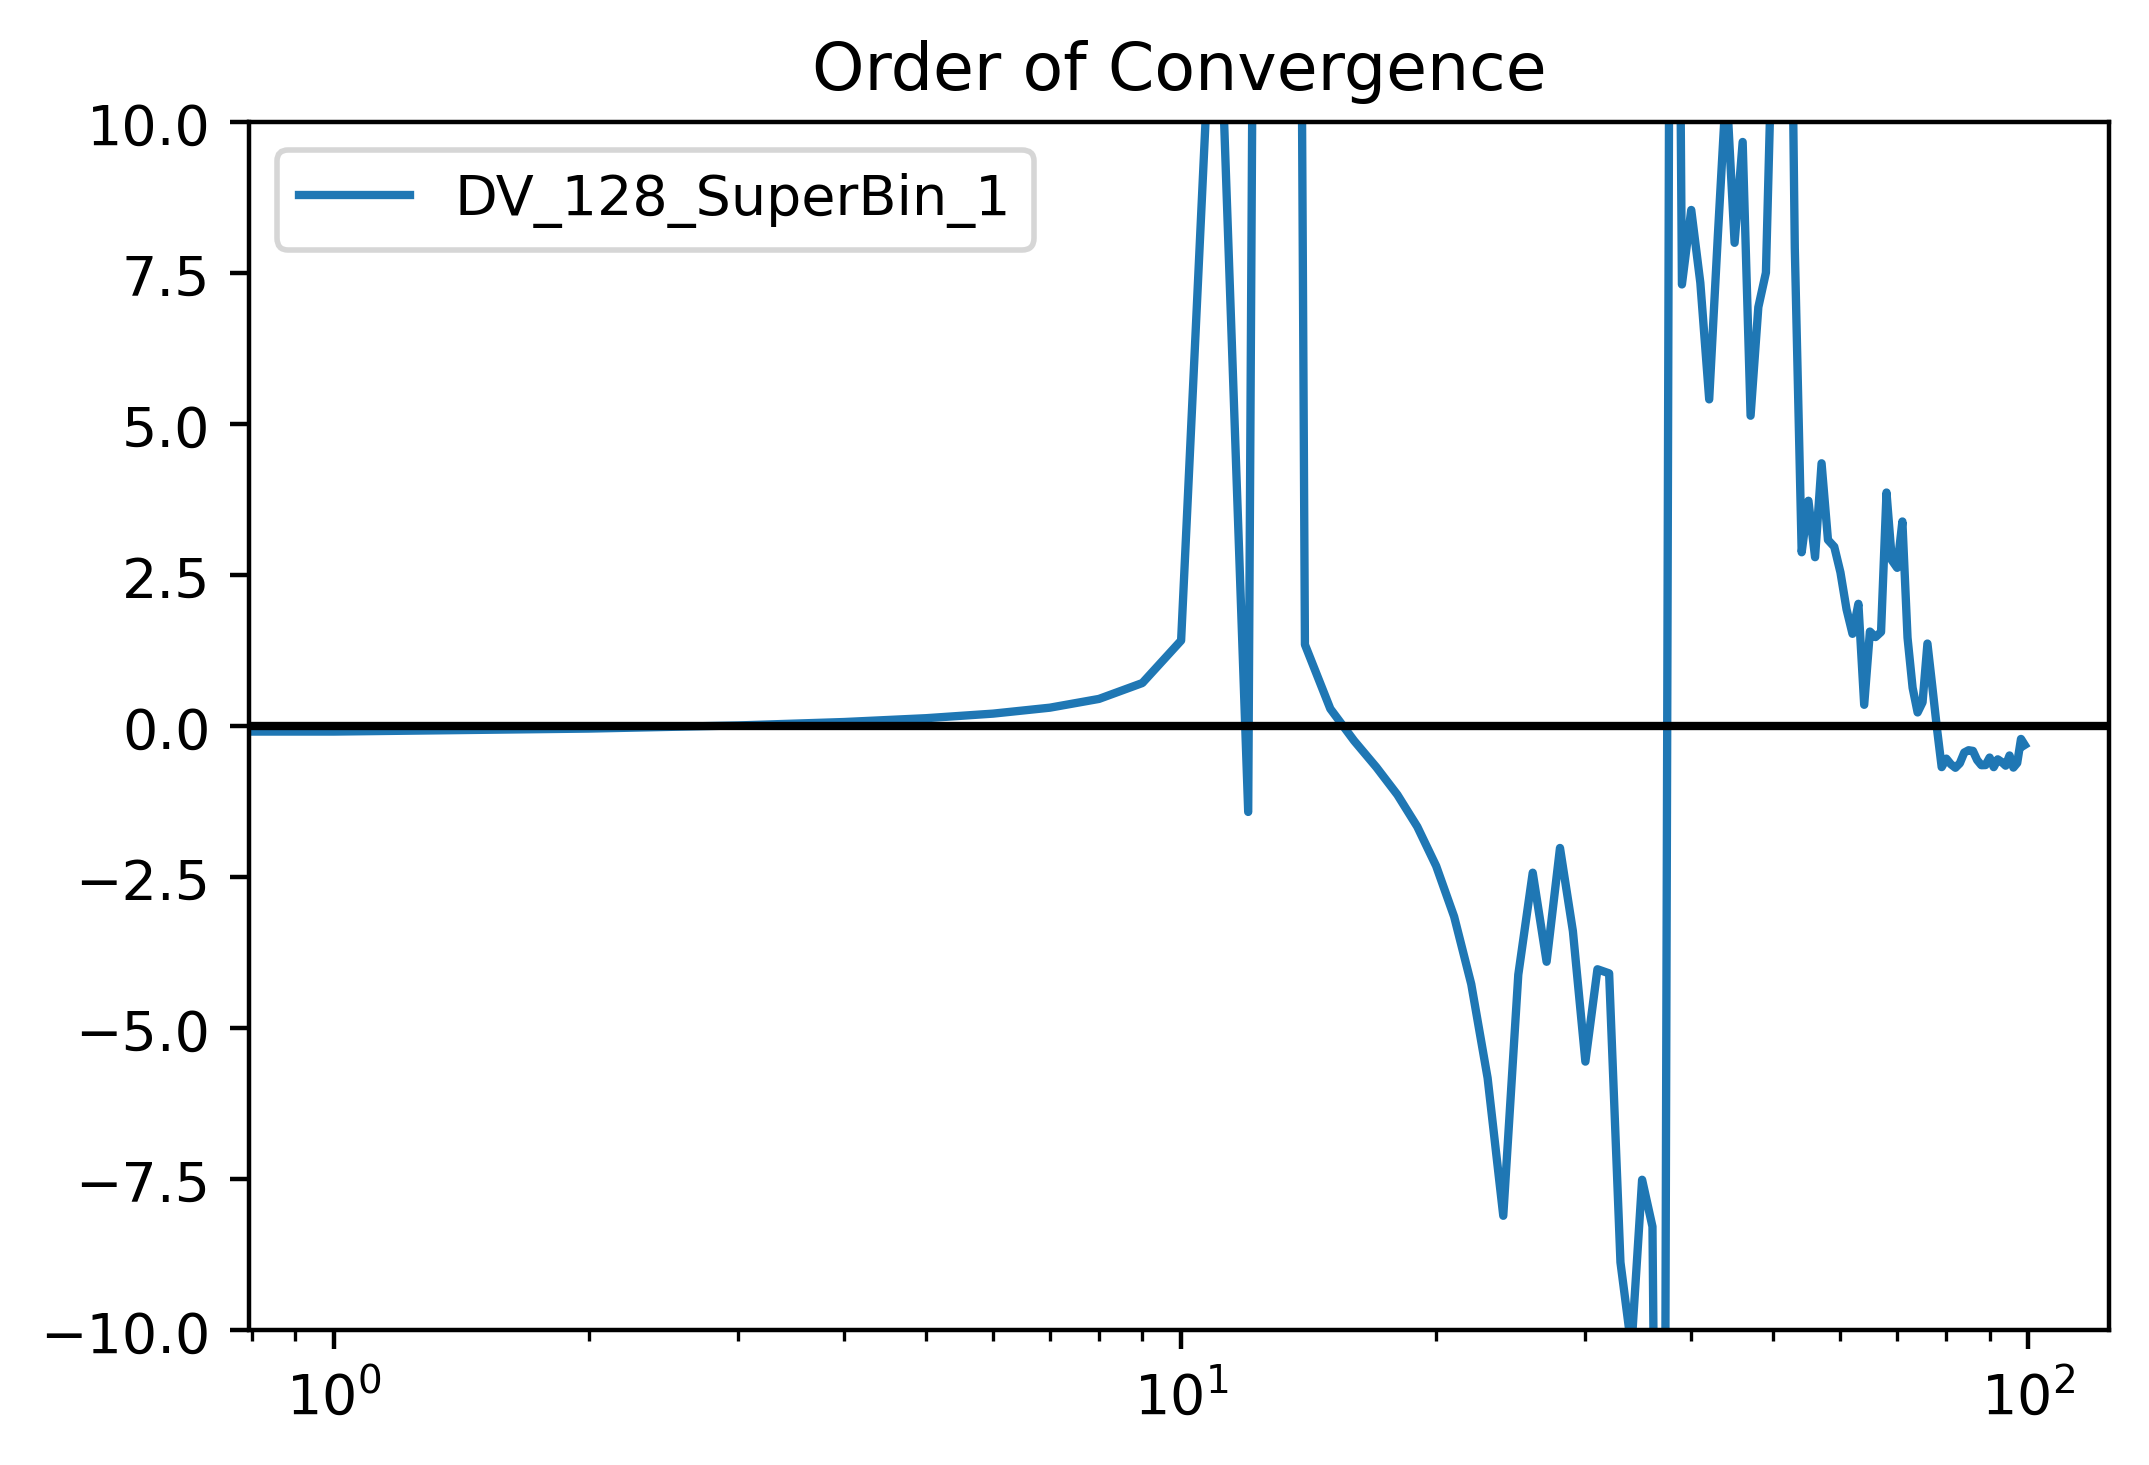

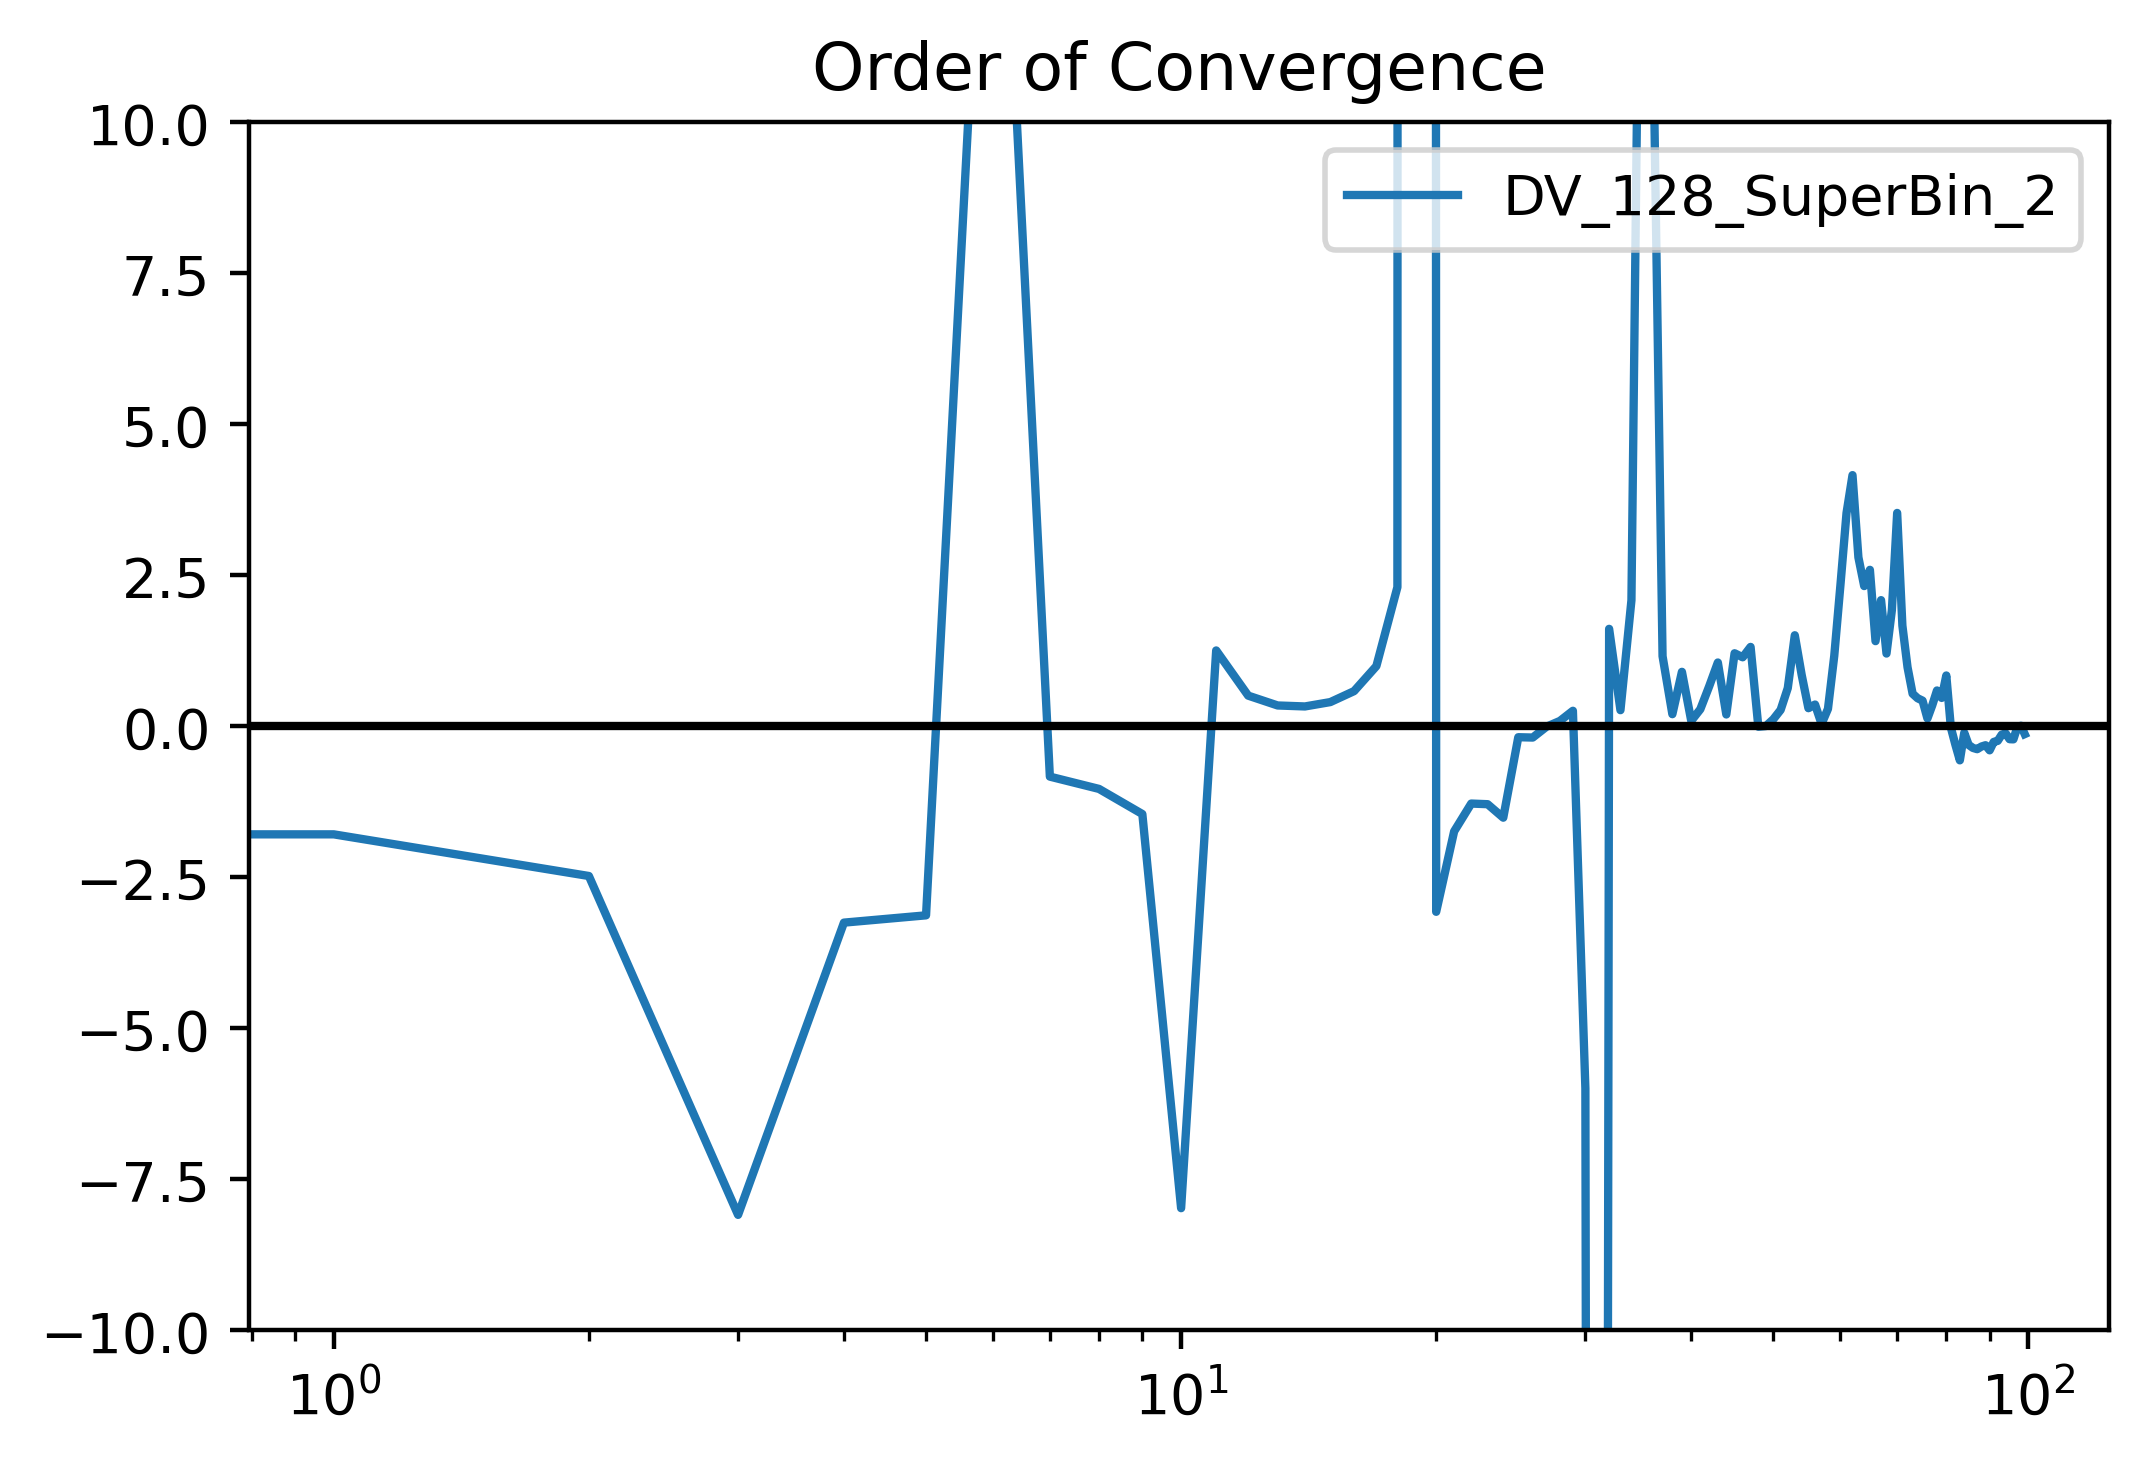

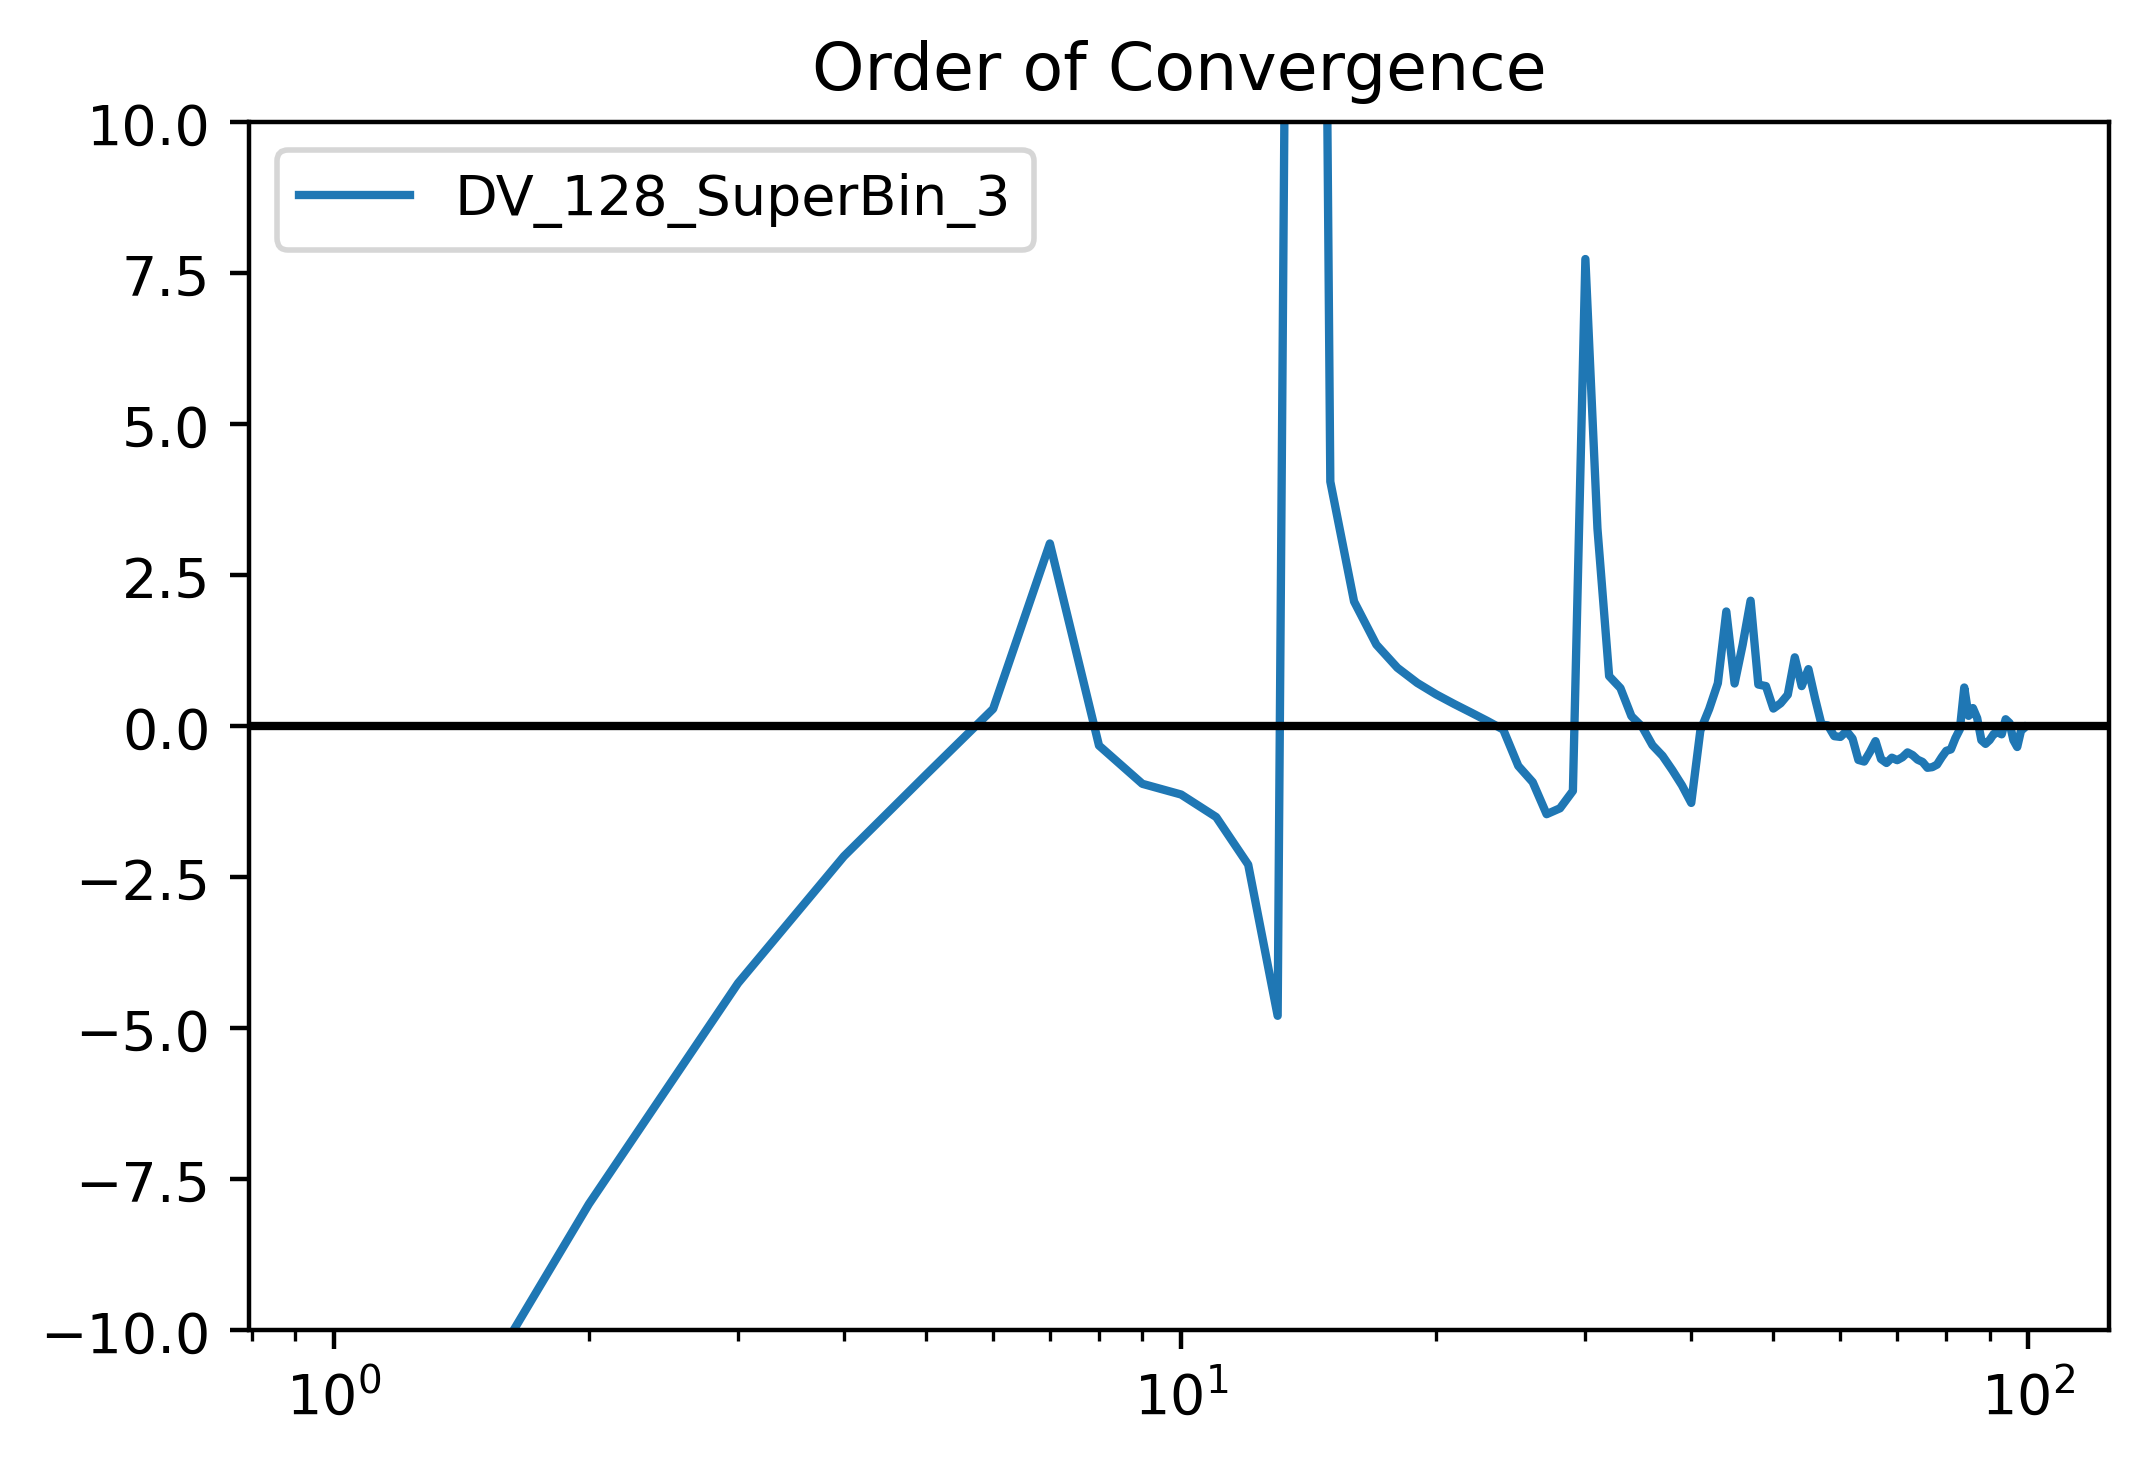

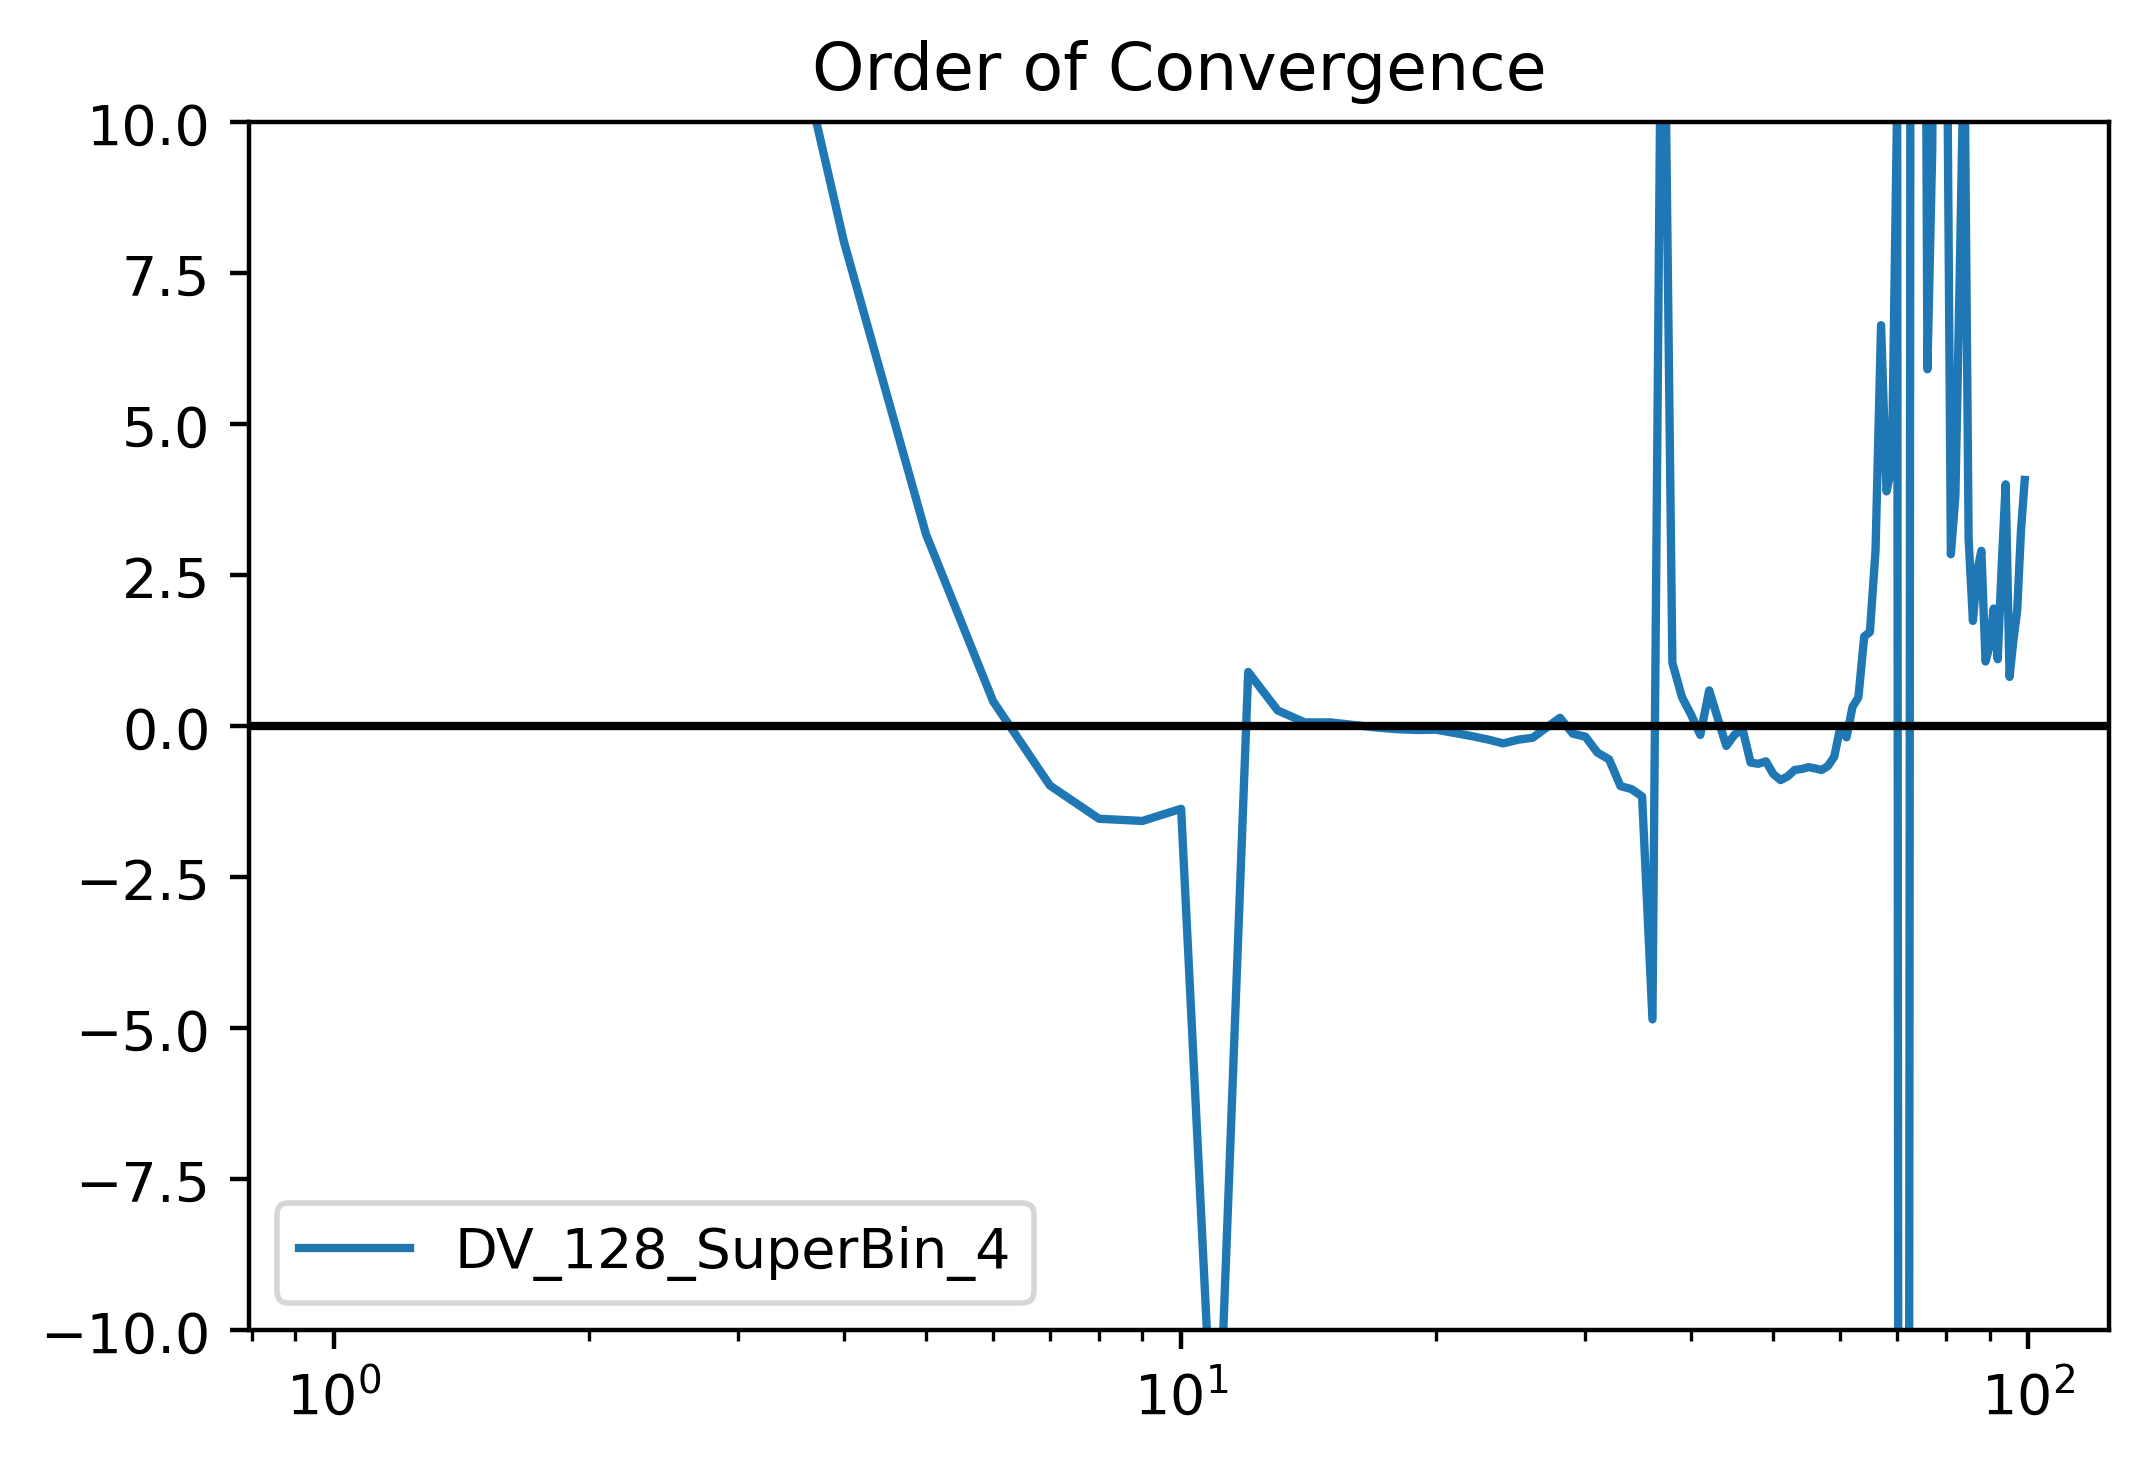

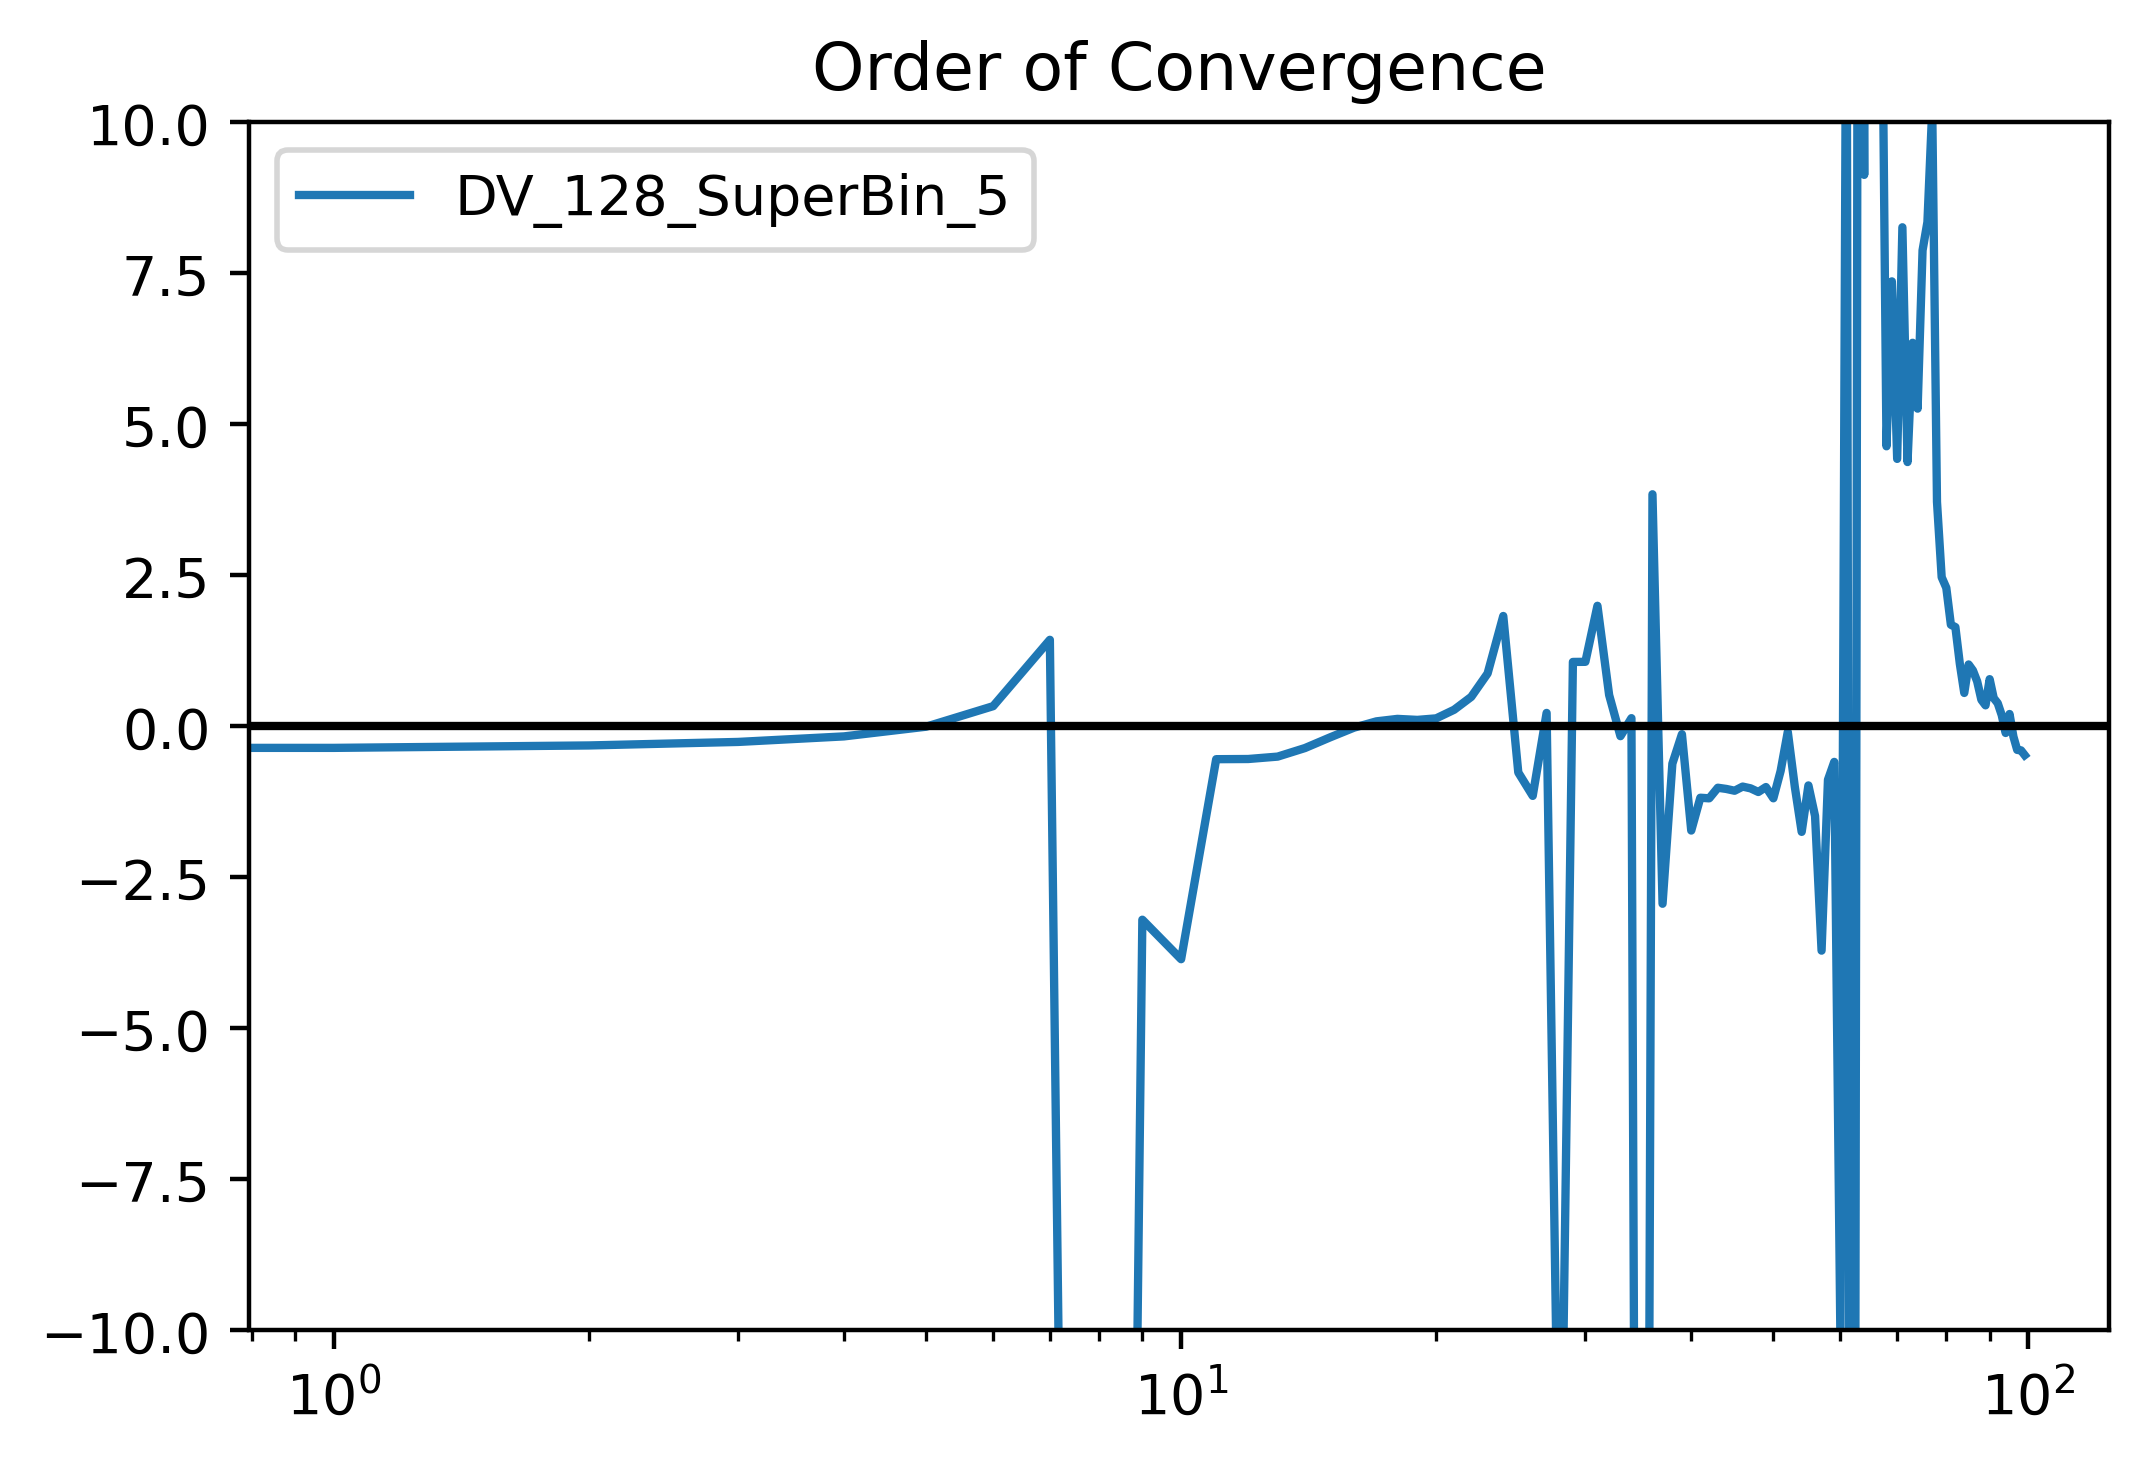

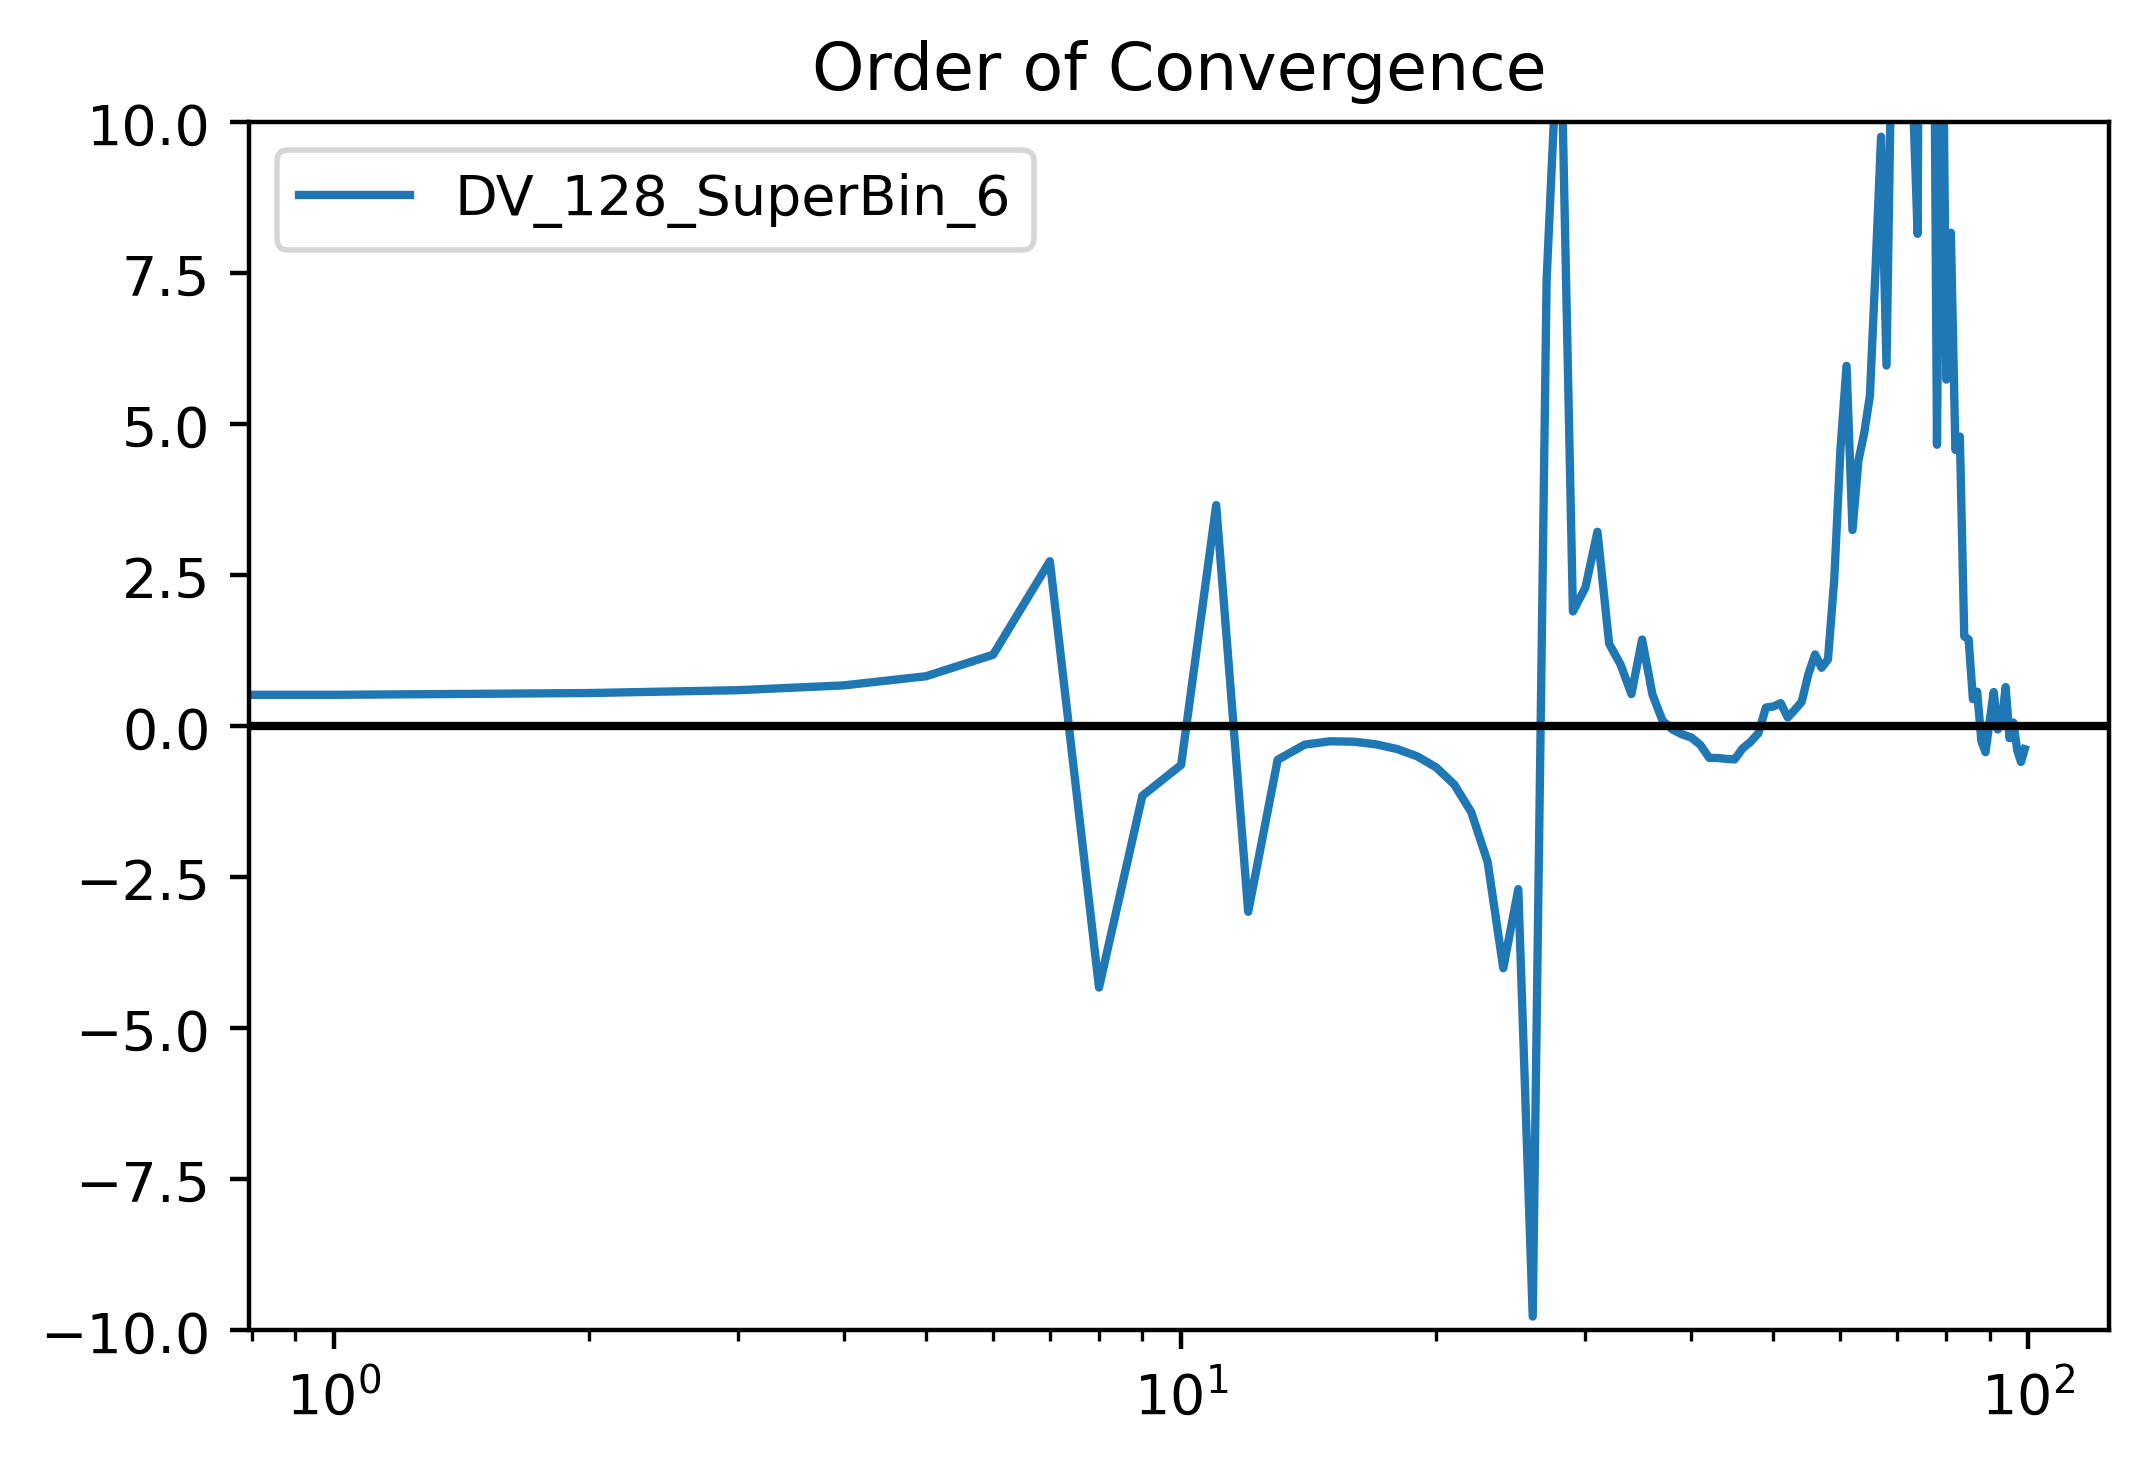

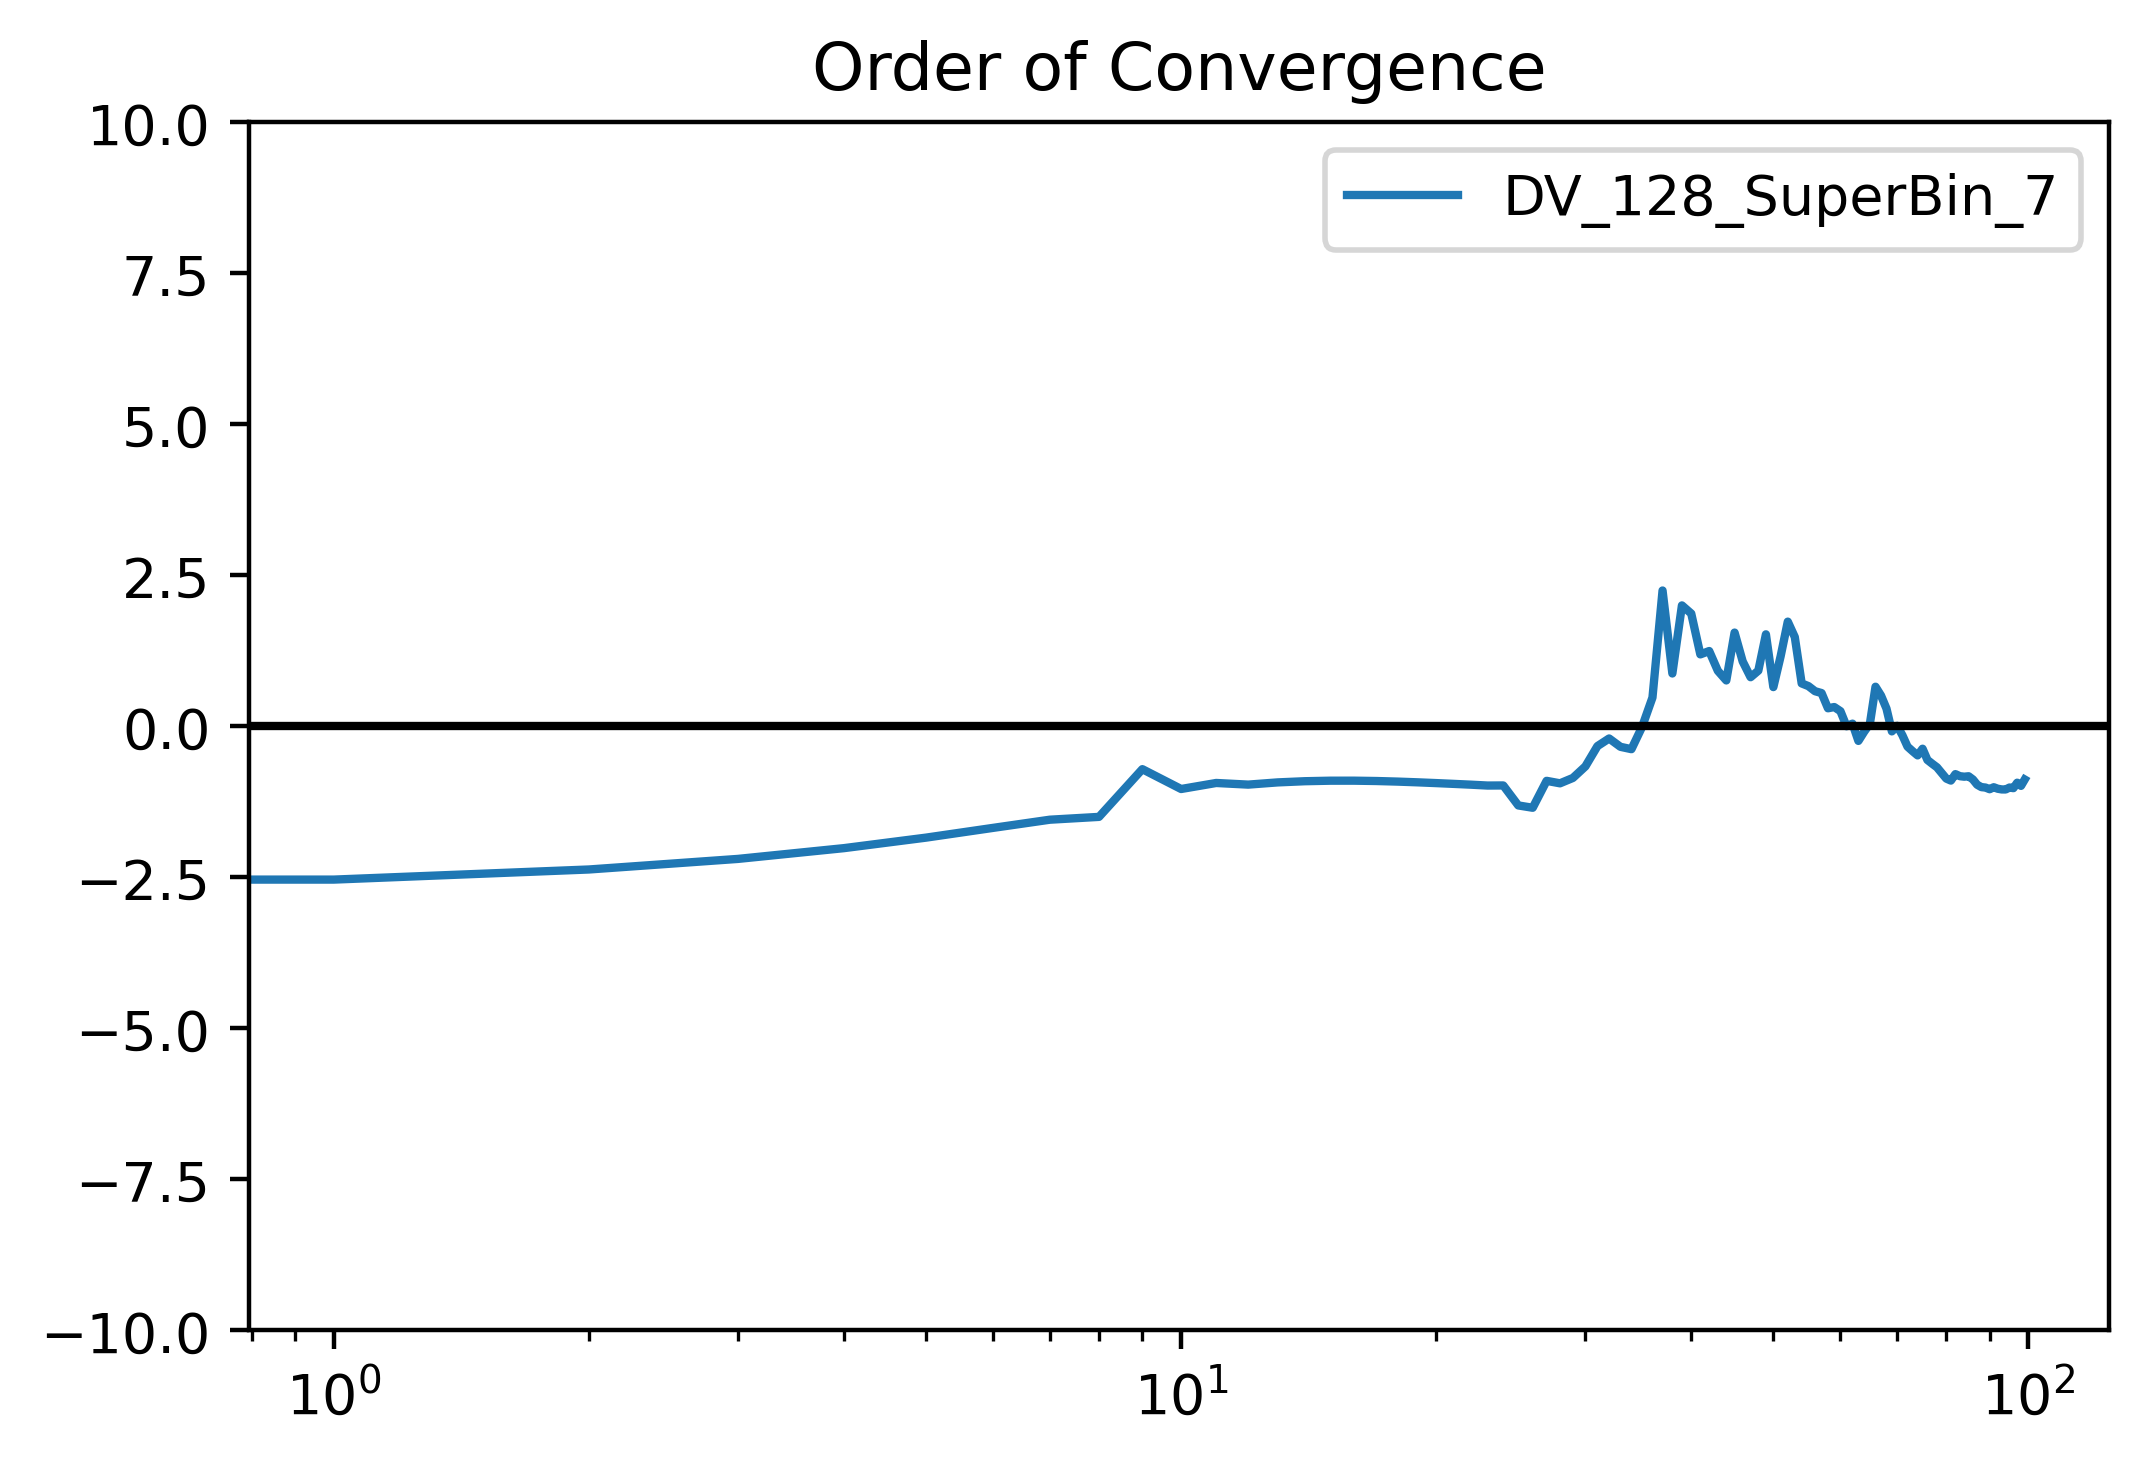

In [52]:
for i in range(9):
    XkMinus2 = smoothRatio[i:36:9,:100][3]
    XkMinus1 = smoothRatio[i:36:9,:100][0]
    Xk = smoothRatio[i:36:9,:100][1]
    XkPlus1 = smoothRatio[i:36:9,:100][2]

    q = np.log(np.abs((XkPlus1-Xk)/(Xk-XkMinus1)))/np.log(np.abs((Xk-XkMinus1)/(XkMinus1-XkMinus2)))
    
    print(np.mean(q))
    
    plt.figure(dpi=400)
    plt.semilogx(q);
    plt.legend(titles[i:36:9]);
    plt.ylim([-10,10])
    plt.axhline(y=0,color='k')
    plt.title('Order of Convergence')